<a href="https://colab.research.google.com/github/sanjana-mishra/crochet-companion/blob/main/YOLOv8_Crochet_Instance_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Train custom instance model training using YOLOv8



**Install the required libraries:**

In [1]:
# Install the ultralytics package using pip
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 11.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-man

In [2]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
from PIL import Image

**Import a model and populate it with pre-trained weights.**


In [3]:
#Instance
model = YOLO('yolov8n-seg.yaml')  # build a new model from YAML
model = YOLO('yolov8n-seg.pt')  # Transfer the weights from a pretrained model

100%|██████████| 6.73M/6.73M [00:00<00:00, 255MB/s]


Loading the YAML file that contains the names of our classes, number of classes and the directories for train, valid, and test datasets, respectively.

In [4]:

%cat /content/data_yolo/data.yaml

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 4
names: ['dc', 'sc', 'slst', 'tr']

roboflow:
  workspace: personal-rmn1f
  project: convert_to_yolo
  version: 2
  license: CC BY 4.0
  url: https://universe.roboflow.com/personal-rmn1f/convert_to_yolo/dataset/2

In [5]:
# define number of classes based on YAML
import yaml
with open("/content/data_yolo/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

**Train the model**

In [6]:
#destination directory for all results
project = "/content/data_yolo/results"
#subdirectory for this specific training
name = "2000_epochs-"

In [7]:
# Train the model
results = model.train(data='/content/data_yolo/data.yaml',
                      project=project,
                      name=name,
                      epochs=2000,
                      patience=0,
                      batch=2,
                      imgsz=512)

Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/data_yolo/data.yaml, epochs=2000, time=None, patience=0, batch=2, imgsz=512, save=True, save_period=-1, cache=False, device=None, workers=8, project=/content/data_yolo/results, name=2000_epochs-, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show

100%|██████████| 755k/755k [00:00<00:00, 75.8MB/s]


Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 276MB/s]


AMP: checks passed ✅


train: Scanning /content/data_yolo/train/labels... 23 images, 0 backgrounds, 0 corrupt: 100%|██████████| 23/23 [00:00<00:00, 310.99it/s]

train: New cache created: /content/data_yolo/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/data_yolo/valid/labels... 5 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5/5 [00:00<00:00, 430.17it/s]

val: New cache created: /content/data_yolo/valid/labels.cache


Plotting labels to /content/data_yolo/results/2000_epochs-/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 512 train, 512 val
Using 2 dataloader workers
Logging results to /content/data_yolo/results/2000_epochs-
Starting training for 2000 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     1/2000     0.736G      3.703      5.183      4.569      1.978        144        512: 100%|██████████| 12/12 [00:07<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  3.80it/s]

                   all          5         63          0          0          0          0          0          0          0          0

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size



     2/2000     0.837G      3.622      5.195      4.516      2.091         62        512: 100%|██████████| 12/12 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.22it/s]


                   all          5         63          0          0          0          0          0          0          0          0

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     3/2000     0.948G      3.264      4.755      4.343      1.591         45        512: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.43it/s]

                   all          5         63          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     4/2000     0.864G      3.106      4.671      4.142       1.55         43        512: 100%|██████████| 12/12 [00:02<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.57it/s]

                   all          5         63          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     5/2000     0.879G      3.213      4.961      4.005      1.519         25        512: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.37it/s]

                   all          5         63          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     6/2000     0.912G      3.002       4.64      3.578      1.419         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.94it/s]

                   all          5         63          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     7/2000      1.01G      2.713      4.667      3.774      1.281          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all          5         63   0.000562     0.0227     0.0012    0.00012          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     8/2000     0.826G      2.956       5.42      3.254      1.333         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.08it/s]

                   all          5         63   0.000562     0.0227     0.0012    0.00012          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     9/2000     0.843G      3.181      5.594      3.512      1.419         17        512: 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]

                   all          5         63   0.000562     0.0227     0.0012    0.00012          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    10/2000     0.776G      3.114      5.788      3.331      1.536         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.47it/s]

                   all          5         63    0.00179     0.0682    0.00548    0.00067          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    11/2000     0.688G      3.045      5.475      3.393      1.399         39        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.83it/s]

                   all          5         63    0.00179     0.0682    0.00548    0.00067          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    12/2000         1G      3.099      5.479      3.432      1.465         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.08it/s]

                   all          5         63      0.581      0.136      0.152      0.054      0.676      0.114      0.146     0.0427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    13/2000     0.998G       3.28      5.235       3.36      1.557        102        512: 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]

                   all          5         63      0.581      0.136      0.152      0.054      0.676      0.114      0.146     0.0427



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    14/2000      0.86G      3.162      4.598      4.217      1.548         19        512: 100%|██████████| 12/12 [00:02<00:00,  5.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.56it/s]


                   all          5         63      0.581      0.136      0.152      0.054      0.676      0.114      0.146     0.0427

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    15/2000     0.828G      3.136       4.71      3.216      1.481         79        512: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.44it/s]

                   all          5         63      0.299      0.298     0.0484     0.0101      0.261      0.123    0.00803    0.00169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    16/2000     0.826G      3.134      4.668      3.103      1.363         74        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all          5         63      0.299      0.298     0.0484     0.0101      0.261      0.123    0.00803    0.00169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    17/2000      1.09G      3.231      4.781      2.984      1.391         27        512: 100%|██████████| 12/12 [00:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all          5         63      0.299      0.298     0.0484     0.0101      0.261      0.123    0.00803    0.00169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    18/2000      0.91G      3.287      4.596      2.978      1.415         31        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]

                   all          5         63      0.276     0.0333     0.0165    0.00282      0.259      0.123    0.00848    0.00156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    19/2000     0.986G      3.279      4.535       2.93      1.513         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all          5         63      0.276     0.0333     0.0165    0.00282      0.259      0.123    0.00848    0.00156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    20/2000     0.721G       3.07      4.495      2.727      1.324         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.27it/s]


                   all          5         63       0.35      0.224      0.087     0.0236       0.36      0.162     0.0717     0.0143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    21/2000     0.919G      2.882       4.51      2.796      1.338         79        512: 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.28it/s]


                   all          5         63       0.35      0.224      0.087     0.0236       0.36      0.162     0.0717     0.0143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    22/2000     0.914G        2.8      4.259      2.719      1.367          6        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]


                   all          5         63       0.35      0.224      0.087     0.0236       0.36      0.162     0.0717     0.0143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    23/2000       0.7G       3.17      4.459       2.77      1.564         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all          5         63      0.209      0.118      0.148       0.06     0.0664     0.0909      0.053    0.00955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    24/2000     0.967G      3.038      4.297      2.606       1.49         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.54it/s]


                   all          5         63      0.209      0.118      0.148       0.06     0.0664     0.0909      0.053    0.00955

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    25/2000     0.933G       3.07      4.428       2.75      1.644         23        512: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.59it/s]

                   all          5         63      0.209      0.118      0.148       0.06     0.0664     0.0909      0.053    0.00955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    26/2000      0.81G      3.317      4.556      2.624      1.555         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.23it/s]

                   all          5         63      0.158      0.516      0.141     0.0413      0.297      0.179     0.0399    0.00995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    27/2000      1.08G      3.094      4.444      2.733      1.576         29        512: 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.06it/s]


                   all          5         63      0.158      0.516      0.141     0.0413      0.297      0.179     0.0399    0.00995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    28/2000     0.862G      2.971      4.378      2.376      1.385         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.86it/s]

                   all          5         63      0.137      0.509      0.155     0.0473      0.306      0.162      0.096     0.0184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    29/2000      1.25G      2.778      4.165      2.347      1.303         77        512: 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]


                   all          5         63      0.137      0.509      0.155     0.0473      0.306      0.162      0.096     0.0184

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    30/2000     0.858G      3.022      4.365      2.424      1.347        118        512: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all          5         63      0.137      0.509      0.155     0.0473      0.306      0.162      0.096     0.0184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    31/2000     0.755G       2.55      4.023      2.363      1.304         31        512: 100%|██████████| 12/12 [00:02<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]


                   all          5         63      0.344      0.191      0.199     0.0716      0.349      0.174      0.135     0.0287

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    32/2000     0.761G      2.882      4.343      2.421      1.391          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all          5         63      0.344      0.191      0.199     0.0716      0.349      0.174      0.135     0.0287



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    33/2000     0.789G      2.743      4.194        2.3      1.256         55        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.86it/s]


                   all          5         63      0.344      0.191      0.199     0.0716      0.349      0.174      0.135     0.0287

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    34/2000     0.914G       2.68      4.133      2.321      1.344         81        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.89it/s]


                   all          5         63      0.619      0.232      0.177     0.0759       0.63      0.236       0.18     0.0431

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    35/2000     0.875G      2.796      4.204      2.528      1.394         49        512: 100%|██████████| 12/12 [00:02<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all          5         63      0.619      0.232      0.177     0.0759       0.63      0.236       0.18     0.0431



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    36/2000      1.12G       2.88      4.385      2.459      1.422          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.19it/s]


                   all          5         63      0.191      0.378      0.219     0.0854      0.181      0.372      0.206     0.0581

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    37/2000     0.841G      2.793      4.082      2.404      1.372         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all          5         63      0.191      0.378      0.219     0.0854      0.181      0.372      0.206     0.0581



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    38/2000     0.803G      2.815      4.258       2.46      1.414         13        512: 100%|██████████| 12/12 [00:02<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.51it/s]


                   all          5         63      0.191      0.378      0.219     0.0854      0.181      0.372      0.206     0.0581

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    39/2000     0.963G      2.306      3.795      2.131       1.23         87        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.53it/s]

                   all          5         63      0.286      0.415      0.243     0.0878      0.281      0.348      0.209     0.0528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    40/2000     0.686G      2.713      4.108      2.509      1.278         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.67it/s]


                   all          5         63      0.286      0.415      0.243     0.0878      0.281      0.348      0.209     0.0528

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    41/2000      0.78G      2.792      4.139      2.239      1.296         75        512: 100%|██████████| 12/12 [00:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.42it/s]

                   all          5         63      0.286      0.415      0.243     0.0878      0.281      0.348      0.209     0.0528



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    42/2000      0.96G      2.315      3.674      2.049      1.196         21        512: 100%|██████████| 12/12 [00:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.59it/s]

                   all          5         63      0.284      0.445       0.28     0.0967      0.238      0.366      0.241     0.0571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    43/2000     0.868G      2.644      3.965       2.28       1.26         99        512: 100%|██████████| 12/12 [00:02<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.23it/s]

                   all          5         63      0.284      0.445       0.28     0.0967      0.238      0.366      0.241     0.0571



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    44/2000     0.875G      2.332      3.521      3.544      1.175          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all          5         63      0.323       0.41      0.301      0.113      0.272      0.352      0.258     0.0799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    45/2000     0.902G      2.472      4.011      2.113      1.221         91        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]

                   all          5         63      0.323       0.41      0.301      0.113      0.272      0.352      0.258     0.0799



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    46/2000     0.875G      2.449      4.145      2.232      1.294         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.98it/s]


                   all          5         63      0.323       0.41      0.301      0.113      0.272      0.352      0.258     0.0799

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    47/2000     0.851G      2.567      4.114      2.069      1.326         13        512: 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.47it/s]


                   all          5         63       0.31      0.317       0.25     0.0926      0.306      0.269      0.227      0.067

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    48/2000     0.818G      2.679      3.992       2.03      1.207        153        512: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all          5         63       0.31      0.317       0.25     0.0926      0.306      0.269      0.227      0.067



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    49/2000     0.761G      2.731      4.212      2.277       1.24        130        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.65it/s]


                   all          5         63       0.31      0.317       0.25     0.0926      0.306      0.269      0.227      0.067

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    50/2000     0.782G      2.486       3.84      2.059      1.206         63        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.78it/s]


                   all          5         63      0.279      0.366      0.249     0.0949      0.265      0.364      0.217     0.0652

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    51/2000     0.908G      2.583      3.971      2.218      1.182         27        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.79it/s]


                   all          5         63      0.279      0.366      0.249     0.0949      0.265      0.364      0.217     0.0652

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    52/2000     0.925G      2.708      4.026       2.08      1.251         59        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all          5         63      0.243      0.386      0.242       0.09      0.234      0.302      0.203     0.0702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    53/2000      1.01G      2.585      3.769      2.233      1.236         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.57it/s]


                   all          5         63      0.243      0.386      0.242       0.09      0.234      0.302      0.203     0.0702

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    54/2000     0.738G      2.572        3.8      3.079      1.346         12        512: 100%|██████████| 12/12 [00:02<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.80it/s]

                   all          5         63      0.243      0.386      0.242       0.09      0.234      0.302      0.203     0.0702



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    55/2000     0.946G      2.464      3.719      2.002      1.146         21        512: 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.80it/s]

                   all          5         63      0.279       0.43        0.3     0.0924       0.24      0.364      0.209     0.0705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    56/2000      1.06G      2.396      3.822      2.423      1.191         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]

                   all          5         63      0.279       0.43        0.3     0.0924       0.24      0.364      0.209     0.0705



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    57/2000      1.09G      2.405      3.805      2.045      1.167         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.59it/s]


                   all          5         63      0.279       0.43        0.3     0.0924       0.24      0.364      0.209     0.0705

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    58/2000     0.919G      2.616      3.752      3.347      1.502          3        512: 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.77it/s]

                   all          5         63      0.356      0.377      0.318      0.115      0.298      0.377      0.283     0.0995



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    59/2000     0.814G      2.785      4.121      3.058      1.547         29        512: 100%|██████████| 12/12 [00:02<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.63it/s]


                   all          5         63      0.356      0.377      0.318      0.115      0.298      0.377      0.283     0.0995

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    60/2000     0.875G      2.544      3.943      2.101      1.267         84        512: 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all          5         63        0.4      0.407      0.312      0.119      0.395      0.389      0.275     0.0949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    61/2000       0.9G       2.61      4.007      2.175      1.341          9        512: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.17it/s]

                   all          5         63        0.4      0.407      0.312      0.119      0.395      0.389      0.275     0.0949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    62/2000      0.73G      2.392      3.699      2.017      1.218         73        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]


                   all          5         63        0.4      0.407      0.312      0.119      0.395      0.389      0.275     0.0949

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    63/2000     0.898G      2.559      3.851      2.022      1.185         42        512: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]

                   all          5         63      0.438      0.321      0.295      0.117      0.416      0.292      0.241     0.0709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    64/2000     0.793G      2.695      3.927      2.172      1.359        101        512: 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.54it/s]


                   all          5         63      0.438      0.321      0.295      0.117      0.416      0.292      0.241     0.0709

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    65/2000     0.833G      2.534      3.866      2.092      1.243         45        512: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.20it/s]


                   all          5         63      0.438      0.321      0.295      0.117      0.416      0.292      0.241     0.0709

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    66/2000      1.01G      2.403      3.753      1.982      1.226         68        512: 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all          5         63      0.299      0.285      0.305      0.114      0.344      0.236      0.217      0.067



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    67/2000     0.879G      2.452      3.742      1.844      1.214         25        512: 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.68it/s]


                   all          5         63      0.299      0.285      0.305      0.114      0.344      0.236      0.217      0.067

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    68/2000     0.715G      2.644       4.08      2.233      1.305         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.31it/s]

                   all          5         63      0.323      0.285      0.259     0.0855      0.274      0.218      0.192     0.0541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    69/2000     0.805G      2.412      3.661       2.09      1.236         58        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.75it/s]

                   all          5         63      0.323      0.285      0.259     0.0855      0.274      0.218      0.192     0.0541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    70/2000      1.21G      2.842       4.11      2.251      1.311         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.36it/s]

                   all          5         63      0.323      0.285      0.259     0.0855      0.274      0.218      0.192     0.0541



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    71/2000     0.877G      2.533      3.715      6.419      1.178          3        512: 100%|██████████| 12/12 [00:02<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.30it/s]


                   all          5         63      0.296      0.101      0.147     0.0364      0.278     0.0667        0.1     0.0242

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    72/2000     0.799G       2.53      3.676      2.193      1.262         30        512: 100%|██████████| 12/12 [00:02<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.90it/s]

                   all          5         63      0.296      0.101      0.147     0.0364      0.278     0.0667        0.1     0.0242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    73/2000      1.12G      2.795      3.868      2.445      1.404         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all          5         63      0.296      0.101      0.147     0.0364      0.278     0.0667        0.1     0.0242



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    74/2000      0.91G      2.624      3.773      2.375      1.359         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]


                   all          5         63      0.819     0.0833     0.0892     0.0248      0.819     0.0833     0.0712      0.018

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    75/2000     0.956G       2.84      4.039      2.694      1.397          4        512: 100%|██████████| 12/12 [00:02<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.28it/s]


                   all          5         63      0.819     0.0833     0.0892     0.0248      0.819     0.0833     0.0712      0.018

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    76/2000     0.908G      2.738      4.022      2.242      1.296         49        512: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.73it/s]


                   all          5         63       0.84     0.0833      0.177     0.0562      0.842      0.087      0.157      0.051

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    77/2000     0.889G      2.509      3.845      2.386      1.245         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all          5         63       0.84     0.0833      0.177     0.0562      0.842      0.087      0.157      0.051



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    78/2000     0.902G      2.506      3.694      2.348      1.253         23        512: 100%|██████████| 12/12 [00:02<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all          5         63       0.84     0.0833      0.177     0.0562      0.842      0.087      0.157      0.051



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    79/2000      1.19G      2.437      3.671      2.104      1.176         45        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.05it/s]


                   all          5         63      0.352      0.241      0.156     0.0632      0.397      0.215      0.226       0.07

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    80/2000     0.942G      2.333      3.872      4.448      1.114         60        512: 100%|██████████| 12/12 [00:02<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all          5         63      0.352      0.241      0.156     0.0632      0.397      0.215      0.226       0.07



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    81/2000     0.849G      2.761      3.905      2.133      1.214         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all          5         63      0.352      0.241      0.156     0.0632      0.397      0.215      0.226       0.07



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    82/2000     0.742G      2.365      3.802      1.916      1.185        142        512: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]

                   all          5         63       0.41      0.259      0.272       0.11      0.687       0.23      0.292      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    83/2000     0.814G      2.416      3.798      2.152      1.217         32        512: 100%|██████████| 12/12 [00:02<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.57it/s]

                   all          5         63       0.41      0.259      0.272       0.11      0.687       0.23      0.292      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    84/2000     0.742G      2.309      3.646      2.013      1.261         88        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]

                   all          5         63      0.466      0.328      0.324      0.135      0.489      0.364      0.327      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    85/2000      1.03G      2.586      3.971      2.168      1.335         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all          5         63      0.466      0.328      0.324      0.135      0.489      0.364      0.327      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    86/2000     0.906G      2.427      3.735      1.998      1.314         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.64it/s]

                   all          5         63      0.466      0.328      0.324      0.135      0.489      0.364      0.327      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    87/2000     0.883G      2.752      4.224      2.286      1.365         41        512: 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.36it/s]

                   all          5         63      0.428      0.344      0.334      0.146      0.468      0.405      0.374      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    88/2000      0.81G       2.81      3.989       2.01      1.394         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.31it/s]

                   all          5         63      0.428      0.344      0.334      0.146      0.468      0.405      0.374      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    89/2000     0.916G       2.26      3.713      1.815      1.231         53        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]

                   all          5         63      0.428      0.344      0.334      0.146      0.468      0.405      0.374      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    90/2000      0.81G      2.433      3.849      2.351      1.333        121        512: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.69it/s]


                   all          5         63      0.302      0.389      0.352      0.139       0.31      0.397      0.363      0.108

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    91/2000     0.931G      2.754       3.89      2.148      1.388         49        512: 100%|██████████| 12/12 [00:02<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all          5         63      0.302      0.389      0.352      0.139       0.31      0.397      0.363      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    92/2000      1.17G       2.87      4.045      2.027      1.349         57        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all          5         63      0.324      0.438      0.334      0.122      0.314      0.401      0.266     0.0776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    93/2000      0.86G      2.737      4.082      2.123      1.272         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]


                   all          5         63      0.324      0.438      0.334      0.122      0.314      0.401      0.266     0.0776

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    94/2000      0.82G      2.531       3.92      2.037      1.364         27        512: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all          5         63      0.324      0.438      0.334      0.122      0.314      0.401      0.266     0.0776



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    95/2000      1.14G      2.412      3.669       2.12      1.203         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.90it/s]


                   all          5         63      0.179      0.411      0.245     0.0821      0.142      0.277      0.196     0.0611

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    96/2000     0.816G      2.206      3.476      2.055      1.209         10        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.44it/s]


                   all          5         63      0.179      0.411      0.245     0.0821      0.142      0.277      0.196     0.0611

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    97/2000     0.768G      2.628      3.706      2.305      1.373         58        512: 100%|██████████| 12/12 [00:02<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.43it/s]


                   all          5         63      0.179      0.411      0.245     0.0821      0.142      0.277      0.196     0.0611

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    98/2000     0.904G      2.724      3.853      2.506      1.278         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.85it/s]

                   all          5         63      0.404      0.268      0.216     0.0606      0.402      0.189      0.174     0.0499



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


    99/2000     0.854G      2.606      3.813      2.029      1.222         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.80it/s]


                   all          5         63      0.404      0.268      0.216     0.0606      0.402      0.189      0.174     0.0499

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   100/2000     0.895G      2.342      3.654      2.023      1.209        130        512: 100%|██████████| 12/12 [00:02<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.46it/s]


                   all          5         63      0.432      0.279      0.247     0.0922      0.416      0.226      0.216     0.0641

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   101/2000     0.728G      2.413      3.701      2.108      1.257         17        512: 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.12it/s]

                   all          5         63      0.432      0.279      0.247     0.0922      0.416      0.226      0.216     0.0641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   102/2000         1G      2.602      3.793      1.997      1.275        128        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all          5         63      0.432      0.279      0.247     0.0922      0.416      0.226      0.216     0.0641



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   103/2000      1.08G      2.343      3.701      2.127      1.221          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.10it/s]

                   all          5         63       0.52      0.192      0.302      0.135      0.559      0.203      0.293      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   104/2000     0.948G      2.676       4.01      2.044      1.254         62        512: 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.63it/s]


                   all          5         63       0.52      0.192      0.302      0.135      0.559      0.203      0.293      0.102

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   105/2000      0.78G      2.179      3.444      1.945      1.095         62        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.60it/s]


                   all          5         63       0.52      0.192      0.302      0.135      0.559      0.203      0.293      0.102

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   106/2000     0.921G      2.417      3.775      2.078      1.257         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all          5         63      0.462       0.18      0.315      0.143      0.575      0.208       0.31      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   107/2000     0.789G      2.594      3.876      2.234      1.319        108        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.33it/s]


                   all          5         63      0.462       0.18      0.315      0.143      0.575      0.208       0.31      0.116

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   108/2000     0.946G       2.28      3.591       1.93      1.205         47        512: 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.51it/s]


                   all          5         63      0.302      0.394      0.332      0.155      0.445      0.367      0.347      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   109/2000     0.755G      2.317      3.564      2.029       1.16         10        512: 100%|██████████| 12/12 [00:02<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]

                   all          5         63      0.302      0.394      0.332      0.155      0.445      0.367      0.347      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   110/2000     0.765G      2.278      3.709      1.833      1.197         74        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all          5         63      0.302      0.394      0.332      0.155      0.445      0.367      0.347      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   111/2000     0.858G      2.496      3.833      1.858      1.229         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all          5         63      0.259      0.451      0.356      0.156      0.432      0.428       0.36      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   112/2000     0.799G      2.344      3.509      2.147      1.288         11        512: 100%|██████████| 12/12 [00:02<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.38it/s]


                   all          5         63      0.259      0.451      0.356      0.156      0.432      0.428       0.36      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   113/2000     0.713G      2.092      3.374      1.886      1.168         26        512: 100%|██████████| 12/12 [00:02<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all          5         63      0.259      0.451      0.356      0.156      0.432      0.428       0.36      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   114/2000     0.812G       2.23      3.558      1.762      1.118         87        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all          5         63      0.292      0.443      0.309      0.126      0.316      0.362      0.299      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   115/2000     0.965G      2.253      3.642      1.945      1.172         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all          5         63      0.292      0.443      0.309      0.126      0.316      0.362      0.299      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   116/2000     0.721G      1.994      3.281      4.338      1.042         13        512: 100%|██████████| 12/12 [00:02<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.61it/s]

                   all          5         63       0.26      0.415      0.302      0.138      0.325      0.372      0.324      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   117/2000      1.02G      2.343      3.549       1.75      1.159         68        512: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all          5         63       0.26      0.415      0.302      0.138      0.325      0.372      0.324      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   118/2000      0.95G      2.488      3.815      1.785      1.123         75        512: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all          5         63       0.26      0.415      0.302      0.138      0.325      0.372      0.324      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   119/2000     0.912G      2.437      3.765      2.241      1.232          9        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all          5         63       0.34      0.315      0.298      0.155      0.378      0.317       0.31      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   120/2000      0.81G      2.314      3.794      1.914      1.284         84        512: 100%|██████████| 12/12 [00:02<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.25it/s]


                   all          5         63       0.34      0.315      0.298      0.155      0.378      0.317       0.31      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   121/2000     0.795G      2.438      3.883      1.882      1.188         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.01it/s]


                   all          5         63       0.34      0.315      0.298      0.155      0.378      0.317       0.31      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   122/2000     0.805G       2.53      3.917      2.099      1.299         63        512: 100%|██████████| 12/12 [00:02<00:00,  5.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.79it/s]


                   all          5         63      0.327      0.326      0.312      0.149      0.316      0.321      0.311      0.122

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   123/2000      0.78G       2.04      3.296      2.777       1.15          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.06it/s]

                   all          5         63      0.327      0.326      0.312      0.149      0.316      0.321      0.311      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   124/2000     0.768G      2.236      3.612      1.954      1.246         37        512: 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.48it/s]


                   all          5         63      0.273      0.305      0.298      0.142      0.267      0.299      0.315      0.109

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   125/2000     0.765G      2.299      3.687      1.883      1.165         21        512: 100%|██████████| 12/12 [00:02<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.42it/s]

                   all          5         63      0.273      0.305      0.298      0.142      0.267      0.299      0.315      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   126/2000      1.03G      2.299      3.706      1.822      1.171        141        512: 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63      0.273      0.305      0.298      0.142      0.267      0.299      0.315      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   127/2000      1.17G      2.204      3.614      1.812      1.195         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all          5         63      0.288      0.351      0.331      0.163      0.282      0.345      0.349      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   128/2000     0.765G      2.193      3.634      1.786      1.129         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.11it/s]

                   all          5         63      0.288      0.351      0.331      0.163      0.282      0.345      0.349      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   129/2000      0.86G      2.332      3.711       1.97      1.229        123        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all          5         63      0.288      0.351      0.331      0.163      0.282      0.345      0.349      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   130/2000     0.977G      2.204      3.563       1.92      1.212          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.16it/s]

                   all          5         63      0.358      0.316      0.361      0.164      0.321      0.273      0.352      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   131/2000      1.06G        2.3      3.479      1.738      1.109         46        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all          5         63      0.358      0.316      0.361      0.164      0.321      0.273      0.352      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   132/2000     0.742G      2.381      3.618      1.775      1.186         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.82it/s]

                   all          5         63      0.297      0.427      0.344      0.144        0.3      0.443      0.355      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   133/2000     0.789G      1.992      3.337      2.481      1.127          0        512: 100%|██████████| 12/12 [00:02<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.48it/s]

                   all          5         63      0.297      0.427      0.344      0.144        0.3      0.443      0.355      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   134/2000     0.851G      2.132      3.415      1.742      1.147         29        512: 100%|██████████| 12/12 [00:02<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.77it/s]

                   all          5         63      0.297      0.427      0.344      0.144        0.3      0.443      0.355      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   135/2000      1.08G      2.215      3.543      1.787       1.15         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all          5         63      0.262       0.41      0.323      0.131      0.274      0.421      0.325      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   136/2000     0.933G      2.188      3.489      1.689      1.114         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.05it/s]


                   all          5         63      0.262       0.41      0.323      0.131      0.274      0.421      0.325      0.118

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   137/2000     0.795G      2.362      3.632      1.895      1.181         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.73it/s]


                   all          5         63      0.262       0.41      0.323      0.131      0.274      0.421      0.325      0.118

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   138/2000     0.772G      2.383      3.661      1.923      1.244         68        512: 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.55it/s]


                   all          5         63      0.281      0.342      0.311      0.129      0.298      0.359      0.317        0.1

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   139/2000     0.963G      2.112      3.345      2.656      1.129          3        512: 100%|██████████| 12/12 [00:02<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63      0.281      0.342      0.311      0.129      0.298      0.359      0.317        0.1



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   140/2000     0.998G      2.207      3.478      1.734      1.178         35        512: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.65it/s]


                   all          5         63      0.297      0.382       0.31      0.139      0.283      0.337      0.296      0.107

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   141/2000     0.914G      2.356      3.512      2.947      1.152          0        512: 100%|██████████| 12/12 [00:02<00:00,  5.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all          5         63      0.297      0.382       0.31      0.139      0.283      0.337      0.296      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   142/2000     0.944G      2.227      3.248      2.175      1.097          6        512: 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]

                   all          5         63      0.297      0.382       0.31      0.139      0.283      0.337      0.296      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   143/2000     0.858G      2.137      3.401      1.856      1.174         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all          5         63      0.292      0.356      0.312      0.146      0.299       0.36      0.274     0.0945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   144/2000     0.866G      2.544      3.691      1.896      1.299         24        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.60it/s]

                   all          5         63      0.292      0.356      0.312      0.146      0.299       0.36      0.274     0.0945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   145/2000     0.881G      2.148      3.194      3.389      1.089         25        512: 100%|██████████| 12/12 [00:02<00:00,  5.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.00it/s]

                   all          5         63      0.292      0.356      0.312      0.146      0.299       0.36      0.274     0.0945



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   146/2000      1.09G      2.202       3.52      1.768       1.21        125        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.45it/s]

                   all          5         63      0.312      0.482      0.325      0.153      0.333      0.501      0.348      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   147/2000      1.06G      2.444      3.625      1.773      1.187        151        512: 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.88it/s]

                   all          5         63      0.312      0.482      0.325      0.153      0.333      0.501      0.348      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   148/2000     0.845G      2.578      3.813        2.1      1.329          2        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all          5         63      0.309      0.445      0.305      0.128      0.283      0.377      0.299        0.1



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   149/2000     0.635G      2.195      3.517      1.759      1.201         37        512: 100%|██████████| 12/12 [00:02<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.57it/s]


                   all          5         63      0.309      0.445      0.305      0.128      0.283      0.377      0.299        0.1

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   150/2000     0.629G      2.168      3.441      1.814      1.159         34        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.00it/s]


                   all          5         63      0.309      0.445      0.305      0.128      0.283      0.377      0.299        0.1

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   151/2000     0.944G      2.157      3.468       1.69      1.143         69        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.75it/s]

                   all          5         63      0.278      0.428       0.29       0.11      0.227      0.306      0.225      0.077



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   152/2000      0.87G      2.368      3.658      1.802      1.192         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all          5         63      0.278      0.428       0.29       0.11      0.227      0.306      0.225      0.077



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   153/2000     0.749G      2.341      3.592      1.663       1.14        120        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.48it/s]


                   all          5         63      0.278      0.428       0.29       0.11      0.227      0.306      0.225      0.077

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   154/2000     0.784G      2.192       3.35      1.645       1.12         72        512: 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all          5         63      0.292      0.392      0.289      0.124      0.279      0.372      0.263     0.0902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   155/2000     0.992G      2.146      3.494      1.728      1.165         44        512: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all          5         63      0.292      0.392      0.289      0.124      0.279      0.372      0.263     0.0902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   156/2000     0.864G      1.934      3.146      3.049      1.044         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]

                   all          5         63        0.3      0.428      0.296      0.142      0.332      0.439      0.318      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   157/2000     0.902G      2.134      3.398      1.788      1.154         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.25it/s]


                   all          5         63        0.3      0.428      0.296      0.142      0.332      0.439      0.318      0.104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   158/2000     0.904G      2.173      3.361      1.823      1.213         37        512: 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.59it/s]


                   all          5         63        0.3      0.428      0.296      0.142      0.332      0.439      0.318      0.104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   159/2000     0.724G      2.161      3.383      1.824      1.167         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.71it/s]


                   all          5         63      0.342      0.439      0.331       0.15       0.33      0.401      0.348      0.112

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   160/2000     0.826G      2.243      3.488      1.714      1.167         17        512: 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.31it/s]

                   all          5         63      0.342      0.439      0.331       0.15       0.33      0.401      0.348      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   161/2000      1.05G      2.066      3.241      2.076      1.178         31        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.53it/s]

                   all          5         63      0.342      0.439      0.331       0.15       0.33      0.401      0.348      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   162/2000     0.816G      2.093      3.285      1.544      1.132         38        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]

                   all          5         63      0.334      0.439      0.355      0.161      0.335      0.432       0.37      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   163/2000     0.984G      2.129      3.468      1.793      1.139         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.47it/s]

                   all          5         63      0.334      0.439      0.355      0.161      0.335      0.432       0.37      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   164/2000     0.965G       2.07      3.382      1.691      1.127         60        512: 100%|██████████| 12/12 [00:02<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.27it/s]


                   all          5         63      0.351        0.5      0.401      0.171      0.342      0.471      0.374      0.128

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   165/2000     0.906G       2.06      3.263       1.68      1.145         44        512: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.69it/s]

                   all          5         63      0.351        0.5      0.401      0.171      0.342      0.471      0.374      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   166/2000      1.33G      2.313      3.593      1.772      1.116        167        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.19it/s]


                   all          5         63      0.351        0.5      0.401      0.171      0.342      0.471      0.374      0.128

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   167/2000     0.799G      2.356      3.685      1.904      1.244        141        512: 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.85it/s]


                   all          5         63      0.257      0.491      0.353      0.155      0.276      0.364      0.367      0.125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   168/2000     0.866G      2.213      3.533      1.591      1.119         65        512: 100%|██████████| 12/12 [00:02<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]

                   all          5         63      0.257      0.491      0.353      0.155      0.276      0.364      0.367      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   169/2000     0.768G      2.174      3.413      1.673      1.096         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.27it/s]


                   all          5         63      0.257      0.491      0.353      0.155      0.276      0.364      0.367      0.125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   170/2000     0.872G      2.263      3.659      1.852      1.162         71        512: 100%|██████████| 12/12 [00:02<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.53it/s]

                   all          5         63      0.213      0.408      0.268      0.127      0.373      0.311      0.324      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   171/2000      1.04G      2.063      3.297      1.624       1.06         97        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]

                   all          5         63      0.213      0.408      0.268      0.127      0.373      0.311      0.324      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   172/2000      1.05G      1.909      3.152      2.904     0.9958          0        512: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.22it/s]


                   all          5         63      0.224      0.439      0.306       0.13      0.248      0.422      0.332      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   173/2000     0.847G      2.231      3.462      1.734      1.128         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.69it/s]


                   all          5         63      0.224      0.439      0.306       0.13      0.248      0.422      0.332      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   174/2000     0.942G      2.085      3.399      1.792      1.161         21        512: 100%|██████████| 12/12 [00:02<00:00,  5.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all          5         63      0.224      0.439      0.306       0.13      0.248      0.422      0.332      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   175/2000     0.875G      2.122      3.402      1.655      1.133         70        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.18it/s]


                   all          5         63      0.232      0.521      0.332       0.14       0.23      0.445      0.334      0.117

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   176/2000     0.753G      2.208      3.581      1.741      1.152          7        512: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.31it/s]

                   all          5         63      0.232      0.521      0.332       0.14       0.23      0.445      0.334      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   177/2000     0.791G      2.053      3.346      1.594      1.103         24        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.46it/s]

                   all          5         63      0.232      0.521      0.332       0.14       0.23      0.445      0.334      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   178/2000     0.803G      2.026      3.369      1.833      1.126         32        512: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.37it/s]

                   all          5         63      0.582      0.331      0.347      0.144      0.568       0.31       0.32      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   179/2000     0.925G      2.237      3.477      1.868      1.169         33        512: 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.82it/s]


                   all          5         63      0.582      0.331      0.347      0.144      0.568       0.31       0.32      0.118

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   180/2000     0.849G      1.793      2.932       1.94      1.015          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.21it/s]

                   all          5         63      0.274      0.502      0.363       0.15      0.252      0.467      0.353      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   181/2000     0.799G      2.174      3.264      1.924      1.152         41        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all          5         63      0.274      0.502      0.363       0.15      0.252      0.467      0.353      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   182/2000     0.885G      1.922       3.16      1.514      1.125         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.31it/s]


                   all          5         63      0.274      0.502      0.363       0.15      0.252      0.467      0.353      0.122

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   183/2000     0.822G      2.307      3.555      1.611      1.141        119        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.76it/s]

                   all          5         63       0.33      0.348      0.331      0.135      0.373       0.36      0.307     0.0977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   184/2000     0.942G      2.315      3.492      1.866      1.145         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.10it/s]

                   all          5         63       0.33      0.348      0.331      0.135      0.373       0.36      0.307     0.0977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   185/2000     0.755G      2.186      3.544      2.133      1.209         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all          5         63       0.33      0.348      0.331      0.135      0.373       0.36      0.307     0.0977



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   186/2000         1G      2.165      3.457      1.686      1.168         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.92it/s]


                   all          5         63      0.242      0.365       0.27      0.115      0.252      0.348      0.258     0.0846

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   187/2000     0.954G      2.183      3.396      1.838      1.152         17        512: 100%|██████████| 12/12 [00:02<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.85it/s]

                   all          5         63      0.242      0.365       0.27      0.115      0.252      0.348      0.258     0.0846



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   188/2000     0.833G      2.085      3.487      1.746      1.173         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.18it/s]


                   all          5         63      0.319       0.27      0.297      0.141      0.264      0.295      0.286     0.0939

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   189/2000      1.15G      2.043      3.309      1.636       1.09         17        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all          5         63      0.319       0.27      0.297      0.141      0.264      0.295      0.286     0.0939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   190/2000     0.841G      2.091      3.252      1.689      1.085         98        512: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all          5         63      0.319       0.27      0.297      0.141      0.264      0.295      0.286     0.0939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   191/2000      1.02G      2.163      3.444      1.585      1.143         77        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all          5         63      0.316      0.306      0.333      0.152      0.313      0.285       0.33      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   192/2000     0.715G      2.253      3.505      1.547      1.099         92        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.24it/s]

                   all          5         63      0.316      0.306      0.333      0.152      0.313      0.285       0.33      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   193/2000     0.996G      2.034      3.534      2.126      1.121         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.14it/s]


                   all          5         63      0.316      0.306      0.333      0.152      0.313      0.285       0.33      0.112

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   194/2000      0.82G      2.224       3.39       1.82      1.203         53        512: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all          5         63      0.349      0.364       0.35      0.158      0.343      0.338      0.348      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   195/2000         1G      2.246      3.524       1.77      1.128         24        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.79it/s]

                   all          5         63      0.349      0.364       0.35      0.158      0.343      0.338      0.348      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   196/2000     0.929G      2.024      3.205       2.74      1.075          0        512: 100%|██████████| 12/12 [00:02<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.82it/s]

                   all          5         63      0.334      0.411      0.382      0.167      0.289      0.331      0.345      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   197/2000       0.9G      1.941      3.034      2.455     0.9683         74        512: 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63      0.334      0.411      0.382      0.167      0.289      0.331      0.345      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   198/2000      1.01G        2.1      3.469      1.657      1.145        107        512: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all          5         63      0.334      0.411      0.382      0.167      0.289      0.331      0.345      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   199/2000     0.845G      2.082      3.405      1.566      1.115         57        512: 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all          5         63      0.306      0.442      0.362      0.162      0.363       0.32      0.348      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   200/2000     0.895G      2.038      3.352      1.806      1.152         20        512: 100%|██████████| 12/12 [00:02<00:00,  5.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all          5         63      0.306      0.442      0.362      0.162      0.363       0.32      0.348      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   201/2000     0.841G      2.132      3.258      1.708      1.119          8        512: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all          5         63      0.306      0.442      0.362      0.162      0.363       0.32      0.348      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   202/2000      1.06G      1.763      3.052      1.902     0.9776          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all          5         63      0.263      0.376      0.313      0.154      0.435      0.303      0.332      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   203/2000      1.04G      2.163        3.5      1.654      1.161          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.21it/s]


                   all          5         63      0.263      0.376      0.313      0.154      0.435      0.303      0.332      0.132

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   204/2000      1.08G      1.994      3.251      1.467      1.061         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.37it/s]


                   all          5         63       0.28      0.348      0.269       0.13      0.306      0.359      0.277      0.106

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   205/2000       1.2G      2.216      3.547       1.59      1.138         13        512: 100%|██████████| 12/12 [00:02<00:00,  5.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]

                   all          5         63       0.28      0.348      0.269       0.13      0.306      0.359      0.277      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   206/2000     0.935G      1.952      3.099      1.547      1.072        195        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all          5         63       0.28      0.348      0.269       0.13      0.306      0.359      0.277      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   207/2000     0.757G      2.108       3.53      1.753      1.145         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.42it/s]

                   all          5         63      0.263      0.344      0.262      0.128      0.303      0.342       0.27      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   208/2000     0.984G        2.1      3.447      1.615      1.096         10        512: 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]


                   all          5         63      0.263      0.344      0.262      0.128      0.303      0.342       0.27      0.102

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   209/2000     0.795G      2.053      3.276      1.589      1.136         48        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.99it/s]


                   all          5         63      0.263      0.344      0.262      0.128      0.303      0.342       0.27      0.102

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   210/2000     0.803G      1.953      3.388      1.489      1.107         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all          5         63      0.255      0.368      0.273       0.14      0.254      0.363      0.285      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   211/2000      0.82G      2.156      3.463      1.646       1.09        129        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all          5         63      0.255      0.368      0.273       0.14      0.254      0.363      0.285      0.107



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   212/2000     0.887G      2.057      3.342      1.499      1.115         67        512: 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all          5         63      0.268      0.367      0.302      0.147      0.277       0.37      0.319      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   213/2000     0.881G      2.111      3.481       1.56      1.135         81        512: 100%|██████████| 12/12 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.67it/s]


                   all          5         63      0.268      0.367      0.302      0.147      0.277       0.37      0.319      0.127

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   214/2000     0.887G      2.177      3.506      1.656      1.158        123        512: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all          5         63      0.268      0.367      0.302      0.147      0.277       0.37      0.319      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   215/2000      1.07G      2.087      3.329      1.683        1.1         88        512: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.33it/s]

                   all          5         63      0.257       0.38      0.326       0.15      0.264      0.381      0.337      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   216/2000     0.845G      2.174      3.422      1.617      1.188         29        512: 100%|██████████| 12/12 [00:02<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.84it/s]


                   all          5         63      0.257       0.38      0.326       0.15      0.264      0.381      0.337      0.129

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   217/2000      0.99G      2.184      3.549      1.564      1.124         37        512: 100%|██████████| 12/12 [00:02<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.02it/s]


                   all          5         63      0.257       0.38      0.326       0.15      0.264      0.381      0.337      0.129

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   218/2000     0.889G      2.157      3.467      1.574      1.099         27        512: 100%|██████████| 12/12 [00:02<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.31it/s]

                   all          5         63      0.277      0.463       0.35      0.146       0.27      0.409      0.333      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   219/2000     0.812G      2.101       3.27      1.472      1.062         70        512: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.10it/s]

                   all          5         63      0.277      0.463       0.35      0.146       0.27      0.409      0.333      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   220/2000     0.849G      1.818      2.881      2.004      1.037          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]

                   all          5         63      0.325      0.404      0.346      0.143      0.326      0.388      0.303      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   221/2000     0.969G      2.092      3.347      1.562      1.107         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.13it/s]


                   all          5         63      0.325      0.404      0.346      0.143      0.326      0.388      0.303      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   222/2000      1.03G      2.088      3.385       1.77      1.124         33        512: 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all          5         63      0.325      0.404      0.346      0.143      0.326      0.388      0.303      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   223/2000     0.958G      2.155      3.378      1.704      1.162         70        512: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]

                   all          5         63      0.325      0.419      0.337      0.134      0.321      0.415      0.308      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   224/2000     0.795G      2.069      3.309      1.643      1.154         52        512: 100%|██████████| 12/12 [00:02<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.22it/s]

                   all          5         63      0.325      0.419      0.337      0.134      0.321      0.415      0.308      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   225/2000      1.08G      2.189      3.291      1.859      1.172         12        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.14it/s]


                   all          5         63      0.325      0.419      0.337      0.134      0.321      0.415      0.308      0.124

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   226/2000     0.883G      2.139      3.457       1.66      1.095         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.33it/s]

                   all          5         63      0.283      0.404      0.305      0.138      0.333      0.392      0.334      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   227/2000      1.11G      2.211      3.461      1.565      1.096         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all          5         63      0.283      0.404      0.305      0.138      0.333      0.392      0.334      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   228/2000     0.893G       2.12       3.35       1.64      1.121         52        512: 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.76it/s]

                   all          5         63      0.269      0.404       0.32      0.142      0.334      0.443      0.351      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   229/2000     0.942G      2.128      3.527      1.599      1.163         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.22it/s]


                   all          5         63      0.269      0.404       0.32      0.142      0.334      0.443      0.351      0.136

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   230/2000     0.724G      2.151      3.249      1.665      1.092         10        512: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all          5         63      0.269      0.404       0.32      0.142      0.334      0.443      0.351      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   231/2000     0.801G      2.181      3.441      1.582      1.144         84        512: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all          5         63      0.252      0.425      0.353      0.152      0.322      0.461      0.379      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   232/2000     0.864G      2.106      3.304       1.49      1.056         50        512: 100%|██████████| 12/12 [00:02<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.06it/s]


                   all          5         63      0.252      0.425      0.353      0.152      0.322      0.461      0.379      0.125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   233/2000     0.782G      2.029      3.179      1.475      1.082        144        512: 100%|██████████| 12/12 [00:02<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.27it/s]


                   all          5         63      0.252      0.425      0.353      0.152      0.322      0.461      0.379      0.125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   234/2000      1.05G      2.201      3.364      1.563      1.122         45        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]

                   all          5         63      0.285      0.523      0.373      0.163      0.339      0.576      0.404      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   235/2000     0.803G      1.839      3.161        1.4      1.041         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all          5         63      0.285      0.523      0.373      0.163      0.339      0.576      0.404      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   236/2000     0.738G      2.299      3.495      1.549      1.147         56        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all          5         63      0.315      0.534      0.359      0.174      0.332      0.573      0.377      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   237/2000     0.919G      1.997      3.256      1.537      1.088         51        512: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]

                   all          5         63      0.315      0.534      0.359      0.174      0.332      0.573      0.377      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   238/2000     0.885G      1.946      3.321      1.448      1.068        149        512: 100%|██████████| 12/12 [00:02<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.06it/s]

                   all          5         63      0.315      0.534      0.359      0.174      0.332      0.573      0.377      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   239/2000     0.851G      2.097      3.451      1.689      1.162         36        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all          5         63       0.31      0.413      0.362      0.179      0.319      0.418      0.362      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   240/2000     0.791G      2.101      3.348      1.684      1.157         79        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all          5         63       0.31      0.413      0.362      0.179      0.319      0.418      0.362      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   241/2000      1.09G      1.911      3.199      1.421      1.037         18        512: 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all          5         63       0.31      0.413      0.362      0.179      0.319      0.418      0.362      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   242/2000     0.879G      2.067      3.385      1.674      1.083          8        512: 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.69it/s]


                   all          5         63      0.326      0.354       0.36      0.163      0.326      0.356      0.352      0.121

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   243/2000      1.22G      1.908      3.101      1.573       1.13         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all          5         63      0.326      0.354       0.36      0.163      0.326      0.356      0.352      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   244/2000     0.881G      1.948      3.162      1.443      1.018         69        512: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]

                   all          5         63      0.363       0.34      0.344      0.154      0.422      0.293      0.343      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   245/2000      0.81G      2.228      3.596      1.653       1.18         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all          5         63      0.363       0.34      0.344      0.154      0.422      0.293      0.343      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   246/2000      1.03G      1.796      2.902      1.831      0.991          0        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all          5         63      0.363       0.34      0.344      0.154      0.422      0.293      0.343      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   247/2000      1.12G      2.196      3.416      2.016      1.166         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all          5         63      0.246      0.348      0.301      0.145      0.291      0.349      0.333      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   248/2000       1.1G      1.809      3.169      1.562      1.094         24        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.82it/s]


                   all          5         63      0.246      0.348      0.301      0.145      0.291      0.349      0.333      0.121

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   249/2000      1.06G       1.87      3.218      1.514      1.065         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.41it/s]


                   all          5         63      0.246      0.348      0.301      0.145      0.291      0.349      0.333      0.121

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   250/2000     0.889G       2.06      3.379      1.544      1.085         14        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]


                   all          5         63      0.339      0.351      0.314      0.144       0.45      0.294      0.308      0.108

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   251/2000     0.902G      1.939       3.19      1.628      1.086         38        512: 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all          5         63      0.339      0.351      0.314      0.144       0.45      0.294      0.308      0.108



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   252/2000       1.2G      1.736      3.047       1.41      1.047         80        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all          5         63       0.51        0.4      0.333      0.151      0.508      0.367      0.315      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   253/2000     0.818G       1.83      2.915      1.552      1.073        124        512: 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.92it/s]


                   all          5         63       0.51        0.4      0.333      0.151      0.508      0.367      0.315      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   254/2000     0.877G      2.019       3.29      1.746       1.14         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all          5         63       0.51        0.4      0.333      0.151      0.508      0.367      0.315      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   255/2000     0.862G        2.1      3.365      1.631      1.096          6        512: 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.21it/s]


                   all          5         63      0.576      0.371      0.345      0.161      0.563      0.355      0.347      0.125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   256/2000     0.837G      1.885      3.288       1.46      1.078         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all          5         63      0.576      0.371      0.345      0.161      0.563      0.355      0.347      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   257/2000     0.958G      2.099      3.448      1.617      1.082         77        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.45it/s]

                   all          5         63      0.576      0.371      0.345      0.161      0.563      0.355      0.347      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   258/2000     0.713G      2.093      3.263      1.441      1.054         23        512: 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all          5         63       0.54      0.322      0.343      0.159      0.595      0.322       0.37       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   259/2000      1.07G      1.927      3.205      1.494      1.083         12        512: 100%|██████████| 12/12 [00:02<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.40it/s]


                   all          5         63       0.54      0.322      0.343      0.159      0.595      0.322       0.37       0.13

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   260/2000     0.849G      1.823      3.183      1.441       1.08         22        512: 100%|██████████| 12/12 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.67it/s]


                   all          5         63      0.496      0.406      0.346       0.15      0.477      0.415      0.334      0.131

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   261/2000      1.03G      1.969      3.249      1.536      1.118         81        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all          5         63      0.496      0.406      0.346       0.15      0.477      0.415      0.334      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   262/2000     0.956G      1.975      3.251      1.574      1.099         22        512: 100%|██████████| 12/12 [00:02<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]


                   all          5         63      0.496      0.406      0.346       0.15      0.477      0.415      0.334      0.131

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   263/2000     0.937G      1.907      3.223      1.507      1.102         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]

                   all          5         63      0.528      0.386      0.314      0.154      0.742        0.2      0.301      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   264/2000     0.916G      2.045      3.327      1.477      1.043         37        512: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all          5         63      0.528      0.386      0.314      0.154      0.742        0.2      0.301      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   265/2000      1.11G       1.88       3.12      1.425      1.093         29        512: 100%|██████████| 12/12 [00:02<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.25it/s]


                   all          5         63      0.528      0.386      0.314      0.154      0.742        0.2      0.301      0.127

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   266/2000      1.07G      1.877      3.166      1.379      1.024        120        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.79it/s]


                   all          5         63      0.492      0.318      0.293      0.148       0.27      0.361      0.279      0.125

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   267/2000     0.864G      2.086      3.383      1.819       1.15          3        512: 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all          5         63      0.492      0.318      0.293      0.148       0.27      0.361      0.279      0.125



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   268/2000      1.15G      2.168      3.349       1.74      1.154         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all          5         63      0.318      0.397      0.331      0.154      0.282      0.393      0.317      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   269/2000     0.937G      1.972      3.246      1.479      1.101         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.10it/s]

                   all          5         63      0.318      0.397      0.331      0.154      0.282      0.393      0.317      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   270/2000     0.864G      1.804      2.953      1.829      1.041          0        512: 100%|██████████| 12/12 [00:02<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.85it/s]

                   all          5         63      0.318      0.397      0.331      0.154      0.282      0.393      0.317      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   271/2000     0.761G      2.058      3.166      1.445      1.118         85        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.18it/s]

                   all          5         63      0.328      0.368      0.386      0.185      0.399      0.425      0.395      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   272/2000     0.778G      1.899      3.293      1.449      1.096         63        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all          5         63      0.328      0.368      0.386      0.185      0.399      0.425      0.395      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   273/2000      1.08G      2.048      3.318      1.678      1.117        149        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.36it/s]

                   all          5         63      0.328      0.368      0.386      0.185      0.399      0.425      0.395      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   274/2000     0.793G      1.972      3.199      1.416      1.028        127        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.79it/s]


                   all          5         63       0.56      0.376      0.375      0.173      0.303      0.458      0.402      0.141

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   275/2000     0.822G      2.102      3.485      1.695      1.067         14        512: 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all          5         63       0.56      0.376      0.375      0.173      0.303      0.458      0.402      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   276/2000     0.824G      2.095      3.193      1.554      1.131         18        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.13it/s]

                   all          5         63      0.562       0.37      0.379      0.178      0.319      0.433      0.402      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   277/2000     0.956G      2.035       3.35      1.303      1.057         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.30it/s]

                   all          5         63      0.562       0.37      0.379      0.178      0.319      0.433      0.402      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   278/2000      0.86G      1.938      3.103      1.566      1.144         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all          5         63      0.562       0.37      0.379      0.178      0.319      0.433      0.402      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   279/2000     0.801G      1.864      3.122      1.445      1.053        117        512: 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.78it/s]

                   all          5         63      0.286      0.444      0.375      0.188       0.29       0.41      0.375      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   280/2000      1.15G      2.086      3.288      1.586      1.078         13        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]

                   all          5         63      0.286      0.444      0.375      0.188       0.29       0.41      0.375      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   281/2000     0.952G      1.867      3.055      1.328      1.092          6        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.00it/s]


                   all          5         63      0.286      0.444      0.375      0.188       0.29       0.41      0.375      0.141

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   282/2000     0.816G      1.979      3.286      1.419      1.075         14        512: 100%|██████████| 12/12 [00:02<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.59it/s]


                   all          5         63      0.292      0.494      0.417        0.2      0.272      0.449      0.388      0.136

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   283/2000     0.952G      1.896      3.113      1.343      1.034         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.68it/s]


                   all          5         63      0.292      0.494      0.417        0.2      0.272      0.449      0.388      0.136

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   284/2000     0.799G      1.844       3.01      1.316       1.06         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all          5         63      0.344      0.518      0.413      0.221      0.342      0.493      0.395      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   285/2000     0.912G      1.932      3.087      1.379      1.089         85        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.44it/s]


                   all          5         63      0.344      0.518      0.413      0.221      0.342      0.493      0.395      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   286/2000       0.9G      2.063      3.211      1.509       1.07        125        512: 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.13it/s]

                   all          5         63      0.344      0.518      0.413      0.221      0.342      0.493      0.395      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   287/2000      0.83G      1.919      3.147      1.343      1.032         73        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.71it/s]


                   all          5         63      0.283      0.467      0.391      0.198      0.302      0.471      0.408      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   288/2000     0.883G       1.96      3.168      1.451      1.089         26        512: 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.60it/s]

                   all          5         63      0.283      0.467      0.391      0.198      0.302      0.471      0.408      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   289/2000      1.01G      1.912      3.144      1.407      1.067         72        512: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]

                   all          5         63      0.283      0.467      0.391      0.198      0.302      0.471      0.408      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   290/2000      1.04G      1.845      2.998      1.233      1.035         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.99it/s]


                   all          5         63      0.265      0.416      0.366      0.188       0.42      0.401      0.406      0.147

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   291/2000     0.866G      2.132      3.203      1.477      1.068         40        512: 100%|██████████| 12/12 [00:02<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]

                   all          5         63      0.265      0.416      0.366      0.188       0.42      0.401      0.406      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   292/2000      0.82G      1.821      2.976       1.44      1.068         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all          5         63      0.322      0.389       0.37      0.182      0.361      0.371      0.394      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   293/2000     0.912G      2.122      3.331       1.45      1.066        108        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]

                   all          5         63      0.322      0.389       0.37      0.182      0.361      0.371      0.394      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   294/2000     0.761G      1.902      3.013      1.353      1.055         38        512: 100%|██████████| 12/12 [00:02<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all          5         63      0.322      0.389       0.37      0.182      0.361      0.371      0.394      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   295/2000      0.99G       1.94      3.095      1.484      1.048         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.76it/s]

                   all          5         63       0.33      0.445      0.359      0.165      0.335      0.463      0.391      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   296/2000     0.931G      1.935      2.984      1.384      1.075         37        512: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]

                   all          5         63       0.33      0.445      0.359      0.165      0.335      0.463      0.391      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   297/2000     0.927G       1.96      3.106       1.58       1.08         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.25it/s]


                   all          5         63       0.33      0.445      0.359      0.165      0.335      0.463      0.391      0.138

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   298/2000     0.797G      1.935      3.233      1.366      1.094         33        512: 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.85it/s]


                   all          5         63      0.291      0.428      0.335      0.156      0.342      0.471      0.401      0.138

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   299/2000     0.979G      1.785      2.934       1.35      1.044         72        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.53it/s]


                   all          5         63      0.291      0.428      0.335      0.156      0.342      0.471      0.401      0.138

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   300/2000      1.14G      1.925      2.951      1.342      1.042          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.45it/s]

                   all          5         63      0.361      0.442      0.385      0.164      0.363      0.468      0.397      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   301/2000     0.979G      1.897      3.077      1.348      1.057         47        512: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.77it/s]


                   all          5         63      0.361      0.442      0.385      0.164      0.363      0.468      0.397      0.142

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   302/2000      1.02G      1.884      3.006      1.382       1.07         59        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.69it/s]


                   all          5         63      0.361      0.442      0.385      0.164      0.363      0.468      0.397      0.142

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   303/2000      0.86G      2.013      3.386      1.557      1.192          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.49it/s]


                   all          5         63      0.306      0.376      0.367      0.167      0.351      0.369      0.392      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   304/2000     0.898G      2.108      3.165      1.443      1.029        146        512: 100%|██████████| 12/12 [00:02<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.80it/s]

                   all          5         63      0.306      0.376      0.367      0.167      0.351      0.369      0.392      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   305/2000     0.763G      2.023      3.221      1.483        1.1         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.17it/s]

                   all          5         63      0.306      0.376      0.367      0.167      0.351      0.369      0.392      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   306/2000      0.86G      1.955      3.105      1.513      1.108         27        512: 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.53it/s]

                   all          5         63      0.313      0.317      0.327      0.155      0.426      0.253      0.357      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   307/2000     0.856G      1.982      3.179      1.398      1.031         46        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.78it/s]


                   all          5         63      0.313      0.317      0.327      0.155      0.426      0.253      0.357      0.142

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   308/2000     0.692G      2.085      3.346      1.589      1.081         30        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.52it/s]


                   all          5         63      0.264      0.309      0.312      0.149      0.623      0.195      0.326      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   309/2000     0.724G       2.21      3.351      1.669      1.195          9        512: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all          5         63      0.264      0.309      0.312      0.149      0.623      0.195      0.326      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   310/2000     0.979G      2.034      3.308      1.758      1.151         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.43it/s]

                   all          5         63      0.264      0.309      0.312      0.149      0.623      0.195      0.326      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   311/2000     0.828G      2.004      3.255      1.364      1.054         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.20it/s]

                   all          5         63      0.428       0.27       0.33      0.143      0.391      0.217      0.306      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   312/2000     0.776G       2.08      3.286      1.392      1.059         38        512: 100%|██████████| 12/12 [00:02<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.79it/s]

                   all          5         63      0.428       0.27       0.33      0.143      0.391      0.217      0.306      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   313/2000     0.984G      2.073      3.199      1.349      1.099         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all          5         63      0.428       0.27       0.33      0.143      0.391      0.217      0.306      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   314/2000      1.07G       2.13      3.297      1.508      1.071         30        512: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.24it/s]

                   all          5         63      0.313      0.377      0.335      0.134      0.306      0.367      0.326     0.0946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   315/2000     0.864G      1.873      2.976      1.237      1.035         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all          5         63      0.313      0.377      0.335      0.134      0.306      0.367      0.326     0.0946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   316/2000     0.835G      1.993      2.946      1.551      1.096         47        512: 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.37it/s]


                   all          5         63      0.297      0.454      0.377      0.151      0.305      0.356      0.328       0.11

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   317/2000     0.807G      1.974      3.183      1.461      1.077        124        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.73it/s]

                   all          5         63      0.297      0.454      0.377      0.151      0.305      0.356      0.328       0.11



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   318/2000     0.875G      1.922      2.997      1.371      1.064         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]


                   all          5         63      0.297      0.454      0.377      0.151      0.305      0.356      0.328       0.11

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   319/2000     0.965G      1.696      2.684      1.721     0.9846          3        512: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]


                   all          5         63      0.338      0.418      0.354      0.175      0.336       0.41       0.37      0.135

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   320/2000     0.992G      1.893      3.059      1.332      1.083         31        512: 100%|██████████| 12/12 [00:02<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.93it/s]

                   all          5         63      0.338      0.418      0.354      0.175      0.336       0.41       0.37      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   321/2000     0.952G      1.972      3.137      1.383      1.136          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all          5         63      0.338      0.418      0.354      0.175      0.336       0.41       0.37      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   322/2000      1.07G      1.923      3.095      1.246      1.038        159        512: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.13it/s]


                   all          5         63      0.318      0.476      0.383      0.195      0.492      0.381      0.419      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   323/2000      0.77G      2.217      3.379       1.34      1.107        102        512: 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.78it/s]


                   all          5         63      0.318      0.476      0.383      0.195      0.492      0.381      0.419      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   324/2000     0.818G      1.978      3.226      1.347      1.078         20        512: 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]


                   all          5         63      0.335       0.46       0.39      0.203      0.448       0.42      0.443      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   325/2000      1.07G      1.859      3.016      1.323      1.073         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all          5         63      0.335       0.46       0.39      0.203      0.448       0.42      0.443      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   326/2000     0.912G      2.048      3.387      1.538      1.183         53        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.35it/s]


                   all          5         63      0.335       0.46       0.39      0.203      0.448       0.42      0.443      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   327/2000     0.839G      1.984      3.239      1.418       1.09         80        512: 100%|██████████| 12/12 [00:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all          5         63      0.338      0.449      0.415      0.206      0.305      0.427      0.375      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   328/2000      0.83G      2.016      3.309      1.416      1.109         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]


                   all          5         63      0.338      0.449      0.415      0.206      0.305      0.427      0.375      0.129

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   329/2000     0.946G      1.976      3.147      1.499       1.08         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all          5         63      0.338      0.449      0.415      0.206      0.305      0.427      0.375      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   330/2000     0.818G      1.968      3.243      1.622      1.104         83        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.69it/s]

                   all          5         63      0.354      0.491      0.389      0.181      0.276      0.401      0.338      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   331/2000      1.02G      1.881       3.13      1.421      1.137         24        512: 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.52it/s]


                   all          5         63      0.354      0.491      0.389      0.181      0.276      0.401      0.338      0.118

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   332/2000     0.673G       1.83       3.06      1.377      1.079         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all          5         63      0.302      0.453      0.381      0.171      0.248      0.325      0.313      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   333/2000     0.923G      1.681      2.885      1.303      1.067         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all          5         63      0.302      0.453      0.381      0.171      0.248      0.325      0.313      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   334/2000     0.986G      1.887      3.074      1.376      1.047         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all          5         63      0.302      0.453      0.381      0.171      0.248      0.325      0.313      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   335/2000      1.19G      1.766      2.926       1.34      1.032         78        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.73it/s]

                   all          5         63      0.359      0.438      0.404      0.183      0.355      0.343      0.352       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   336/2000     0.812G      2.135      3.231      1.456      1.119         20        512: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]

                   all          5         63      0.359      0.438      0.404      0.183      0.355      0.343      0.352       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   337/2000     0.751G      1.989      2.991      1.379      1.086         66        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.96it/s]

                   all          5         63      0.359      0.438      0.404      0.183      0.355      0.343      0.352       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   338/2000      1.02G      1.886      3.206      1.264      1.026         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.43it/s]


                   all          5         63      0.327      0.487       0.41      0.199      0.311      0.427      0.392      0.145

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   339/2000     0.984G      1.962      3.079      1.237      1.013        149        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.70it/s]


                   all          5         63      0.327      0.487       0.41      0.199      0.311      0.427      0.392      0.145

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   340/2000     0.879G      1.851      3.039      1.418      1.132         33        512: 100%|██████████| 12/12 [00:02<00:00,  5.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.33it/s]

                   all          5         63      0.364      0.371      0.396      0.199      0.436      0.418      0.438      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   341/2000     0.988G      1.634      2.827      3.035     0.8978        132        512: 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all          5         63      0.364      0.371      0.396      0.199      0.436      0.418      0.438      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   342/2000     0.963G      1.914       3.18      1.392      1.036         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]

                   all          5         63      0.364      0.371      0.396      0.199      0.436      0.418      0.438      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   343/2000     0.864G      1.953      3.257      1.382      1.104         12        512: 100%|██████████| 12/12 [00:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.75it/s]

                   all          5         63      0.443      0.388      0.404      0.206      0.465      0.405      0.436      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   344/2000     0.816G      1.744      2.852      1.287      1.068         42        512: 100%|██████████| 12/12 [00:02<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all          5         63      0.443      0.388      0.404      0.206      0.465      0.405      0.436      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   345/2000      0.82G       1.99      3.098       1.33      1.108         42        512: 100%|██████████| 12/12 [00:02<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all          5         63      0.443      0.388      0.404      0.206      0.465      0.405      0.436      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   346/2000     0.845G      1.898      3.069      1.409      1.091         10        512: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all          5         63      0.427      0.337      0.352      0.191      0.605      0.379      0.456      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   347/2000      1.07G      2.027      3.169      1.418      1.109         20        512: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.02it/s]


                   all          5         63      0.427      0.337      0.352      0.191      0.605      0.379      0.456      0.143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   348/2000     0.925G      1.832      2.976      1.257      1.025         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.34it/s]


                   all          5         63      0.444      0.401      0.386       0.19      0.475       0.42      0.394      0.127

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   349/2000     0.736G       1.85      2.973      1.312      1.045         21        512: 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.80it/s]


                   all          5         63      0.444      0.401      0.386       0.19      0.475       0.42      0.394      0.127

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   350/2000      1.01G      1.663      2.716      1.231     0.9968         80        512: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.90it/s]


                   all          5         63      0.444      0.401      0.386       0.19      0.475       0.42      0.394      0.127

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   351/2000     0.726G      2.167      3.341      1.467      1.062         99        512: 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.21it/s]


                   all          5         63      0.357      0.352      0.353      0.167      0.334      0.339      0.308      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   352/2000     0.774G      2.051      3.237      1.377      1.051         43        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 15.06it/s]


                   all          5         63      0.357      0.352      0.353      0.167      0.334      0.339      0.308      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   353/2000      1.02G      2.072      3.063      1.409      1.075         44        512: 100%|██████████| 12/12 [00:02<00:00,  5.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all          5         63      0.357      0.352      0.353      0.167      0.334      0.339      0.308      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   354/2000     0.879G      2.046      3.187      1.473      1.146         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all          5         63      0.387       0.31      0.304      0.143      0.282      0.349      0.284      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   355/2000     0.833G      1.863      3.047      1.369      1.106         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]


                   all          5         63      0.387       0.31      0.304      0.143      0.282      0.349      0.284      0.114

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   356/2000     0.927G      1.977      3.026      1.294      1.057         30        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.08it/s]


                   all          5         63      0.338      0.371      0.323      0.153      0.328      0.357      0.307      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   357/2000      1.05G      1.898      2.964      1.203      1.016        148        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]


                   all          5         63      0.338      0.371      0.323      0.153      0.328      0.357      0.307      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   358/2000     0.996G      1.928       3.14       1.43      1.074         56        512: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.27it/s]

                   all          5         63      0.338      0.371      0.323      0.153      0.328      0.357      0.307      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   359/2000     0.973G      1.874      3.014      1.419      1.072         28        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.07it/s]


                   all          5         63      0.329      0.513      0.395      0.183      0.356      0.482      0.361      0.137

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   360/2000     0.893G      1.847      3.003      1.213      1.048         51        512: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.53it/s]


                   all          5         63      0.329      0.513      0.395      0.183      0.356      0.482      0.361      0.137

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   361/2000      0.81G      1.829      2.902      1.237      1.031         27        512: 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all          5         63      0.329      0.513      0.395      0.183      0.356      0.482      0.361      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   362/2000     0.803G      2.054      3.351       1.41      1.102         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all          5         63      0.349      0.529      0.394      0.175      0.323      0.529      0.394      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   363/2000     0.837G      1.837      3.031      1.229      1.034         86        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.92it/s]


                   all          5         63      0.349      0.529      0.394      0.175      0.323      0.529      0.394      0.153

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   364/2000     0.799G      2.023      3.239      1.343      1.034        144        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all          5         63      0.334       0.51      0.396      0.151      0.286      0.438      0.367      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   365/2000      1.16G       1.91      3.208      1.463      1.077         34        512: 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.30it/s]

                   all          5         63      0.334       0.51      0.396      0.151      0.286      0.438      0.367      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   366/2000     0.749G      1.907       2.94      1.458      1.062         33        512: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]

                   all          5         63      0.334       0.51      0.396      0.151      0.286      0.438      0.367      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   367/2000     0.843G      1.842      3.087      1.406      1.072         44        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]

                   all          5         63      0.361      0.459      0.391      0.151      0.349      0.405      0.359      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   368/2000      0.91G      1.917      3.165      1.435       1.08         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all          5         63      0.361      0.459      0.391      0.151      0.349      0.405      0.359      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   369/2000     0.895G      1.982      3.011      1.456      1.064         13        512: 100%|██████████| 12/12 [00:02<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.62it/s]

                   all          5         63      0.361      0.459      0.391      0.151      0.349      0.405      0.359      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   370/2000     0.927G      1.875      2.947       1.42      1.063         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.57it/s]

                   all          5         63      0.339      0.418      0.375      0.166      0.286      0.375      0.333      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   371/2000     0.734G      1.925      2.969      1.362       1.08         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]

                   all          5         63      0.339      0.418      0.375      0.166      0.286      0.375      0.333      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   372/2000      0.99G      1.966      2.966      1.533      1.125         75        512: 100%|██████████| 12/12 [00:02<00:00,  5.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.33it/s]


                   all          5         63      0.328      0.449      0.382      0.177      0.371      0.471       0.38      0.131

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   373/2000     0.782G      1.905      2.883      1.399      1.094         12        512: 100%|██████████| 12/12 [00:02<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.86it/s]

                   all          5         63      0.328      0.449      0.382      0.177      0.371      0.471       0.38      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   374/2000     0.805G      1.824      2.904      1.351      1.094         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all          5         63      0.328      0.449      0.382      0.177      0.371      0.471       0.38      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   375/2000      1.16G      2.043      3.135      1.336      1.048         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.90it/s]

                   all          5         63      0.346      0.501      0.393      0.177      0.341      0.448       0.36      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   376/2000     0.885G      1.953      2.933       1.32      1.069         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.51it/s]

                   all          5         63      0.346      0.501      0.393      0.177      0.341      0.448       0.36      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   377/2000     0.768G      1.993       3.15      1.257      1.055         91        512: 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all          5         63      0.346      0.501      0.393      0.177      0.341      0.448       0.36      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   378/2000     0.709G       2.01      3.092      1.499      1.109         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]

                   all          5         63      0.321      0.494      0.433      0.198      0.301      0.458      0.377      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   379/2000     0.942G      1.972      3.045      1.463      1.114         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all          5         63      0.321      0.494      0.433      0.198      0.301      0.458      0.377      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   380/2000     0.898G       1.78       2.82      1.288      1.041          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.40it/s]


                   all          5         63      0.383      0.489       0.49      0.203      0.362      0.467      0.436      0.153

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   381/2000     0.914G      1.987      3.058       1.21      1.055         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]

                   all          5         63      0.383      0.489       0.49      0.203      0.362      0.467      0.436      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   382/2000     0.986G      1.803      2.796      1.171      1.019        110        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all          5         63      0.383      0.489       0.49      0.203      0.362      0.467      0.436      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   383/2000     0.929G      1.877      2.976      1.413      1.089         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all          5         63      0.387       0.47      0.461      0.201      0.406      0.489      0.448      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   384/2000     0.931G      2.008      3.217      1.377      1.116         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all          5         63      0.387       0.47      0.461      0.201      0.406      0.489      0.448      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   385/2000     0.845G      1.968      2.967      1.359      1.082         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]


                   all          5         63      0.387       0.47      0.461      0.201      0.406      0.489      0.448      0.164

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   386/2000     0.879G      2.024      3.199      1.514      1.098         58        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all          5         63      0.438      0.439      0.436      0.183      0.395      0.456      0.427       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   387/2000      1.22G      1.814      2.765      1.376      1.076         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]


                   all          5         63      0.438      0.439      0.436      0.183      0.395      0.456      0.427       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   388/2000     0.807G      1.666      2.753      1.466     0.9556          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.05it/s]

                   all          5         63      0.388      0.479      0.431      0.202      0.345       0.48      0.443       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   389/2000     0.755G      1.974      2.977      1.302      1.118         26        512: 100%|██████████| 12/12 [00:02<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.75it/s]

                   all          5         63      0.388      0.479      0.431      0.202      0.345       0.48      0.443       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   390/2000       0.7G      2.076      3.154      1.374      1.138         12        512: 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all          5         63      0.388      0.479      0.431      0.202      0.345       0.48      0.443       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   391/2000     0.835G       1.97      3.127      1.474      1.088         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all          5         63      0.464      0.463      0.453      0.229      0.433      0.503      0.475      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   392/2000      1.14G       1.87      2.893      1.257      1.056         39        512: 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.78it/s]


                   all          5         63      0.464      0.463      0.453      0.229      0.433      0.503      0.475      0.204

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   393/2000     0.675G      1.906      3.023      1.481      1.083         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.42it/s]

                   all          5         63      0.464      0.463      0.453      0.229      0.433      0.503      0.475      0.204



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   394/2000      0.95G      1.795      2.721      6.191     0.9617         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all          5         63      0.506      0.534      0.493      0.239      0.491      0.496      0.477      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   395/2000     0.851G      1.816      3.008      1.477       1.15         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.19it/s]

                   all          5         63      0.506      0.534      0.493      0.239      0.491      0.496      0.477      0.205



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   396/2000     0.877G      1.882      3.044      1.148      1.023         19        512: 100%|██████████| 12/12 [00:02<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.65it/s]

                   all          5         63      0.366      0.512      0.448      0.216      0.379      0.501      0.446       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   397/2000      1.08G      1.851      2.958      1.214      1.037         18        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.68it/s]


                   all          5         63      0.366      0.512      0.448      0.216      0.379      0.501      0.446       0.19

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   398/2000     0.686G       1.59      2.723      1.589      1.019          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all          5         63      0.366      0.512      0.448      0.216      0.379      0.501      0.446       0.19



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   399/2000     0.879G      1.842      2.823      1.287      1.086         70        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all          5         63      0.332      0.531      0.458      0.212       0.39      0.459      0.442      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   400/2000     0.833G       1.84      2.912      1.192      1.031         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]


                   all          5         63      0.332      0.531      0.458      0.212       0.39      0.459      0.442      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   401/2000     0.992G      1.946      3.039      1.545      1.056          4        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.26it/s]


                   all          5         63      0.332      0.531      0.458      0.212       0.39      0.459      0.442      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   402/2000       1.1G       1.87      3.176      1.477      1.132         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.65it/s]

                   all          5         63      0.402      0.421      0.461      0.204      0.431      0.438      0.446      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   403/2000     0.761G      1.936      2.999        1.6      1.045          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all          5         63      0.402      0.421      0.461      0.204      0.431      0.438      0.446      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   404/2000     0.789G      1.849      2.932       1.33       1.05         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.60it/s]


                   all          5         63      0.421      0.462      0.433      0.189      0.417      0.372      0.378       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   405/2000      1.02G      1.795      2.869      1.128      1.011         73        512: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]


                   all          5         63      0.421      0.462      0.433      0.189      0.417      0.372      0.378       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   406/2000      0.77G      2.143      3.092      1.497      1.144         44        512: 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.26it/s]

                   all          5         63      0.421      0.462      0.433      0.189      0.417      0.372      0.378       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   407/2000     0.906G      1.722      2.747      1.182      1.018         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.53it/s]

                   all          5         63      0.465      0.427      0.433      0.203      0.353      0.465      0.401      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   408/2000     0.889G       1.78      2.938      1.243      1.043         27        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.72it/s]


                   all          5         63      0.465      0.427      0.433      0.203      0.353      0.465      0.401      0.128

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   409/2000     0.937G      1.932      2.952      1.327      1.069        160        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.40it/s]

                   all          5         63      0.465      0.427      0.433      0.203      0.353      0.465      0.401      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   410/2000      1.28G      1.774      2.692      1.931     0.9933         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.59it/s]

                   all          5         63      0.397      0.427      0.401      0.201      0.346      0.414      0.395      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   411/2000      1.14G      1.891      2.875      1.267      1.032        102        512: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.96it/s]

                   all          5         63      0.397      0.427      0.401      0.201      0.346      0.414      0.395      0.129



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   412/2000     0.885G      1.859      2.827      1.335      1.064         22        512: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.76it/s]


                   all          5         63      0.395      0.408      0.404      0.195      0.394      0.464       0.42      0.136

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   413/2000     0.799G       1.83      2.906      1.338      1.061         49        512: 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]


                   all          5         63      0.395      0.408      0.404      0.195      0.394      0.464       0.42      0.136

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   414/2000      1.03G      1.933       2.97      1.373       1.09         50        512: 100%|██████████| 12/12 [00:02<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all          5         63      0.395      0.408      0.404      0.195      0.394      0.464       0.42      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   415/2000     0.837G      1.769      2.871      1.232      1.049         11        512: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all          5         63      0.361       0.46      0.405      0.195      0.469      0.384      0.413      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   416/2000      0.74G      1.831      2.861       1.18      1.011         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]


                   all          5         63      0.361       0.46      0.405      0.195      0.469      0.384      0.413      0.128

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   417/2000     0.772G      2.035      3.141      1.364      1.147          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.91it/s]


                   all          5         63      0.361       0.46      0.405      0.195      0.469      0.384      0.413      0.128

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   418/2000     0.789G      2.005      3.116      1.288      1.038        145        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.60it/s]


                   all          5         63      0.351      0.408       0.45      0.213      0.553      0.374      0.435      0.136

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   419/2000     0.935G      1.925      3.094      1.435      1.147        111        512: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all          5         63      0.351      0.408       0.45      0.213      0.553      0.374      0.435      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   420/2000      1.05G      1.796       2.96      1.319      1.062         95        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]

                   all          5         63      0.455      0.494      0.453      0.205      0.396      0.435      0.433       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   421/2000     0.921G      1.894      3.023      1.158      1.057         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all          5         63      0.455      0.494      0.453      0.205      0.396      0.435      0.433       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   422/2000     0.883G      1.884      3.017      1.273       1.03         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]

                   all          5         63      0.455      0.494      0.453      0.205      0.396      0.435      0.433       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   423/2000     0.881G      1.824      3.011      1.326       1.09         60        512: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all          5         63      0.468      0.476      0.468      0.201      0.386      0.364      0.416      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   424/2000     0.906G      1.858      3.026      1.249      1.089         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all          5         63      0.468      0.476      0.468      0.201      0.386      0.364      0.416      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   425/2000     0.942G      1.869      2.921      1.234      1.093         47        512: 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all          5         63      0.468      0.476      0.468      0.201      0.386      0.364      0.416      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   426/2000     0.862G      1.867      2.943      1.229       1.08         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.62it/s]

                   all          5         63      0.418       0.41      0.461      0.207      0.456      0.421      0.422      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   427/2000      1.18G      1.915      3.063      1.304      1.033        105        512: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all          5         63      0.418       0.41      0.461      0.207      0.456      0.421      0.422      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   428/2000     0.875G      1.944      3.081      1.311     0.9896        106        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.01it/s]


                   all          5         63      0.414      0.506      0.474      0.205      0.396      0.464       0.43      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   429/2000     0.786G      2.061      3.168      1.603      1.162         72        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.04it/s]


                   all          5         63      0.414      0.506      0.474      0.205      0.396      0.464       0.43      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   430/2000     0.921G      2.004      2.966      1.331      1.083         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all          5         63      0.414      0.506      0.474      0.205      0.396      0.464       0.43      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   431/2000     0.908G      1.839      2.857      1.335      1.001          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all          5         63      0.371      0.528      0.451      0.202      0.474      0.464      0.459      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   432/2000     0.963G      1.902      3.001      1.319      1.039         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all          5         63      0.371      0.528      0.451      0.202      0.474      0.464      0.459      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   433/2000     0.736G      1.869      2.989      1.316      1.056         35        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]


                   all          5         63      0.371      0.528      0.451      0.202      0.474      0.464      0.459      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   434/2000     0.768G      2.024       3.05      1.358      1.071         75        512: 100%|██████████| 12/12 [00:02<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.27it/s]

                   all          5         63      0.427      0.512      0.447      0.192      0.443      0.429      0.422      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   435/2000      1.02G      1.628      3.083      1.836     0.9203          3        512: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all          5         63      0.427      0.512      0.447      0.192      0.443      0.429      0.422      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   436/2000     0.862G        1.9      3.018      1.321      1.042         99        512: 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]


                   all          5         63      0.441       0.46      0.444      0.194      0.425      0.418      0.445      0.179

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   437/2000     0.975G      1.627      2.645      1.405     0.9084          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all          5         63      0.441       0.46      0.444      0.194      0.425      0.418      0.445      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   438/2000     0.902G      1.827      2.796      1.165      1.005         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all          5         63      0.441       0.46      0.444      0.194      0.425      0.418      0.445      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   439/2000      1.07G      1.935      3.164      1.322      1.051         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all          5         63      0.369      0.477       0.41      0.195      0.385      0.455      0.429      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   440/2000      1.21G      1.689      2.733      1.745     0.9847          2        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all          5         63      0.369      0.477       0.41      0.195      0.385      0.455      0.429      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   441/2000     0.757G      2.068      2.996      1.522      1.129          3        512: 100%|██████████| 12/12 [00:02<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all          5         63      0.369      0.477       0.41      0.195      0.385      0.455      0.429      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   442/2000     0.772G      2.009       3.09      1.459      1.068         50        512: 100%|██████████| 12/12 [00:02<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.25it/s]

                   all          5         63      0.362      0.477      0.406      0.196      0.408      0.406      0.391      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   443/2000      1.06G      1.753      2.828      1.172      1.044         55        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all          5         63      0.362      0.477      0.406      0.196      0.408      0.406      0.391      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   444/2000      1.08G      1.766      2.814      1.152      1.008        145        512: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.25it/s]

                   all          5         63      0.326      0.464      0.393      0.183      0.289      0.433      0.367      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   445/2000     0.698G       1.84      2.977      1.433      1.113          7        512: 100%|██████████| 12/12 [00:02<00:00,  5.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]


                   all          5         63      0.326      0.464      0.393      0.183      0.289      0.433      0.367      0.143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   446/2000     0.956G      2.001      2.989      1.463      1.069         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.69it/s]

                   all          5         63      0.326      0.464      0.393      0.183      0.289      0.433      0.367      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   447/2000     0.805G      1.953          3      1.317      1.038         94        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all          5         63      0.408      0.321      0.369      0.166      0.408      0.321       0.35      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   448/2000     0.948G      1.893      3.125      1.292      1.117         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.86it/s]

                   all          5         63      0.408      0.321      0.369      0.166      0.408      0.321       0.35      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   449/2000      1.16G      1.926       3.02       1.36      1.122          3        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]

                   all          5         63      0.408      0.321      0.369      0.166      0.408      0.321       0.35      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   450/2000       1.2G      1.793      2.829      1.164       1.02        107        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]

                   all          5         63      0.315      0.419      0.413      0.194      0.365      0.427      0.396      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   451/2000     0.719G      1.916      2.981      1.278      1.039         82        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all          5         63      0.315      0.419      0.413      0.194      0.365      0.427      0.396      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   452/2000      1.03G      1.764      2.791      1.226      1.058         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.96it/s]


                   all          5         63      0.385      0.471      0.447      0.221      0.385      0.454      0.424      0.174

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   453/2000      1.05G      1.881      2.875      1.164     0.9919        128        512: 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.95it/s]

                   all          5         63      0.385      0.471      0.447      0.221      0.385      0.454      0.424      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   454/2000      1.14G      1.766      2.828       1.33      1.033         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.15it/s]


                   all          5         63      0.385      0.471      0.447      0.221      0.385      0.454      0.424      0.174

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   455/2000     0.904G      2.112      3.168      1.493      1.064         79        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all          5         63      0.496      0.367      0.432      0.228      0.523       0.38      0.435      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   456/2000     0.904G      1.934      2.976      1.283      1.054         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all          5         63      0.496      0.367      0.432      0.228      0.523       0.38      0.435      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   457/2000     0.768G       1.85       2.87      1.225      1.053         43        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.53it/s]

                   all          5         63      0.496      0.367      0.432      0.228      0.523       0.38      0.435      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   458/2000     0.759G      1.744      2.836      1.237      1.031         97        512: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]

                   all          5         63      0.415      0.442       0.45      0.228      0.426      0.438      0.416      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   459/2000      1.25G      1.873       2.87      1.261      1.021         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all          5         63      0.415      0.442       0.45      0.228      0.426      0.438      0.416      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   460/2000     0.881G       1.93      3.025      1.661      1.043         36        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.27it/s]


                   all          5         63      0.407      0.461      0.418      0.205      0.422      0.433      0.413      0.142

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   461/2000     0.799G      1.997      3.183      1.678      1.078        122        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.87it/s]

                   all          5         63      0.407      0.461      0.418      0.205      0.422      0.433      0.413      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   462/2000     0.849G      1.856      2.905      1.191      1.038         37        512: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all          5         63      0.407      0.461      0.418      0.205      0.422      0.433      0.413      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   463/2000     0.841G          2       3.19      1.264      1.066          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all          5         63      0.332      0.445      0.393      0.182      0.322      0.437      0.359      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   464/2000     0.898G      1.851      2.865      1.196      1.019         55        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]

                   all          5         63      0.332      0.445      0.393      0.182      0.322      0.437      0.359      0.115



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   465/2000     0.744G      1.876      2.977      1.165      1.026         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.38it/s]


                   all          5         63      0.332      0.445      0.393      0.182      0.322      0.437      0.359      0.115

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   466/2000     0.854G      1.929      2.985      1.416      1.047          6        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all          5         63      0.268      0.405      0.257     0.0936      0.238      0.343      0.202     0.0598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   467/2000     0.795G      1.804      2.898      1.622      1.007         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.54it/s]

                   all          5         63      0.268      0.405      0.257     0.0936      0.238      0.343      0.202     0.0598



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   468/2000      1.06G      1.966      3.072      1.254      1.021         63        512: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all          5         63      0.179      0.202      0.156      0.052      0.213      0.157      0.141     0.0304



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   469/2000     0.826G      1.884      2.825      1.523      1.063         91        512: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.31it/s]


                   all          5         63      0.179      0.202      0.156      0.052      0.213      0.157      0.141     0.0304

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   470/2000     0.856G      1.792      2.706      3.297     0.9778         69        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.82it/s]


                   all          5         63      0.179      0.202      0.156      0.052      0.213      0.157      0.141     0.0304

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   471/2000      1.05G      1.932      3.054      1.316      1.091         56        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all          5         63      0.227      0.219       0.19     0.0684      0.281      0.264      0.185     0.0634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   472/2000     0.889G      1.999      3.001      1.726      1.033          1        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.89it/s]


                   all          5         63      0.227      0.219       0.19     0.0684      0.281      0.264      0.185     0.0634

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   473/2000      1.28G      1.916      2.877      1.177      1.025         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.35it/s]

                   all          5         63      0.227      0.219       0.19     0.0684      0.281      0.264      0.185     0.0634



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   474/2000     0.933G      1.972      3.086      1.285      1.036         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all          5         63      0.296      0.355      0.311      0.104      0.325      0.315      0.262     0.0759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   475/2000     0.937G      1.735      2.789      1.682     0.9596         66        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.02it/s]

                   all          5         63      0.296      0.355      0.311      0.104      0.325      0.315      0.262     0.0759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   476/2000     0.927G      1.988      3.166      1.259      1.011         35        512: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.09it/s]


                   all          5         63      0.365      0.433      0.384      0.167      0.374      0.422      0.353      0.121

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   477/2000      1.05G      1.839      2.898      1.281      1.039         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.63it/s]

                   all          5         63      0.365      0.433      0.384      0.167      0.374      0.422      0.353      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   478/2000     0.847G      1.804      2.838      1.196      1.039         60        512: 100%|██████████| 12/12 [00:02<00:00,  5.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.83it/s]

                   all          5         63      0.365      0.433      0.384      0.167      0.374      0.422      0.353      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   479/2000     0.849G       1.85      2.852       1.12      1.019        104        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all          5         63      0.412      0.419      0.407      0.194      0.434       0.45      0.383      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   480/2000     0.952G      1.783      2.885      1.161      1.038         18        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.17it/s]

                   all          5         63      0.412      0.419      0.407      0.194      0.434       0.45      0.383      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   481/2000     0.881G      1.788      2.826      1.121      1.008        146        512: 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all          5         63      0.412      0.419      0.407      0.194      0.434       0.45      0.383      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   482/2000      1.01G      1.758      2.529      1.491      1.101         58        512: 100%|██████████| 12/12 [00:02<00:00,  4.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]


                   all          5         63       0.39      0.372      0.402      0.204      0.411      0.358      0.386      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   483/2000     0.921G      1.779      2.847       1.37      1.086         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all          5         63       0.39      0.372      0.402      0.204      0.411      0.358      0.386      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   484/2000     0.814G      1.984      2.947       1.24      1.072         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all          5         63      0.366      0.396      0.399       0.21      0.386      0.343      0.391      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   485/2000     0.887G      1.952       2.83      1.538       1.05         71        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.96it/s]

                   all          5         63      0.366      0.396      0.399       0.21      0.386      0.343      0.391      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   486/2000     0.763G      1.926      2.863      1.226      1.056         51        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.22it/s]

                   all          5         63      0.366      0.396      0.399       0.21      0.386      0.343      0.391      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   487/2000     0.738G      1.804      2.932      1.191       1.08          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all          5         63      0.408      0.366      0.402      0.202      0.387      0.384      0.394      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   488/2000     0.975G      1.903      2.865      1.323      1.011         57        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all          5         63      0.408      0.366      0.402      0.202      0.387      0.384      0.394      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   489/2000     0.877G      1.893      2.926      1.102     0.9809        182        512: 100%|██████████| 12/12 [00:02<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]

                   all          5         63      0.408      0.366      0.402      0.202      0.387      0.384      0.394      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   490/2000     0.782G      1.816      2.731      1.112      1.005         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]

                   all          5         63      0.563       0.28       0.38       0.17      0.281      0.432      0.316     0.0984



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   491/2000      1.08G      1.897      2.937      1.313      1.047        104        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all          5         63      0.563       0.28       0.38       0.17      0.281      0.432      0.316     0.0984



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   492/2000      0.94G      1.743      2.672      1.275     0.9854         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all          5         63      0.375      0.387      0.347      0.139       0.36       0.33      0.305     0.0808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   493/2000      0.74G      1.799      2.788      1.235      1.034         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.22it/s]

                   all          5         63      0.375      0.387      0.347      0.139       0.36       0.33      0.305     0.0808



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   494/2000     0.851G      1.897      2.989      1.242        1.1        128        512: 100%|██████████| 12/12 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]


                   all          5         63      0.375      0.387      0.347      0.139       0.36       0.33      0.305     0.0808

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   495/2000      1.16G      1.824      2.898      1.209      1.018        144        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all          5         63      0.525      0.218      0.297      0.121      0.456       0.23       0.27     0.0759



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   496/2000     0.847G      1.826       2.95       1.21       1.08         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.69it/s]


                   all          5         63      0.525      0.218      0.297      0.121      0.456       0.23       0.27     0.0759

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   497/2000       1.1G      1.766      2.813      1.084     0.9881         41        512: 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]


                   all          5         63      0.525      0.218      0.297      0.121      0.456       0.23       0.27     0.0759

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   498/2000     0.944G      1.833      2.817      1.284      1.138        108        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all          5         63      0.575      0.233      0.339      0.138      0.502      0.208      0.271     0.0829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   499/2000     0.736G      1.912      2.867      1.195      1.051         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all          5         63      0.575      0.233      0.339      0.138      0.502      0.208      0.271     0.0829



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   500/2000     0.638G      1.959      3.166      1.312       1.12        136        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.58it/s]

                   all          5         63      0.602       0.25      0.362      0.158      0.532      0.247      0.298      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   501/2000      0.82G       1.94      3.012        1.2      1.002         55        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]

                   all          5         63      0.602       0.25      0.362      0.158      0.532      0.247      0.298      0.102



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   502/2000      1.08G      1.723       2.67      1.684     0.9669        102        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.90it/s]


                   all          5         63      0.602       0.25      0.362      0.158      0.532      0.247      0.298      0.102

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   503/2000       0.9G      1.933      2.791      1.448      1.064         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all          5         63      0.271      0.403      0.333      0.153      0.252      0.365      0.294      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   504/2000     0.883G      1.855      2.871      1.117      1.024         81        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.14it/s]


                   all          5         63      0.271      0.403      0.333      0.153      0.252      0.365      0.294      0.106

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   505/2000      0.95G      1.821      2.896      1.234      1.038         76        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.43it/s]

                   all          5         63      0.271      0.403      0.333      0.153      0.252      0.365      0.294      0.106



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   506/2000     0.778G      1.727       2.68      1.578      1.025          2        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.40it/s]

                   all          5         63      0.272      0.421      0.319      0.142      0.308      0.355      0.319      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   507/2000     0.946G      1.861      2.782      1.279      1.013         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all          5         63      0.272      0.421      0.319      0.142      0.308      0.355      0.319      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   508/2000      0.94G      1.871      2.898      1.264      1.045         70        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]

                   all          5         63      0.292      0.406      0.358       0.15      0.271      0.387       0.32      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   509/2000     0.736G      1.843      2.905      1.265       1.07         85        512: 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.77it/s]


                   all          5         63      0.292      0.406      0.358       0.15      0.271      0.387       0.32      0.119

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   510/2000     0.749G      1.853      2.879      1.266       1.04        110        512: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all          5         63      0.292      0.406      0.358       0.15      0.271      0.387       0.32      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   511/2000      1.07G      1.718      2.782      1.025     0.9947         43        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all          5         63      0.327      0.415      0.388      0.151      0.508      0.297      0.332      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   512/2000     0.791G      1.684      2.651       1.15      1.009         36        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.39it/s]


                   all          5         63      0.327      0.415      0.388      0.151      0.508      0.297      0.332      0.117

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   513/2000      1.23G      1.811      2.921       1.27      1.038         18        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.22it/s]

                   all          5         63      0.327      0.415      0.388      0.151      0.508      0.297      0.332      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   514/2000      1.04G      1.786      2.827      1.018     0.9799         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.48it/s]


                   all          5         63      0.391      0.401      0.389      0.155      0.333      0.349      0.321      0.116

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   515/2000     0.942G      1.805      2.828      1.309      1.055         32        512: 100%|██████████| 12/12 [00:02<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.65it/s]

                   all          5         63      0.391      0.401      0.389      0.155      0.333      0.349      0.321      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   516/2000      0.65G       1.84      3.045      1.292      1.091         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.95it/s]


                   all          5         63      0.434      0.364      0.399      0.176      0.446      0.356      0.382       0.13

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   517/2000     0.925G      1.858      2.759      1.238      1.015         44        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all          5         63      0.434      0.364      0.399      0.176      0.446      0.356      0.382       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   518/2000     0.837G      1.862      2.962      1.247      1.061        114        512: 100%|██████████| 12/12 [00:02<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.46it/s]


                   all          5         63      0.434      0.364      0.399      0.176      0.446      0.356      0.382       0.13

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   519/2000     0.893G      2.052      2.833      1.631      1.102         44        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]

                   all          5         63      0.391      0.354      0.395      0.188       0.41      0.337      0.349      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   520/2000     0.914G      1.806      2.858      1.357       1.08         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.92it/s]

                   all          5         63      0.391      0.354      0.395      0.188       0.41      0.337      0.349      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   521/2000      1.55G      1.807      2.793      1.327      1.058         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all          5         63      0.391      0.354      0.395      0.188       0.41      0.337      0.349      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   522/2000     0.849G      1.977      2.974      1.594       1.07         84        512: 100%|██████████| 12/12 [00:02<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.32it/s]

                   all          5         63      0.477        0.3      0.395      0.197      0.476      0.275      0.364      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   523/2000      1.23G      1.878      2.839       1.45       1.08        117        512: 100%|██████████| 12/12 [00:02<00:00,  5.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.34it/s]

                   all          5         63      0.477        0.3      0.395      0.197      0.476      0.275      0.364      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   524/2000      1.04G      1.801      2.847      1.392      1.071         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.33it/s]

                   all          5         63      0.472      0.318      0.416      0.187      0.453      0.264      0.381      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   525/2000     0.944G      1.746      2.759      1.321      1.024        145        512: 100%|██████████| 12/12 [00:02<00:00,  5.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all          5         63      0.472      0.318      0.416      0.187      0.453      0.264      0.381      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   526/2000     0.893G      1.775      2.517      1.248      1.023         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]


                   all          5         63      0.472      0.318      0.416      0.187      0.453      0.264      0.381      0.127

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   527/2000     0.786G      1.876       2.79      1.243      1.015         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.85it/s]

                   all          5         63      0.436      0.322      0.385      0.154       0.41      0.313      0.338      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   528/2000     0.866G      1.716      2.791      1.185      1.061          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all          5         63      0.436      0.322      0.385      0.154       0.41      0.313      0.338      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   529/2000      0.95G      1.744      2.659      1.282      1.072         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.18it/s]

                   all          5         63      0.436      0.322      0.385      0.154       0.41      0.313      0.338      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   530/2000     0.883G      1.803      2.801      1.292      1.016        130        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.20it/s]

                   all          5         63      0.303      0.404      0.376      0.151      0.482      0.321      0.345      0.104



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   531/2000     0.763G      1.792      2.862      1.256      1.019         44        512: 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.78it/s]


                   all          5         63      0.303      0.404      0.376      0.151      0.482      0.321      0.345      0.104

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   532/2000     0.889G      1.845      2.854      1.199      1.011         72        512: 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all          5         63      0.309      0.454      0.367      0.158      0.571       0.32      0.377      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   533/2000     0.849G      1.682      2.681      1.109      1.031         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]

                   all          5         63      0.309      0.454      0.367      0.158      0.571       0.32      0.377      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   534/2000     0.948G      1.752       2.72      1.193      1.059         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.98it/s]

                   all          5         63      0.309      0.454      0.367      0.158      0.571       0.32      0.377      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   535/2000     0.988G      1.609      2.571      2.798     0.9581          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.93it/s]

                   all          5         63      0.462      0.411      0.408      0.183      0.499      0.394      0.407      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   536/2000     0.906G      1.778       2.76        1.2      1.029        100        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all          5         63      0.462      0.411      0.408      0.183      0.499      0.394      0.407      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   537/2000     0.724G      1.892      3.022      1.367      1.017        105        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.53it/s]

                   all          5         63      0.462      0.411      0.408      0.183      0.499      0.394      0.407      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   538/2000     0.927G      1.815      2.951      1.316      1.107          8        512: 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.15it/s]


                   all          5         63      0.424      0.522       0.47      0.204      0.542      0.375       0.44      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   539/2000     0.696G      1.796      2.875      1.231      1.064         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.30it/s]


                   all          5         63      0.424      0.522       0.47      0.204      0.542      0.375       0.44      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   540/2000       0.6G      1.928      2.855      1.522      1.066         85        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all          5         63      0.486      0.574      0.501      0.243      0.553      0.471      0.505      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   541/2000     0.805G      1.784      2.699      1.186      1.054         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.84it/s]


                   all          5         63      0.486      0.574      0.501      0.243      0.553      0.471      0.505      0.186

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   542/2000     0.891G      1.819      2.878      1.236      1.073         46        512: 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.95it/s]


                   all          5         63      0.486      0.574      0.501      0.243      0.553      0.471      0.505      0.186

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   543/2000     0.956G      2.001      3.075      1.193      1.065         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all          5         63      0.426      0.538      0.486      0.245      0.465      0.474      0.469      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   544/2000     0.841G      1.991      3.017      1.292      1.056         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all          5         63      0.426      0.538      0.486      0.245      0.465      0.474      0.469      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   545/2000     0.965G      1.784       2.71      1.194      1.029         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.30it/s]

                   all          5         63      0.426      0.538      0.486      0.245      0.465      0.474      0.469      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   546/2000     0.749G      1.753      2.773      1.115     0.9949         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all          5         63      0.445      0.504      0.469      0.234      0.423      0.455      0.416      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   547/2000     0.891G      1.891      2.819      1.275      1.001         71        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.00it/s]


                   all          5         63      0.445      0.504      0.469      0.234      0.423      0.455      0.416      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   548/2000     0.992G      1.649      2.602      1.183       1.06         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.05it/s]

                   all          5         63      0.393      0.423      0.426      0.228      0.396      0.394      0.383       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   549/2000     0.753G      1.715      2.714      1.214      1.055         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]


                   all          5         63      0.393      0.423      0.426      0.228      0.396      0.394      0.383       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   550/2000     0.749G       2.05      3.055      1.525      1.109          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all          5         63      0.393      0.423      0.426      0.228      0.396      0.394      0.383       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   551/2000     0.698G      1.964       2.88      1.512      1.073         44        512: 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.96it/s]

                   all          5         63       0.42      0.463      0.436      0.218      0.426      0.428      0.427      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   552/2000     0.768G      1.684      2.701      1.172      1.001         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all          5         63       0.42      0.463      0.436      0.218      0.426      0.428      0.427      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   553/2000     0.937G      1.768      2.968      1.209      1.047         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all          5         63       0.42      0.463      0.436      0.218      0.426      0.428      0.427      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   554/2000     0.887G        1.7      2.754      1.202      1.016         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all          5         63      0.494      0.501       0.45      0.226      0.452      0.453      0.425      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   555/2000     0.969G      1.737      2.774       1.29     0.9304          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all          5         63      0.494      0.501       0.45      0.226      0.452      0.453      0.425      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   556/2000      1.07G      1.832      2.848      1.133      0.979         95        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]

                   all          5         63       0.42      0.503      0.449      0.221      0.386      0.483      0.439      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   557/2000     0.908G      1.696      2.745       1.17      1.044          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.32it/s]

                   all          5         63       0.42      0.503      0.449      0.221      0.386      0.483      0.439      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   558/2000      1.05G      1.654      2.576      1.096      0.998         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]

                   all          5         63       0.42      0.503      0.449      0.221      0.386      0.483      0.439      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   559/2000     0.692G      1.841      2.942      1.364      1.053        121        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.20it/s]


                   all          5         63      0.373      0.517      0.456      0.216      0.371      0.522       0.46      0.176

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   560/2000     0.818G       1.83      2.788      1.224      1.005         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all          5         63      0.373      0.517      0.456      0.216      0.371      0.522       0.46      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   561/2000     0.757G      1.821       2.83      1.159      1.043         83        512: 100%|██████████| 12/12 [00:02<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.71it/s]

                   all          5         63      0.373      0.517      0.456      0.216      0.371      0.522       0.46      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   562/2000      1.01G      1.796      2.843      1.201      1.029         51        512: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.81it/s]

                   all          5         63      0.371      0.483      0.473      0.218       0.34      0.473      0.465       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   563/2000     0.979G      1.775      2.811      1.115      1.021          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.41it/s]

                   all          5         63      0.371      0.483      0.473      0.218       0.34      0.473      0.465       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   564/2000     0.837G      1.717      2.809       1.07      1.035         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all          5         63      0.404       0.41      0.441      0.209      0.529      0.341      0.454      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   565/2000     0.703G      1.729      2.759      1.156      1.012         26        512: 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.69it/s]


                   all          5         63      0.404       0.41      0.441      0.209      0.529      0.341      0.454      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   566/2000     0.753G      1.819      3.012      1.129      1.046         13        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]


                   all          5         63      0.404       0.41      0.441      0.209      0.529      0.341      0.454      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   567/2000     0.908G      1.704      2.729      1.089      1.043          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]

                   all          5         63      0.396      0.421      0.417      0.212      0.621      0.375      0.471      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   568/2000      1.02G      1.879       2.72      1.146      1.086          9        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all          5         63      0.396      0.421      0.417      0.212      0.621      0.375      0.471      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   569/2000     0.812G      1.817      2.898      1.165      1.028         84        512: 100%|██████████| 12/12 [00:02<00:00,  5.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.92it/s]


                   all          5         63      0.396      0.421      0.417      0.212      0.621      0.375      0.471      0.153

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   570/2000      0.96G      1.734      2.723      1.221     0.9915        153        512: 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.40it/s]

                   all          5         63      0.367      0.377        0.4      0.206      0.537      0.419      0.481      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   571/2000      1.15G      1.786      2.725      1.239      1.031         47        512: 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.47it/s]

                   all          5         63      0.367      0.377        0.4      0.206      0.537      0.419      0.481      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   572/2000     0.797G      1.776      2.836      1.207      0.993        102        512: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]

                   all          5         63      0.349      0.528      0.395      0.202      0.517      0.398      0.448      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   573/2000     0.868G      1.724      2.658      1.493     0.9126         79        512: 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.63it/s]


                   all          5         63      0.349      0.528      0.395      0.202      0.517      0.398      0.448      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   574/2000      0.69G       1.82      2.778      1.156      1.053         76        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all          5         63      0.349      0.528      0.395      0.202      0.517      0.398      0.448      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   575/2000     0.776G      1.719       2.79      1.162      1.002          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.08it/s]

                   all          5         63      0.443      0.505      0.433      0.208      0.413      0.456      0.449      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   576/2000      1.09G      1.681      2.629      1.087     0.9774         50        512: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.87it/s]

                   all          5         63      0.443      0.505      0.433      0.208      0.413      0.456      0.449      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   577/2000      1.04G      1.752      2.743      1.204     0.9835        127        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]


                   all          5         63      0.443      0.505      0.433      0.208      0.413      0.456      0.449      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   578/2000     0.845G      1.673      2.611      1.034     0.9975         60        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.90it/s]

                   all          5         63      0.453      0.386      0.418      0.211      0.478      0.401      0.493      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   579/2000      1.08G      1.724      2.722      1.133      1.013         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 14.28it/s]

                   all          5         63      0.453      0.386      0.418      0.211      0.478      0.401      0.493      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   580/2000     0.931G      1.753      2.867      1.154      1.011         58        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all          5         63      0.486      0.408       0.42      0.221      0.494       0.42      0.463      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   581/2000     0.818G      1.841      2.899      1.241      1.034         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.89it/s]

                   all          5         63      0.486      0.408       0.42      0.221      0.494       0.42      0.463      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   582/2000      1.15G      1.795      2.856      1.175     0.9993         30        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.83it/s]

                   all          5         63      0.486      0.408       0.42      0.221      0.494       0.42      0.463      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   583/2000     0.967G      1.739      2.791      1.279      1.087          2        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.37it/s]

                   all          5         63      0.455      0.426      0.412      0.213      0.392      0.395      0.449      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   584/2000         1G      1.534      2.271      1.477     0.8952         49        512: 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.56it/s]

                   all          5         63      0.455      0.426      0.412      0.213      0.392      0.395      0.449      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   585/2000      1.04G      1.739      2.671      1.211      1.011        113        512: 100%|██████████| 12/12 [00:02<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]

                   all          5         63      0.455      0.426      0.412      0.213      0.392      0.395      0.449      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   586/2000     0.952G      1.814      2.965      1.148      1.038         33        512: 100%|██████████| 12/12 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.96it/s]


                   all          5         63      0.451      0.381      0.405      0.212       0.49      0.354      0.446      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   587/2000      1.04G      1.737      2.793      1.072      1.004         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.41it/s]

                   all          5         63      0.451      0.381      0.405      0.212       0.49      0.354      0.446      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   588/2000     0.885G      1.729      2.688      1.237      1.026         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.32it/s]

                   all          5         63      0.583      0.292      0.403       0.21      0.588      0.292      0.439       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   589/2000      1.01G      1.679      2.701      1.123     0.9956         69        512: 100%|██████████| 12/12 [00:02<00:00,  5.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]

                   all          5         63      0.583      0.292      0.403       0.21      0.588      0.292      0.439       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   590/2000     0.807G      1.665      2.726      1.099      1.018         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all          5         63      0.583      0.292      0.403       0.21      0.588      0.292      0.439       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   591/2000      1.03G      1.705      2.872        1.2       1.02          5        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]


                   all          5         63      0.526      0.327      0.403      0.209      0.573      0.292      0.412      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   592/2000     0.786G      1.845      2.873        1.1      1.017         44        512: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.75it/s]

                   all          5         63      0.526      0.327      0.403      0.209      0.573      0.292      0.412      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   593/2000      1.11G      1.641       2.49      1.343     0.9544          0        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all          5         63      0.526      0.327      0.403      0.209      0.573      0.292      0.412      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   594/2000     0.744G      1.847      2.843      1.259      1.044         60        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]

                   all          5         63      0.328      0.382      0.364      0.198      0.411      0.457       0.44      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   595/2000      0.87G      1.738      2.823      1.143      1.036         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.18it/s]

                   all          5         63      0.328      0.382      0.364      0.198      0.411      0.457       0.44      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   596/2000      1.09G      1.588      2.576      1.067     0.9935         82        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all          5         63      0.326      0.456      0.396      0.199      0.358      0.472      0.429      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   597/2000     0.877G      1.506      2.427      1.295     0.9132          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all          5         63      0.326      0.456      0.396      0.199      0.358      0.472      0.429      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   598/2000     0.879G       1.58      2.482       1.48     0.9839          0        512: 100%|██████████| 12/12 [00:02<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.77it/s]

                   all          5         63      0.326      0.456      0.396      0.199      0.358      0.472      0.429      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   599/2000      1.17G      1.857      2.831      1.217      1.048         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]


                   all          5         63      0.407      0.366      0.384      0.194      0.527      0.292      0.398      0.128

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   600/2000     0.851G      1.774      2.773      1.179      1.005         43        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.30it/s]


                   all          5         63      0.407      0.366      0.384      0.194      0.527      0.292      0.398      0.128

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   601/2000     0.755G       1.78      2.643      1.106      1.033         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]


                   all          5         63      0.407      0.366      0.384      0.194      0.527      0.292      0.398      0.128

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   602/2000     0.774G      1.836      2.843      1.278      1.058         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.13it/s]

                   all          5         63      0.298      0.386      0.367      0.175       0.37      0.249      0.331      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   603/2000     0.904G      1.714      2.728      1.182      1.022        128        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.55it/s]


                   all          5         63      0.298      0.386      0.367      0.175       0.37      0.249      0.331      0.114

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   604/2000     0.719G      1.541      2.538      1.409     0.9132          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.26it/s]

                   all          5         63      0.359      0.325      0.347      0.171      0.287       0.33      0.314      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   605/2000     0.805G      1.746      2.795      1.206      1.032         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]

                   all          5         63      0.359      0.325      0.347      0.171      0.287       0.33      0.314      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   606/2000      1.06G      1.885      2.937      1.284       1.06         24        512: 100%|██████████| 12/12 [00:02<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]

                   all          5         63      0.359      0.325      0.347      0.171      0.287       0.33      0.314      0.105



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   607/2000     0.948G      1.695      2.612      1.354     0.9498          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.84it/s]


                   all          5         63      0.386      0.347      0.343      0.162      0.318      0.465      0.362      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   608/2000     0.965G      1.729      2.821       1.11      1.007         55        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all          5         63      0.386      0.347      0.343      0.162      0.318      0.465      0.362      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   609/2000     0.845G      1.751      2.694      1.096      1.047         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.26it/s]

                   all          5         63      0.386      0.347      0.343      0.162      0.318      0.465      0.362      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   610/2000      1.09G      1.753      2.819      1.034      1.022         57        512: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all          5         63      0.249      0.403      0.359      0.161      0.281      0.454       0.36      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   611/2000      0.94G      2.016       2.76      1.569      1.109         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all          5         63      0.249      0.403      0.359      0.161      0.281      0.454       0.36      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   612/2000      0.78G       1.67       2.72      1.178      1.032         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all          5         63      0.258       0.47      0.371      0.177      0.274      0.539      0.398       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   613/2000     0.799G      1.809      2.825      1.114      1.001         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.05it/s]

                   all          5         63      0.258       0.47      0.371      0.177      0.274      0.539      0.398       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   614/2000     0.946G      1.724      2.888      1.087      1.016        101        512: 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all          5         63      0.258       0.47      0.371      0.177      0.274      0.539      0.398       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   615/2000      1.15G      1.736       2.73      1.054      1.038         60        512: 100%|██████████| 12/12 [00:02<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all          5         63      0.278      0.477      0.408      0.186      0.272       0.49      0.376      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   616/2000       1.1G      1.773      2.824      1.155      1.054          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all          5         63      0.278      0.477      0.408      0.186      0.272       0.49      0.376      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   617/2000     0.763G      1.866      2.848      1.182      1.079         13        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all          5         63      0.278      0.477      0.408      0.186      0.272       0.49      0.376      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   618/2000     0.755G      1.752      2.768       1.08       1.02         26        512: 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all          5         63      0.471      0.352      0.411      0.203      0.494      0.362      0.416      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   619/2000      0.83G      1.713      2.792      1.081      1.029         77        512: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]

                   all          5         63      0.471      0.352      0.411      0.203      0.494      0.362      0.416      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   620/2000     0.734G      1.756        2.8      1.351      1.058         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all          5         63      0.362       0.43      0.389      0.194      0.323      0.421      0.379      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   621/2000      1.09G      1.687      2.678      1.149      1.055         31        512: 100%|██████████| 12/12 [00:02<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.70it/s]

                   all          5         63      0.362       0.43      0.389      0.194      0.323      0.421      0.379      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   622/2000     0.942G      1.842      3.054      1.154      1.052          5        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.80it/s]

                   all          5         63      0.362       0.43      0.389      0.194      0.323      0.421      0.379      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   623/2000      1.06G      1.683      2.739      1.132      1.006         91        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.85it/s]


                   all          5         63      0.348      0.383      0.375      0.177      0.341       0.36      0.352      0.117

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   624/2000     0.883G      1.704      2.711      1.051      1.042          9        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all          5         63      0.348      0.383      0.375      0.177      0.341       0.36      0.352      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   625/2000      1.07G      1.652       2.69       1.03     0.9733        123        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.67it/s]

                   all          5         63      0.348      0.383      0.375      0.177      0.341       0.36      0.352      0.117



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   626/2000     0.755G      1.705      2.725      1.008      1.041         89        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]

                   all          5         63      0.311      0.327      0.331      0.151      0.278      0.399       0.31      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   627/2000     0.904G      1.676      2.702      1.071      1.046         30        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.28it/s]

                   all          5         63      0.311      0.327      0.331      0.151      0.278      0.399       0.31      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   628/2000     0.854G      1.801      2.849      1.156      1.047         18        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.29it/s]

                   all          5         63      0.338      0.292      0.293       0.13      0.317      0.319      0.292     0.0991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   629/2000     0.889G      1.618      2.597      1.022      1.032         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.79it/s]

                   all          5         63      0.338      0.292      0.293       0.13      0.317      0.319      0.292     0.0991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   630/2000     0.864G      1.709      2.709      1.031     0.9882         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all          5         63      0.338      0.292      0.293       0.13      0.317      0.319      0.292     0.0991



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   631/2000      1.09G      1.755      2.719      1.109      1.011         65        512: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all          5         63      0.235       0.41      0.281      0.121      0.327      0.287      0.284     0.0951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   632/2000     0.883G      1.805       2.76      1.111      1.004         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all          5         63      0.235       0.41      0.281      0.121      0.327      0.287      0.284     0.0951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   633/2000     0.965G      1.717      2.717      1.105     0.9956         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.53it/s]

                   all          5         63      0.235       0.41      0.281      0.121      0.327      0.287      0.284     0.0951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   634/2000     0.885G      1.736      2.653      1.079      1.011         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]


                   all          5         63      0.235      0.439      0.288      0.123       0.34      0.231      0.253     0.0915

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   635/2000     0.856G      1.866      2.849      1.097      1.011         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.62it/s]

                   all          5         63      0.235      0.439      0.288      0.123       0.34      0.231      0.253     0.0915



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   636/2000      1.09G      1.841      2.783      1.176      1.084         68        512: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all          5         63       0.35      0.338      0.339      0.168      0.352      0.321      0.317      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   637/2000     0.923G      1.691      2.686     0.9793      1.001         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.06it/s]

                   all          5         63       0.35      0.338      0.339      0.168      0.352      0.321      0.317      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   638/2000     0.837G      1.628       2.51      1.433     0.9214          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all          5         63       0.35      0.338      0.339      0.168      0.352      0.321      0.317      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   639/2000     0.952G      1.605      2.659      1.106      1.039         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all          5         63      0.264      0.416      0.363       0.18      0.437      0.308      0.345       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   640/2000     0.862G      1.844      2.799      1.162      1.041         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all          5         63      0.264      0.416      0.363       0.18      0.437      0.308      0.345       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   641/2000     0.937G        1.7      2.588      1.077     0.9991         26        512: 100%|██████████| 12/12 [00:02<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]

                   all          5         63      0.264      0.416      0.363       0.18      0.437      0.308      0.345       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   642/2000     0.841G      1.821      2.689      1.182      1.058         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.66it/s]


                   all          5         63       0.35      0.439      0.372      0.193      0.325      0.455      0.382      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   643/2000     0.898G       1.71      2.544      1.065       1.01        121        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.90it/s]


                   all          5         63       0.35      0.439      0.372      0.193      0.325      0.455      0.382      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   644/2000     0.824G      1.754      2.584       1.04     0.9998         22        512: 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all          5         63       0.34      0.481      0.414      0.201       0.29      0.483      0.392      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   645/2000      0.83G      1.906      3.009      1.193      1.048         39        512: 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.74it/s]

                   all          5         63       0.34      0.481      0.414      0.201       0.29      0.483      0.392      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   646/2000     0.812G      1.827      2.876      1.016      1.016         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all          5         63       0.34      0.481      0.414      0.201       0.29      0.483      0.392      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   647/2000     0.776G      1.803      2.804       1.13      1.037         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.33it/s]

                   all          5         63       0.41      0.444       0.42      0.203      0.388      0.417       0.39      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   648/2000     0.768G      1.906      2.799      1.143      1.029         47        512: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.40it/s]

                   all          5         63       0.41      0.444       0.42      0.203      0.388      0.417       0.39      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   649/2000      1.14G       1.69      2.689      1.013     0.9891         55        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.80it/s]

                   all          5         63       0.41      0.444       0.42      0.203      0.388      0.417       0.39      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   650/2000      1.38G       1.85      2.563      1.703      1.145         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]

                   all          5         63      0.448      0.422      0.435      0.217      0.358      0.427      0.404      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   651/2000     0.885G      1.819      2.987      1.285      1.075         20        512: 100%|██████████| 12/12 [00:02<00:00,  5.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.77it/s]

                   all          5         63      0.448      0.422      0.435      0.217      0.358      0.427      0.404      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   652/2000     0.919G      1.675      2.594      1.164     0.9952        168        512: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.25it/s]

                   all          5         63      0.455      0.405      0.454      0.229       0.35      0.383      0.399       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   653/2000     0.841G      1.771      2.717      1.124      1.006         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.13it/s]

                   all          5         63      0.455      0.405      0.454      0.229       0.35      0.383      0.399       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   654/2000     0.667G      1.682      2.661      1.136     0.9959         63        512: 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all          5         63      0.455      0.405      0.454      0.229       0.35      0.383      0.399       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   655/2000     0.845G      1.746      2.746      1.184      1.042         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all          5         63      0.439      0.473      0.445      0.231      0.387      0.437      0.391      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   656/2000      1.15G      1.674      2.733      1.274      1.034          5        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all          5         63      0.439      0.473      0.445      0.231      0.387      0.437      0.391      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   657/2000     0.763G      1.826      2.854      1.173      1.034        118        512: 100%|██████████| 12/12 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]

                   all          5         63      0.439      0.473      0.445      0.231      0.387      0.437      0.391      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   658/2000     0.935G      1.669      2.689      1.042      1.013         79        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all          5         63      0.518       0.48      0.459      0.231      0.465      0.437      0.429       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   659/2000     0.877G      1.771      2.697      1.136      1.028         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.06it/s]

                   all          5         63      0.518       0.48      0.459      0.231      0.465      0.437      0.429       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   660/2000     0.768G      1.698      2.665      1.185      1.027         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all          5         63      0.464      0.467       0.45      0.216       0.48      0.393       0.43      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   661/2000     0.885G      1.704       2.64      1.281      1.003        140        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.51it/s]

                   all          5         63      0.464      0.467       0.45      0.216       0.48      0.393       0.43      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   662/2000     0.992G      1.584      2.499      1.038      1.009          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all          5         63      0.464      0.467       0.45      0.216       0.48      0.393       0.43      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   663/2000     0.786G      1.688      2.618      1.051     0.9798         79        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.96it/s]

                   all          5         63      0.555      0.432      0.471      0.213      0.534      0.412      0.432      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   664/2000     0.875G      1.711      2.761     0.9987      1.019         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all          5         63      0.555      0.432      0.471      0.213      0.534      0.412      0.432      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   665/2000     0.721G       1.77      2.796      1.125      1.008         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]

                   all          5         63      0.555      0.432      0.471      0.213      0.534      0.412      0.432      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   666/2000       0.7G      1.796      2.672      1.157      1.009         78        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.03it/s]

                   all          5         63      0.493      0.415      0.437      0.202       0.54      0.362      0.408      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   667/2000     0.814G      1.759      2.688      1.093     0.9842         46        512: 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all          5         63      0.493      0.415      0.437      0.202       0.54      0.362      0.408      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   668/2000     0.954G      1.737      2.557      1.108     0.9838         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all          5         63      0.507      0.415      0.425      0.188      0.458      0.367      0.391      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   669/2000      0.77G      1.787      2.875      1.015     0.9987         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.88it/s]

                   all          5         63      0.507      0.415      0.425      0.188      0.458      0.367      0.391      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   670/2000     0.835G      1.673      2.682      1.029     0.9656         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]

                   all          5         63      0.507      0.415      0.425      0.188      0.458      0.367      0.391      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   671/2000     0.931G       1.72      2.641      1.102     0.9966          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.99it/s]

                   all          5         63      0.508      0.406      0.397       0.19      0.538      0.395      0.425      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   672/2000     0.935G       1.88      2.982      1.138      1.013         84        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all          5         63      0.508      0.406      0.397       0.19      0.538      0.395      0.425      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   673/2000     0.856G      1.719      2.755      1.076      1.033         36        512: 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]

                   all          5         63      0.508      0.406      0.397       0.19      0.538      0.395      0.425      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   674/2000     0.822G      1.771      2.605      1.028      1.007         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all          5         63      0.494      0.375      0.402      0.187      0.541      0.387      0.424      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   675/2000      1.02G      1.568      2.436      1.013      1.004         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]

                   all          5         63      0.494      0.375      0.402      0.187      0.541      0.387      0.424      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   676/2000     0.925G      1.879      2.885      1.202       1.05         68        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.41it/s]

                   all          5         63      0.432      0.377      0.404      0.185       0.49      0.333      0.382      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   677/2000     0.818G       1.85      2.745      1.171      1.027         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all          5         63      0.432      0.377      0.404      0.185       0.49      0.333      0.382      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   678/2000     0.753G      1.746      2.618      1.111      1.043         12        512: 100%|██████████| 12/12 [00:02<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.19it/s]

                   all          5         63      0.432      0.377      0.404      0.185       0.49      0.333      0.382      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   679/2000     0.946G      1.542      2.403      1.165     0.9838         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all          5         63        0.4      0.339      0.386      0.193      0.391       0.32      0.381      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   680/2000     0.893G      1.819      2.719      1.064     0.9647         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all          5         63        0.4      0.339      0.386      0.193      0.391       0.32      0.381      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   681/2000     0.975G      1.711      2.506      1.208     0.9663          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]


                   all          5         63        0.4      0.339      0.386      0.193      0.391       0.32      0.381      0.132

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   682/2000      0.73G       1.74      2.662      1.109      1.021         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.46it/s]


                   all          5         63      0.407      0.348      0.376      0.196      0.459      0.377      0.418      0.139

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   683/2000     0.763G      1.844      2.767      1.166      1.038         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]


                   all          5         63      0.407      0.348      0.376      0.196      0.459      0.377      0.418      0.139

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   684/2000     0.866G       1.79      2.559      1.122      1.011         20        512: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all          5         63      0.477      0.292      0.385      0.201      0.472      0.391      0.434      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   685/2000     0.734G      1.671      2.441      1.124     0.9967         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all          5         63      0.477      0.292      0.385      0.201      0.472      0.391      0.434      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   686/2000     0.965G      1.746      2.761      1.605      1.009          2        512: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.76it/s]


                   all          5         63      0.477      0.292      0.385      0.201      0.472      0.391      0.434      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   687/2000     0.858G      1.647       2.68       1.11      1.027        101        512: 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all          5         63      0.463      0.342      0.395      0.206      0.494      0.369      0.449      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   688/2000     0.937G      1.791      2.746      1.099      1.005         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.62it/s]

                   all          5         63      0.463      0.342      0.395      0.206      0.494      0.369      0.449      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   689/2000     0.805G      1.792      2.769      1.167      1.037         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]

                   all          5         63      0.463      0.342      0.395      0.206      0.494      0.369      0.449      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   690/2000     0.797G       1.91      2.893       1.04     0.9686         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all          5         63      0.412      0.393      0.431      0.206      0.449      0.337      0.426      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   691/2000     0.971G      1.642      2.687      1.126      1.054          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.49it/s]

                   all          5         63      0.412      0.393      0.431      0.206      0.449      0.337      0.426      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   692/2000     0.862G      1.802      2.692      1.151      1.006         84        512: 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all          5         63      0.508      0.359      0.425      0.201      0.516      0.342       0.42      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   693/2000      0.74G      1.724      2.557      1.152     0.9717         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all          5         63      0.508      0.359      0.425      0.201      0.516      0.342       0.42      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   694/2000     0.849G      1.747      2.721      1.067     0.9838         60        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.44it/s]


                   all          5         63      0.508      0.359      0.425      0.201      0.516      0.342       0.42      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   695/2000      1.06G      1.709       2.58      1.017     0.9855         74        512: 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.19it/s]

                   all          5         63       0.42       0.42      0.434      0.196      0.498      0.326      0.405      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   696/2000     0.851G      1.654      2.598      1.052     0.9849        152        512: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all          5         63       0.42       0.42      0.434      0.196      0.498      0.326      0.405      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   697/2000      0.91G       1.66      2.567       1.11      1.035         58        512: 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]

                   all          5         63       0.42       0.42      0.434      0.196      0.498      0.326      0.405      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   698/2000     0.969G      1.702      2.548      1.176      1.014         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.31it/s]

                   all          5         63      0.347      0.391      0.385      0.187      0.461      0.369      0.425      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   699/2000     0.772G      1.809      2.803      1.088      1.034         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all          5         63      0.347      0.391      0.385      0.187      0.461      0.369      0.425      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   700/2000     0.898G      1.674      2.722     0.9863      0.995        140        512: 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all          5         63        0.4      0.433      0.413      0.192      0.459      0.365      0.422      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   701/2000     0.958G        1.7       2.67      1.051      1.015         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]


                   all          5         63        0.4      0.433      0.413      0.192      0.459      0.365      0.422      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   702/2000     0.698G      1.599      2.618      1.006      1.007         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all          5         63        0.4      0.433      0.413      0.192      0.459      0.365      0.422      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   703/2000     0.818G      1.696      2.807      1.098      1.041         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all          5         63      0.493      0.357       0.41      0.194      0.597      0.364      0.441      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   704/2000      1.17G      1.758      2.712      1.018     0.9921         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all          5         63      0.493      0.357       0.41      0.194      0.597      0.364      0.441      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   705/2000       1.3G      1.596      2.561      1.004     0.9676         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all          5         63      0.493      0.357       0.41      0.194      0.597      0.364      0.441      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   706/2000     0.763G      1.679      2.558     0.9462     0.9839         86        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]

                   all          5         63      0.491      0.337      0.414        0.2      0.614      0.365      0.445       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   707/2000      1.05G      1.671      2.481      1.056      1.026         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.00it/s]

                   all          5         63      0.491      0.337      0.414        0.2      0.614      0.365      0.445       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   708/2000     0.883G        1.6       2.43      1.011      1.023         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.03it/s]

                   all          5         63      0.557      0.331        0.4      0.211      0.652      0.354      0.438      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   709/2000      0.87G      1.567      2.605      1.006      1.055          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all          5         63      0.557      0.331        0.4      0.211      0.652      0.354      0.438      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   710/2000     0.682G      1.656      2.649     0.9228     0.9741         28        512: 100%|██████████| 12/12 [00:02<00:00,  4.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all          5         63      0.557      0.331        0.4      0.211      0.652      0.354      0.438      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   711/2000     0.765G      1.569      2.562     0.9361     0.9839         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.13it/s]

                   all          5         63      0.578      0.316      0.417      0.212      0.625      0.337      0.431      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   712/2000     0.969G      1.706      2.658      1.042      1.001         62        512: 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.61it/s]

                   all          5         63      0.578      0.316      0.417      0.212      0.625      0.337      0.431      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   713/2000      1.01G      1.806      2.798      1.052      1.012         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all          5         63      0.578      0.316      0.417      0.212      0.625      0.337      0.431      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   714/2000      0.74G      1.777       2.64      1.089      1.009         43        512: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]

                   all          5         63      0.512      0.341      0.395      0.204      0.684      0.331      0.424      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   715/2000     0.866G      1.631      2.604      1.063     0.9927         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.13it/s]

                   all          5         63      0.512      0.341      0.395      0.204      0.684      0.331      0.424      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   716/2000     0.872G      1.598      2.505      1.063      1.044         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all          5         63      0.522      0.314      0.394      0.202      0.595      0.314      0.425      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   717/2000     0.937G      1.801       2.76       1.07      1.003         28        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all          5         63      0.522      0.314      0.394      0.202      0.595      0.314      0.425      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   718/2000     0.977G      1.774      2.711      1.123      1.016         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all          5         63      0.522      0.314      0.394      0.202      0.595      0.314      0.425      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   719/2000      1.09G      1.801      2.713       1.01     0.9986         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all          5         63      0.529      0.314      0.378      0.199      0.568      0.337      0.401      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   720/2000     0.954G      1.595      2.553      1.043     0.9907         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.00it/s]

                   all          5         63      0.529      0.314      0.378      0.199      0.568      0.337      0.401      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   721/2000     0.879G      1.669      2.648       1.02      1.008         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all          5         63      0.529      0.314      0.378      0.199      0.568      0.337      0.401      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   722/2000     0.835G        1.8       2.78      1.129     0.9816        129        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]


                   all          5         63      0.487      0.342       0.41      0.184      0.524      0.354      0.407      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   723/2000     0.789G      1.754      2.831      1.291      1.029          9        512: 100%|██████████| 12/12 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all          5         63      0.487      0.342       0.41      0.184      0.524      0.354      0.407      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   724/2000     0.736G      1.687      2.526      1.017     0.9888         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.02it/s]

                   all          5         63       0.45      0.394      0.423      0.191      0.508      0.325      0.389      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   725/2000      1.07G      1.636      2.655      1.057     0.9829        178        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all          5         63       0.45      0.394      0.423      0.191      0.508      0.325      0.389      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   726/2000     0.868G      1.628      2.524     0.9805     0.9979         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all          5         63       0.45      0.394      0.423      0.191      0.508      0.325      0.389      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   727/2000     0.916G      1.801      2.747      1.133      1.023         84        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all          5         63      0.415      0.364       0.42      0.191      0.467      0.303      0.387      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   728/2000     0.843G      1.576      2.462     0.8865     0.9662         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.87it/s]

                   all          5         63      0.415      0.364       0.42      0.191      0.467      0.303      0.387      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   729/2000      1.02G      1.736      2.589      1.108     0.9941         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.13it/s]

                   all          5         63      0.415      0.364       0.42      0.191      0.467      0.303      0.387      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   730/2000     0.883G      1.717      2.705       1.05       1.01         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all          5         63      0.423      0.382      0.427      0.191      0.405       0.34      0.401      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   731/2000     0.778G      1.651      2.516      1.435      0.909         43        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.25it/s]

                   all          5         63      0.423      0.382      0.427      0.191      0.405       0.34      0.401      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   732/2000      1.25G      1.626      2.563      1.055     0.9817         50        512: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all          5         63      0.488      0.337      0.418      0.189      0.427      0.273      0.359      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   733/2000     0.828G      1.672      2.658      1.067      1.017         26        512: 100%|██████████| 12/12 [00:02<00:00,  5.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all          5         63      0.488      0.337      0.418      0.189      0.427      0.273      0.359      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   734/2000     0.881G      1.569      2.428     0.9892     0.9727         44        512: 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]


                   all          5         63      0.488      0.337      0.418      0.189      0.427      0.273      0.359      0.146

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   735/2000     0.719G      1.866      2.832      1.135      1.019         71        512: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all          5         63      0.393       0.32      0.381      0.166      0.309      0.271      0.312      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   736/2000     0.864G      1.736      2.575      1.152      1.003         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.75it/s]

                   all          5         63      0.393       0.32      0.381      0.166      0.309      0.271      0.312      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   737/2000     0.845G      1.608       2.47      1.047      1.005         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.73it/s]

                   all          5         63      0.393       0.32      0.381      0.166      0.309      0.271      0.312      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   738/2000     0.942G      1.715      2.631      1.054      0.989         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]


                   all          5         63      0.216      0.527      0.319       0.13      0.232       0.27      0.266     0.0943

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   739/2000     0.833G       1.72      2.614      1.223     0.9984         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all          5         63      0.216      0.527      0.319       0.13      0.232       0.27      0.266     0.0943



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   740/2000     0.942G      1.721       2.78      1.182     0.9992         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all          5         63      0.343      0.302       0.36      0.151      0.315      0.297      0.319      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   741/2000     0.837G      1.617       2.61      1.058     0.9749         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.94it/s]

                   all          5         63      0.343      0.302       0.36      0.151      0.315      0.297      0.319      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   742/2000     0.736G      1.706      2.615      1.139     0.9778         61        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]


                   all          5         63      0.343      0.302       0.36      0.151      0.315      0.297      0.319      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   743/2000     0.839G      1.681      2.608      1.007     0.9762         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all          5         63      0.259      0.559      0.403       0.19      0.261      0.303      0.341      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   744/2000     0.877G       1.67      2.675      1.024     0.9832         35        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all          5         63      0.259      0.559      0.403       0.19      0.261      0.303      0.341      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   745/2000     0.889G      1.691      2.553     0.9591     0.9667         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.29it/s]

                   all          5         63      0.259      0.559      0.403       0.19      0.261      0.303      0.341      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   746/2000     0.644G      1.462      2.387      1.328     0.9005          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all          5         63      0.417      0.389      0.429      0.211      0.419      0.379      0.409      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   747/2000     0.732G      1.698      2.658     0.9977     0.9613         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]

                   all          5         63      0.417      0.389      0.429      0.211      0.419      0.379      0.409      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   748/2000     0.799G      1.803      2.687      1.094     0.9911         76        512: 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all          5         63      0.432        0.4      0.449      0.218      0.361      0.342      0.388      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   749/2000     0.818G      1.696      2.579      1.068      1.047         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all          5         63      0.432        0.4      0.449      0.218      0.361      0.342      0.388      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   750/2000     0.879G      1.533      2.473     0.9366     0.9989         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.82it/s]

                   all          5         63      0.432        0.4      0.449      0.218      0.361      0.342      0.388      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   751/2000     0.935G      1.758      2.613      1.148      1.001         24        512: 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all          5         63      0.374      0.444      0.431      0.218      0.519      0.311       0.42      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   752/2000     0.958G      1.818      2.729     0.9924     0.9937        103        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all          5         63      0.374      0.444      0.431      0.218      0.519      0.311       0.42      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   753/2000      0.87G      1.673      2.571      1.091     0.9883         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all          5         63      0.374      0.444      0.431      0.218      0.519      0.311       0.42      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   754/2000     0.816G      1.619      2.519      1.006      1.003         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]

                   all          5         63      0.474      0.439      0.449      0.225      0.486      0.385      0.467      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   755/2000      1.04G      1.677        2.7      1.197      1.059         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all          5         63      0.474      0.439      0.449      0.225      0.486      0.385      0.467      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   756/2000     0.644G      1.729      2.656      1.016     0.9316         89        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all          5         63      0.547      0.383      0.439      0.203      0.576      0.369      0.442      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   757/2000      1.25G      1.468      2.229      1.065     0.8841          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all          5         63      0.547      0.383      0.439      0.203      0.576      0.369      0.442      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   758/2000     0.724G      1.811      2.842      1.194      1.022         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all          5         63      0.547      0.383      0.439      0.203      0.576      0.369      0.442      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   759/2000     0.906G      1.626      2.527     0.9978      0.985         80        512: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.96it/s]

                   all          5         63      0.572      0.367      0.443      0.199        0.6      0.382      0.453      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   760/2000     0.893G      1.731      2.621      1.003     0.9857         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]


                   all          5         63      0.572      0.367      0.443      0.199        0.6      0.382      0.453      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   761/2000      1.04G      1.558      2.352     0.9884     0.9922          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all          5         63      0.572      0.367      0.443      0.199        0.6      0.382      0.453      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   762/2000     0.849G      1.705       2.58      1.015       1.05         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all          5         63      0.496       0.41      0.443      0.204      0.537       0.36      0.441      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   763/2000      1.02G      1.701      2.648       1.06      1.004         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all          5         63      0.496       0.41      0.443      0.204      0.537       0.36      0.441      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   764/2000      1.05G      1.673      2.615      1.068      1.004         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.97it/s]

                   all          5         63      0.421      0.384      0.438      0.208      0.487      0.348      0.449      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   765/2000      0.65G      1.894      2.992      1.075      1.037         89        512: 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]

                   all          5         63      0.421      0.384      0.438      0.208      0.487      0.348      0.449      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   766/2000      0.83G      1.663      2.614     0.9892      1.046         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all          5         63      0.421      0.384      0.438      0.208      0.487      0.348      0.449      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   767/2000     0.768G      1.837      2.847      1.294      1.011          2        512: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.63it/s]


                   all          5         63      0.416      0.417      0.451      0.219      0.458      0.433      0.469      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   768/2000      0.86G      1.728      2.713      1.021     0.9701         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all          5         63      0.416      0.417      0.451      0.219      0.458      0.433      0.469      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   769/2000     0.805G      1.834      2.825      1.104      1.013         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all          5         63      0.416      0.417      0.451      0.219      0.458      0.433      0.469      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   770/2000      1.05G      1.731      2.751      1.059      1.042         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.43it/s]

                   all          5         63      0.481      0.439      0.444      0.223      0.467      0.439      0.461      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   771/2000     0.895G       1.69      2.602     0.9764     0.9605         49        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all          5         63      0.481      0.439      0.444      0.223      0.467      0.439      0.461      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   772/2000     0.856G      1.865       2.64      1.201      1.033         81        512: 100%|██████████| 12/12 [00:02<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all          5         63      0.413      0.448      0.449      0.227      0.387      0.493      0.474      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   773/2000      0.78G      1.694      2.613       1.03      1.031         92        512: 100%|██████████| 12/12 [00:02<00:00,  4.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]


                   all          5         63      0.413      0.448      0.449      0.227      0.387      0.493      0.474      0.175

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   774/2000         1G      1.796      2.648      1.745       1.04         49        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all          5         63      0.413      0.448      0.449      0.227      0.387      0.493      0.474      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   775/2000     0.749G      1.811      2.621       1.06     0.9953         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all          5         63      0.453      0.462      0.423      0.232      0.374      0.485       0.46      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   776/2000     0.856G      1.643       2.43      1.006     0.9952         54        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all          5         63      0.453      0.462      0.423      0.232      0.374      0.485       0.46      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   777/2000         1G      1.709      2.608      1.186      1.006         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.59it/s]


                   all          5         63      0.453      0.462      0.423      0.232      0.374      0.485       0.46      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   778/2000     0.879G      1.682      2.515      1.038     0.9651         49        512: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all          5         63      0.343      0.464      0.415      0.222      0.355      0.485      0.419      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   779/2000     0.988G      1.632       2.56       1.08      1.035         13        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]

                   all          5         63      0.343      0.464      0.415      0.222      0.355      0.485      0.419      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   780/2000     0.965G      1.664      2.444       1.01     0.9836         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.01it/s]

                   all          5         63      0.319      0.513      0.426      0.208      0.301      0.462      0.399      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   781/2000     0.977G      1.841      2.849      1.131      1.035         74        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]

                   all          5         63      0.319      0.513      0.426      0.208      0.301      0.462      0.399      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   782/2000     0.807G      1.644      2.603      1.037      1.015         31        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all          5         63      0.319      0.513      0.426      0.208      0.301      0.462      0.399      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   783/2000      1.13G      1.628      2.558       0.88     0.9449         56        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all          5         63       0.28      0.497        0.4      0.181      0.291        0.4      0.351       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   784/2000     0.833G      1.723      2.646       1.18      1.027         54        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]

                   all          5         63       0.28      0.497        0.4      0.181      0.291        0.4      0.351       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   785/2000      1.12G       1.62       2.43     0.9678     0.9775         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all          5         63       0.28      0.497        0.4      0.181      0.291        0.4      0.351       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   786/2000      0.87G      1.651      2.577      1.011     0.9911         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all          5         63        0.3      0.427      0.386      0.171      0.282      0.399      0.346      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   787/2000     0.875G      1.533      2.435     0.9675      1.003         47        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]


                   all          5         63        0.3      0.427      0.386      0.171      0.282      0.399      0.346      0.132

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   788/2000     0.971G      1.484      2.262      1.439     0.8673         39        512: 100%|██████████| 12/12 [00:02<00:00,  4.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all          5         63      0.348      0.427      0.386      0.171      0.354      0.365       0.36      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   789/2000     0.845G      1.637       2.65      1.024       0.98         33        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.44it/s]


                   all          5         63      0.348      0.427      0.386      0.171      0.354      0.365       0.36      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   790/2000     0.937G      1.734      2.794      1.033     0.9825         47        512: 100%|██████████| 12/12 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.23it/s]


                   all          5         63      0.348      0.427      0.386      0.171      0.354      0.365       0.36      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   791/2000     0.724G      1.647      2.527      1.004     0.9604         66        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.76it/s]


                   all          5         63      0.408      0.405      0.402      0.177      0.393       0.41      0.396      0.158

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   792/2000     0.822G       1.64      2.495     0.9455     0.9677         89        512: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.81it/s]

                   all          5         63      0.408      0.405      0.402      0.177      0.393       0.41      0.396      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   793/2000     0.893G      1.597      2.626      1.007     0.9811         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all          5         63      0.408      0.405      0.402      0.177      0.393       0.41      0.396      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   794/2000     0.789G      1.631      2.573       1.03     0.9939        104        512: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]


                   all          5         63      0.466       0.41      0.441      0.188      0.427      0.372      0.378      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   795/2000     0.778G      1.687       2.65      1.039       1.04         36        512: 100%|██████████| 12/12 [00:02<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.50it/s]

                   all          5         63      0.466       0.41      0.441      0.188      0.427      0.372      0.378      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   796/2000     0.877G      1.565      2.476     0.9538     0.9685        138        512: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all          5         63      0.465      0.449      0.444      0.197      0.418      0.376      0.403      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   797/2000     0.931G      1.709      2.601      0.981     0.9918         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all          5         63      0.465      0.449      0.444      0.197      0.418      0.376      0.403      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   798/2000     0.988G      1.604      2.492      1.013      0.977          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.95it/s]


                   all          5         63      0.465      0.449      0.444      0.197      0.418      0.376      0.403      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   799/2000      1.11G      1.697      2.498      1.063     0.9697          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all          5         63      0.332      0.399      0.382      0.197      0.376      0.465      0.411      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   800/2000     0.988G      1.709      2.642      1.187     0.9979         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.01it/s]

                   all          5         63      0.332      0.399      0.382      0.197      0.376      0.465      0.411      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   801/2000      0.82G      1.692      2.505      1.035      0.988         35        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.11it/s]

                   all          5         63      0.332      0.399      0.382      0.197      0.376      0.465      0.411      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   802/2000      1.03G      1.727      2.676      0.999     0.9722         71        512: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all          5         63      0.367      0.439       0.43      0.202      0.326      0.406      0.419      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   803/2000      1.04G      1.665      2.587      1.056     0.9706         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.45it/s]

                   all          5         63      0.367      0.439       0.43      0.202      0.326      0.406      0.419      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   804/2000     0.994G      1.704      2.585      1.286      0.998         66        512: 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all          5         63       0.36      0.383      0.407        0.2      0.384      0.366      0.406      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   805/2000     0.604G      1.613      2.485      1.046     0.9667         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all          5         63       0.36      0.383      0.407        0.2      0.384      0.366      0.406      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   806/2000     0.927G      1.709      2.683      1.018     0.9816        145        512: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all          5         63       0.36      0.383      0.407        0.2      0.384      0.366      0.406      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   807/2000     0.795G      1.589       2.52     0.9776     0.9553        117        512: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.02it/s]

                   all          5         63      0.278      0.444      0.391      0.183      0.456      0.303       0.35      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   808/2000     0.908G      1.655      2.656       1.02     0.9715        148        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all          5         63      0.278      0.444      0.391      0.183      0.456      0.303       0.35      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   809/2000     0.822G      1.592      2.539      1.005     0.9777         40        512: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all          5         63      0.278      0.444      0.391      0.183      0.456      0.303       0.35      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   810/2000     0.759G      1.645        2.5      1.015     0.9814         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all          5         63      0.279        0.4      0.386      0.182      0.307      0.413      0.394      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   811/2000     0.866G      1.463      2.257      1.107     0.9114          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all          5         63      0.279        0.4      0.386      0.182      0.307      0.413      0.394      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   812/2000     0.912G      1.668      2.629      1.112     0.9742         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all          5         63      0.502      0.332      0.439      0.209      0.525      0.339      0.428      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   813/2000      1.06G       1.67      2.635       1.03     0.9976        168        512: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all          5         63      0.502      0.332      0.439      0.209      0.525      0.339      0.428      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   814/2000     0.854G      1.657      2.749     0.9857     0.9775        140        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.15it/s]


                   all          5         63      0.502      0.332      0.439      0.209      0.525      0.339      0.428      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   815/2000      1.15G      1.531      2.326     0.9349     0.9494         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.31it/s]

                   all          5         63      0.532      0.332       0.46      0.241       0.56      0.343      0.463      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   816/2000     0.799G      1.433      2.223      1.269     0.8997          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all          5         63      0.532      0.332       0.46      0.241       0.56      0.343      0.463      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   817/2000      1.02G      1.661      2.629     0.9887     0.9743         54        512: 100%|██████████| 12/12 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.47it/s]


                   all          5         63      0.532      0.332       0.46      0.241       0.56      0.343      0.463      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   818/2000     0.919G      1.604      2.493     0.9768       1.01         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all          5         63      0.432        0.4      0.447      0.242      0.435      0.432      0.441      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   819/2000      1.11G      1.604       2.55     0.9662       0.98         57        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all          5         63      0.432        0.4      0.447      0.242      0.435      0.432      0.441      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   820/2000     0.856G      1.684      2.775      1.076      1.009        141        512: 100%|██████████| 12/12 [00:02<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all          5         63      0.425      0.443      0.461      0.245      0.499      0.475      0.472      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   821/2000     0.732G      1.649      2.421      1.085      0.965         22        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all          5         63      0.425      0.443      0.461      0.245      0.499      0.475      0.472      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   822/2000     0.965G      1.527      2.523      4.286     0.9103         67        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all          5         63      0.425      0.443      0.461      0.245      0.499      0.475      0.472      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   823/2000     0.835G      1.594      2.328      1.077      1.014         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all          5         63       0.54      0.407       0.47      0.237      0.481      0.443      0.478        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   824/2000     0.784G      1.768      2.601      1.136     0.9773         48        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all          5         63       0.54      0.407       0.47      0.237      0.481      0.443      0.478        0.2



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   825/2000     0.923G      1.762      2.655       1.18       1.04         31        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.23it/s]


                   all          5         63       0.54      0.407       0.47      0.237      0.481      0.443      0.478        0.2

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   826/2000     0.864G      1.707      2.474      1.084     0.9821         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]


                   all          5         63      0.623      0.385      0.474      0.245      0.456      0.444      0.484      0.189

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   827/2000     0.969G      1.615      2.492      1.052     0.9739         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.49it/s]

                   all          5         63      0.623      0.385      0.474      0.245      0.456      0.444      0.484      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   828/2000     0.759G      1.578      2.548     0.9684      1.006         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all          5         63      0.521      0.472      0.477      0.249      0.551      0.482       0.48      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   829/2000     0.879G       1.62      2.484     0.8766     0.9662         69        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all          5         63      0.521      0.472      0.477      0.249      0.551      0.482       0.48      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   830/2000     0.786G      1.618      2.526     0.9331     0.9806         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]


                   all          5         63      0.521      0.472      0.477      0.249      0.551      0.482       0.48      0.183

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   831/2000     0.994G      1.603      2.496      1.046     0.9931         13        512: 100%|██████████| 12/12 [00:02<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]


                   all          5         63      0.438      0.453      0.439      0.217      0.477      0.492      0.455      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   832/2000     0.996G      1.695      2.697      1.059      1.003         62        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all          5         63      0.438      0.453      0.439      0.217      0.477      0.492      0.455      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   833/2000     0.885G      1.688      2.587      1.056      1.002         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]


                   all          5         63      0.438      0.453      0.439      0.217      0.477      0.492      0.455      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   834/2000     0.822G      1.719      2.518      1.219     0.9874         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all          5         63      0.372      0.502      0.431      0.192      0.374      0.505      0.423      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   835/2000     0.833G      1.651      2.491     0.9062     0.9601        124        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]

                   all          5         63      0.372      0.502      0.431      0.192      0.374      0.505      0.423      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   836/2000     0.927G      1.727      2.667      1.037      0.976         48        512: 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all          5         63      0.364      0.546      0.426      0.185      0.341      0.501      0.402      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   837/2000      1.07G      1.696      2.531      1.045     0.9929          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]

                   all          5         63      0.364      0.546      0.426      0.185      0.341      0.501      0.402      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   838/2000     0.979G      1.707      2.735      1.017     0.9901        140        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.14it/s]

                   all          5         63      0.364      0.546      0.426      0.185      0.341      0.501      0.402      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   839/2000     0.981G      1.567      2.429      1.066     0.9782         48        512: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all          5         63      0.339      0.502      0.423      0.183       0.36      0.518      0.419      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   840/2000     0.774G      1.676      2.346      1.212     0.9704         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.57it/s]


                   all          5         63      0.339      0.502      0.423      0.183       0.36      0.518      0.419      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   841/2000     0.807G      1.721      2.654      1.062      1.003         58        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.49it/s]


                   all          5         63      0.339      0.502      0.423      0.183       0.36      0.518      0.419      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   842/2000      1.02G      1.578      2.514       0.97      0.993         54        512: 100%|██████████| 12/12 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]

                   all          5         63      0.388      0.435      0.425      0.199      0.463      0.389      0.435      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   843/2000     0.872G      1.402      2.114      1.181     0.9027         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all          5         63      0.388      0.435      0.425      0.199      0.463      0.389      0.435      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   844/2000     0.734G      1.821      2.792      1.163      1.004         61        512: 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]


                   all          5         63       0.54      0.478      0.455       0.23      0.536      0.417       0.46      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   845/2000     0.944G      1.625      2.422      0.945     0.9494         83        512: 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]


                   all          5         63       0.54      0.478      0.455       0.23      0.536      0.417       0.46      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   846/2000     0.866G      1.498      2.426     0.9222     0.9922         47        512: 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63       0.54      0.478      0.455       0.23      0.536      0.417       0.46      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   847/2000       1.1G      1.739      2.617      1.035      0.992         52        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all          5         63      0.489       0.47      0.439      0.225      0.475      0.453      0.457      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   848/2000     0.782G      1.754      2.768      1.033      1.011          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]

                   all          5         63      0.489       0.47      0.439      0.225      0.475      0.453      0.457      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   849/2000     0.841G      1.557      2.368     0.9197     0.9736         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.80it/s]


                   all          5         63      0.489       0.47      0.439      0.225      0.475      0.453      0.457      0.176

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   850/2000     0.726G      1.742      2.565      1.048      1.009         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.42it/s]

                   all          5         63      0.453      0.412      0.434      0.218      0.492      0.448      0.476      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   851/2000     0.786G      2.028      2.902      2.115      1.035          1        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all          5         63      0.453      0.412      0.434      0.218      0.492      0.448      0.476      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   852/2000     0.742G      1.578      2.499      1.011     0.9832         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.32it/s]


                   all          5         63      0.442       0.41       0.44       0.22      0.433      0.538      0.484      0.198

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   853/2000     0.893G      1.677      2.547      1.023     0.9913         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all          5         63      0.442       0.41       0.44       0.22      0.433      0.538      0.484      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   854/2000     0.872G      1.726      2.633      1.101      1.024         36        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.35it/s]

                   all          5         63      0.442       0.41       0.44       0.22      0.433      0.538      0.484      0.198



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   855/2000     0.812G      1.811      2.751      1.134      1.033         55        512: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all          5         63      0.384      0.547      0.447      0.214      0.374      0.568      0.464      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   856/2000     0.765G      1.696      2.409      1.033     0.9741         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]


                   all          5         63      0.384      0.547      0.447      0.214      0.374      0.568      0.464      0.211

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   857/2000     0.732G      1.593      2.345      1.485     0.9154          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.94it/s]

                   all          5         63      0.384      0.547      0.447      0.214      0.374      0.568      0.464      0.211



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   858/2000     0.694G      1.729      2.583       1.12      1.033         48        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.62it/s]


                   all          5         63      0.404      0.517      0.467      0.225      0.559      0.381       0.47      0.212

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   859/2000     0.952G      1.613      2.459      1.035     0.9922         52        512: 100%|██████████| 12/12 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all          5         63      0.404      0.517      0.467      0.225      0.559      0.381       0.47      0.212



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   860/2000     0.816G      1.571      2.415      1.018     0.9815         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all          5         63      0.476      0.583      0.529      0.233      0.394      0.574      0.484      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   861/2000      0.82G      1.717      2.652       1.07     0.9942         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all          5         63      0.476      0.583      0.529      0.233      0.394      0.574      0.484      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   862/2000      1.12G      1.649      2.455      1.008     0.9703         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63      0.476      0.583      0.529      0.233      0.394      0.574      0.484      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   863/2000     0.877G      1.716      2.655      1.079      1.005         10        512: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all          5         63      0.434      0.605      0.518      0.232      0.372      0.564      0.459      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   864/2000     0.885G      1.636      2.436     0.9295     0.9853         75        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all          5         63      0.434      0.605      0.518      0.232      0.372      0.564      0.459      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   865/2000      1.05G      1.537      2.507     0.8624     0.9585         59        512: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all          5         63      0.434      0.605      0.518      0.232      0.372      0.564      0.459      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   866/2000     0.826G      1.679      2.508       1.51      1.032        158        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all          5         63      0.447      0.494      0.523      0.248      0.492      0.362      0.455      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   867/2000     0.862G      1.513      2.324      0.953     0.9681         46        512: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.17it/s]

                   all          5         63      0.447      0.494      0.523      0.248      0.492      0.362      0.455      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   868/2000     0.919G      1.564      2.465      1.052     0.9521          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 13.09it/s]


                   all          5         63      0.385      0.535      0.488      0.248      0.332      0.509      0.452      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   869/2000     0.755G      1.583      2.411     0.9866     0.9709         55        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.79it/s]


                   all          5         63      0.385      0.535      0.488      0.248      0.332      0.509      0.452      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   870/2000     0.923G      1.712      2.588     0.9542     0.9826        111        512: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all          5         63      0.385      0.535      0.488      0.248      0.332      0.509      0.452      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   871/2000     0.887G      1.684      2.632      1.013     0.9778         37        512: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.98it/s]


                   all          5         63      0.415      0.512      0.473      0.238      0.369      0.494      0.444      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   872/2000     0.854G      1.646      2.518     0.9879     0.9768        113        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.96it/s]

                   all          5         63      0.415      0.512      0.473      0.238      0.369      0.494      0.444      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   873/2000     0.927G      1.756      2.471      1.056     0.9852         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.43it/s]


                   all          5         63      0.415      0.512      0.473      0.238      0.369      0.494      0.444      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   874/2000     0.839G      1.584      2.455       1.02     0.9964         27        512: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.89it/s]

                   all          5         63      0.416      0.501       0.46       0.24      0.349      0.499      0.439      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   875/2000     0.791G      1.642      2.592      1.025      0.949         47        512: 100%|██████████| 12/12 [00:02<00:00,  5.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.30it/s]

                   all          5         63      0.416      0.501       0.46       0.24      0.349      0.499      0.439      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   876/2000     0.845G       1.74      2.576      0.977     0.9648         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all          5         63      0.395      0.446      0.449      0.246      0.344      0.504      0.456      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   877/2000     0.818G      1.691      2.596      1.093      1.054         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.23it/s]


                   all          5         63      0.395      0.446      0.449      0.246      0.344      0.504      0.456      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   878/2000     0.895G      1.623      2.492     0.9836     0.9598         73        512: 100%|██████████| 12/12 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all          5         63      0.395      0.446      0.449      0.246      0.344      0.504      0.456      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   879/2000     0.931G      1.675      2.614     0.9836     0.9879        152        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.35it/s]

                   all          5         63      0.392      0.445      0.446      0.244      0.356      0.431      0.424       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   880/2000     0.839G      1.577      2.399      1.038      1.035         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all          5         63      0.392      0.445      0.446      0.244      0.356      0.431      0.424       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   881/2000     0.776G      1.774      2.416       1.16      1.002        100        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all          5         63      0.392      0.445      0.446      0.244      0.356      0.431      0.424       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   882/2000      0.83G      1.755      2.714      1.083      1.012         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]


                   all          5         63      0.465      0.406      0.462      0.252      0.353      0.355      0.415      0.165

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   883/2000     0.717G      1.426      2.271      1.156     0.8931          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.78it/s]


                   all          5         63      0.465      0.406      0.462      0.252      0.353      0.355      0.415      0.165

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   884/2000      0.64G      1.666      2.536     0.9792     0.9843         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.29it/s]

                   all          5         63      0.519        0.4      0.471      0.257      0.375      0.389      0.443      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   885/2000      1.03G      1.641      2.584     0.9589     0.9569         41        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.79it/s]

                   all          5         63      0.519        0.4      0.471      0.257      0.375      0.389      0.443      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   886/2000     0.835G      1.724       2.59      1.014      1.007         30        512: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all          5         63      0.519        0.4      0.471      0.257      0.375      0.389      0.443      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   887/2000     0.669G       1.65      2.578     0.9847      1.008          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all          5         63      0.406      0.529      0.493      0.248       0.45      0.447      0.444      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   888/2000     0.895G      1.535      2.507      1.016      1.021         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]


                   all          5         63      0.406      0.529      0.493      0.248       0.45      0.447      0.444      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   889/2000      1.04G      1.535      2.452      1.022     0.9951         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all          5         63      0.406      0.529      0.493      0.248       0.45      0.447      0.444      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   890/2000     0.698G      1.674      2.619      1.181      1.037          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all          5         63      0.422      0.489      0.467      0.217      0.407      0.464      0.422      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   891/2000     0.969G      1.647      2.476      1.025      0.993         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all          5         63      0.422      0.489      0.467      0.217      0.407      0.464      0.422      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   892/2000     0.673G      1.628      2.615      1.139      1.018          7        512: 100%|██████████| 12/12 [00:02<00:00,  5.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all          5         63       0.38      0.466      0.398      0.188      0.359      0.437      0.348      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   893/2000     0.814G      1.734       2.61      1.153      1.066          4        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all          5         63       0.38      0.466      0.398      0.188      0.359      0.437      0.348      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   894/2000     0.977G      1.778      2.604      1.126     0.9791         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all          5         63       0.38      0.466      0.398      0.188      0.359      0.437      0.348      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   895/2000      1.04G       1.64      2.461       1.05     0.9478         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all          5         63      0.381      0.417      0.375      0.181      0.371       0.41      0.327      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   896/2000     0.789G      1.811      2.725     0.9791     0.9614         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all          5         63      0.381      0.417      0.375      0.181      0.371       0.41      0.327      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   897/2000     0.757G      1.674      2.596      1.011     0.9757        172        512: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all          5         63      0.381      0.417      0.375      0.181      0.371       0.41      0.327      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   898/2000     0.981G      1.453       2.27      1.037     0.8952          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all          5         63      0.284      0.443      0.366      0.181      0.274      0.432      0.321      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   899/2000     0.875G      1.615      2.417      1.012     0.9794         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all          5         63      0.284      0.443      0.366      0.181      0.274      0.432      0.321      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   900/2000      1.02G      1.644      2.434      1.026     0.9688         60        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]


                   all          5         63      0.307      0.459      0.397      0.195      0.304      0.451      0.347       0.13

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   901/2000     0.902G      1.746       2.53      1.152      1.025         54        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all          5         63      0.307      0.459      0.397      0.195      0.304      0.451      0.347       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   902/2000     0.969G      1.589      2.462      1.088      1.032          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all          5         63      0.307      0.459      0.397      0.195      0.304      0.451      0.347       0.13



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   903/2000      1.04G      1.704      2.556      1.008      0.977         70        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.16it/s]

                   all          5         63      0.324      0.524       0.43      0.211      0.339      0.409      0.381      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   904/2000     0.721G      1.611      2.428      1.081       1.01          5        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]


                   all          5         63      0.324      0.524       0.43      0.211      0.339      0.409      0.381      0.142

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   905/2000     0.906G      1.663      2.502      0.945     0.9827         24        512: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all          5         63      0.324      0.524       0.43      0.211      0.339      0.409      0.381      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   906/2000      0.94G      1.517      2.323      1.179     0.9341         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.86it/s]

                   all          5         63      0.321        0.5      0.421      0.207       0.29      0.454      0.382      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   907/2000     0.969G      1.387      2.097     0.9921     0.8783          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all          5         63      0.321        0.5      0.421      0.207       0.29      0.454      0.382      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   908/2000     0.799G      1.676      2.647     0.9919     0.9797         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]


                   all          5         63      0.316      0.489      0.426      0.219       0.29      0.445      0.396      0.143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   909/2000      1.12G       1.71      2.634      1.057     0.9733         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all          5         63      0.316      0.489      0.426      0.219       0.29      0.445      0.396      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   910/2000      0.94G      1.713       2.54      1.033      1.016         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.03it/s]

                   all          5         63      0.316      0.489      0.426      0.219       0.29      0.445      0.396      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   911/2000     0.929G      1.644      2.421     0.9532     0.9515         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.90it/s]


                   all          5         63      0.334      0.556      0.428      0.217      0.308       0.51      0.402      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   912/2000     0.933G      1.858      2.898      1.063     0.9847         82        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all          5         63      0.334      0.556      0.428      0.217      0.308       0.51      0.402      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   913/2000     0.914G      1.644      2.618     0.9636     0.9822        128        512: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.52it/s]

                   all          5         63      0.334      0.556      0.428      0.217      0.308       0.51      0.402      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   914/2000     0.719G      1.684      2.483     0.9803      0.976         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all          5         63      0.416      0.441      0.444       0.22      0.411      0.326      0.387      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   915/2000     0.705G      1.751      2.561      1.015     0.9865        101        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all          5         63      0.416      0.441      0.444       0.22      0.411      0.326      0.387      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   916/2000      1.01G       1.59      2.495     0.9095     0.9987         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all          5         63      0.458      0.452      0.458      0.215      0.453       0.36      0.387      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   917/2000     0.791G      1.537      2.387      1.007     0.9915         39        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all          5         63      0.458      0.452      0.458      0.215      0.453       0.36      0.387      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   918/2000     0.757G      1.649       2.67     0.9544     0.9935         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all          5         63      0.458      0.452      0.458      0.215      0.453       0.36      0.387      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   919/2000     0.807G      1.478      2.238     0.9933     0.9097          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all          5         63      0.598      0.391      0.459      0.218      0.463      0.424      0.428      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   920/2000     0.707G       1.49      2.434     0.9741      1.009         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all          5         63      0.598      0.391      0.459      0.218      0.463      0.424      0.428      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   921/2000     0.837G       1.65      2.587      1.011     0.9938         86        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all          5         63      0.598      0.391      0.459      0.218      0.463      0.424      0.428      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   922/2000     0.958G      1.686      2.645      1.061     0.9741         28        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.55it/s]


                   all          5         63      0.561      0.402      0.449      0.211      0.522      0.404      0.456      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   923/2000     0.744G      1.526      2.509      1.066      1.015         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all          5         63      0.561      0.402      0.449      0.211      0.522      0.404      0.456      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   924/2000     0.879G      1.655      2.546      1.146      1.037         75        512: 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.68it/s]

                   all          5         63      0.481      0.399      0.463      0.204      0.399      0.427      0.401      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   925/2000     0.856G      1.671      2.574      1.005     0.9666         52        512: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.93it/s]

                   all          5         63      0.481      0.399      0.463      0.204      0.399      0.427      0.401      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   926/2000     0.738G      1.557       2.31      1.063     0.9755         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all          5         63      0.481      0.399      0.463      0.204      0.399      0.427      0.401      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   927/2000     0.726G      1.683      2.624      1.002      0.972         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all          5         63        0.4      0.433      0.441      0.204      0.381      0.359      0.376      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   928/2000     0.835G      1.608      2.489      1.124      1.004         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all          5         63        0.4      0.433      0.441      0.204      0.381      0.359      0.376      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   929/2000         1G      1.748      2.684      1.082       1.01          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all          5         63        0.4      0.433      0.441      0.204      0.381      0.359      0.376      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   930/2000     0.791G      1.587      2.415     0.9135      0.977         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all          5         63      0.477      0.356      0.416      0.201      0.422      0.378      0.381      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   931/2000     0.973G       1.63      2.456       1.03      0.991         62        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.18it/s]

                   all          5         63      0.477      0.356      0.416      0.201      0.422      0.378      0.381      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   932/2000      1.07G      1.622      2.423      1.005     0.9812         84        512: 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all          5         63      0.507      0.345      0.399      0.199      0.471      0.312      0.357      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   933/2000     0.856G      1.666      2.501      1.185      1.011         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all          5         63      0.507      0.345      0.399      0.199      0.471      0.312      0.357      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   934/2000      0.91G      1.695      2.564      1.013      0.957         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all          5         63      0.507      0.345      0.399      0.199      0.471      0.312      0.357      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   935/2000     0.881G      1.597      2.527     0.9577     0.9832         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.09it/s]

                   all          5         63       0.44      0.383       0.41      0.202      0.388      0.333      0.358      0.119



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   936/2000     0.799G      1.622      2.436       1.12     0.9788         50        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]


                   all          5         63       0.44      0.383       0.41      0.202      0.388      0.333      0.358      0.119

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   937/2000      0.74G      1.816      2.811      1.239      1.058         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]


                   all          5         63       0.44      0.383       0.41      0.202      0.388      0.333      0.358      0.119

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   938/2000     0.789G      1.601      2.491     0.9905     0.9446         48        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all          5         63      0.403      0.394      0.429      0.224       0.47      0.334      0.376      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   939/2000     0.971G      1.681       2.55      1.068      1.024         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all          5         63      0.403      0.394      0.429      0.224       0.47      0.334      0.376      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   940/2000     0.703G      1.658      2.535      1.111      1.042         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all          5         63      0.325      0.383       0.43       0.23      0.416      0.428      0.417      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   941/2000     0.763G      1.633      2.582      1.028      1.029         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.75it/s]

                   all          5         63      0.325      0.383       0.43       0.23      0.416      0.428      0.417      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   942/2000     0.866G      1.599      2.505     0.9152     0.9531         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all          5         63      0.325      0.383       0.43       0.23      0.416      0.428      0.417      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   943/2000      1.18G       1.59      2.495      1.004      1.034          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all          5         63      0.406      0.356      0.429       0.23      0.435      0.378      0.398      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   944/2000     0.757G      1.596      2.394       1.04     0.9879         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all          5         63      0.406      0.356      0.429       0.23      0.435      0.378      0.398      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   945/2000     0.799G      1.588      2.433      0.977     0.9581         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]


                   all          5         63      0.406      0.356      0.429       0.23      0.435      0.378      0.398      0.147

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   946/2000     0.805G      1.661      2.602      1.069     0.9881         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.23it/s]


                   all          5         63      0.529      0.298      0.415      0.227      0.352      0.427      0.405      0.146

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   947/2000     0.891G      1.741      2.681      1.469      1.038          2        512: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]


                   all          5         63      0.529      0.298      0.415      0.227      0.352      0.427      0.405      0.146

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   948/2000     0.986G      1.609      2.568      0.992      1.039          5        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]


                   all          5         63      0.351      0.443      0.433      0.226      0.366       0.45      0.414      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   949/2000      0.86G      1.611      2.476     0.9233     0.9875         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all          5         63      0.351      0.443      0.433      0.226      0.366       0.45      0.414      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   950/2000     0.885G       1.71      2.469     0.9842       0.98         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all          5         63      0.351      0.443      0.433      0.226      0.366       0.45      0.414      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   951/2000     0.619G      1.616      2.543      1.037      1.031         20        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all          5         63      0.415      0.513      0.452      0.228      0.395      0.493      0.417      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   952/2000     0.866G       1.71      2.602      1.058     0.9904         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all          5         63      0.415      0.513      0.452      0.228      0.395      0.493      0.417      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   953/2000     0.768G      1.518      2.284      1.036     0.8937          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all          5         63      0.415      0.513      0.452      0.228      0.395      0.493      0.417      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   954/2000     0.824G      1.593      2.378       1.23     0.9559         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all          5         63      0.523      0.429      0.434      0.217       0.46      0.429      0.431      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   955/2000      0.96G      1.781      2.678     0.9831      1.018         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]


                   all          5         63      0.523      0.429      0.434      0.217       0.46      0.429      0.431      0.153

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   956/2000      1.11G      1.578       2.41      1.021      1.004         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.63it/s]

                   all          5         63      0.546      0.367      0.432      0.222      0.328      0.539      0.417      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   957/2000     0.694G      1.707      2.525      1.079      1.028          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all          5         63      0.546      0.367      0.432      0.222      0.328      0.539      0.417      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   958/2000      1.37G      1.584      2.404     0.9093     0.9762         41        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all          5         63      0.546      0.367      0.432      0.222      0.328      0.539      0.417      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   959/2000     0.937G      1.697      2.524     0.9966     0.9997         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]


                   all          5         63      0.482      0.388      0.425      0.201      0.275      0.508      0.402      0.146

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   960/2000     0.744G      1.711      2.529      1.027     0.9786         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all          5         63      0.482      0.388      0.425      0.201      0.275      0.508      0.402      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   961/2000     0.713G      1.689      2.622      1.032     0.9838         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.80it/s]


                   all          5         63      0.482      0.388      0.425      0.201      0.275      0.508      0.402      0.146

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   962/2000     0.715G      1.683      2.694       1.08      1.032         78        512: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all          5         63      0.309      0.539      0.444      0.207      0.334      0.536       0.45      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   963/2000      0.81G      1.697      2.693      1.002     0.9995         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all          5         63      0.309      0.539      0.444      0.207      0.334      0.536       0.45      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   964/2000     0.839G      1.503      2.368     0.9643     0.9853          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.70it/s]

                   all          5         63      0.399       0.55      0.453      0.216      0.426      0.534      0.464      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   965/2000     0.931G      1.607      2.501     0.8709     0.9662         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]

                   all          5         63      0.399       0.55      0.453      0.216      0.426      0.534      0.464      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   966/2000      0.94G       1.73      2.618     0.9594     0.9649         94        512: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all          5         63      0.399       0.55      0.453      0.216      0.426      0.534      0.464      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   967/2000      1.08G      1.609      2.447       0.88     0.9657         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]


                   all          5         63      0.384      0.467      0.469      0.217      0.469      0.489      0.484      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   968/2000      1.28G       1.57       2.47      1.013     0.9808          9        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all          5         63      0.384      0.467      0.469      0.217      0.469      0.489      0.484      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   969/2000     0.826G      1.649      2.525     0.9841      0.989         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all          5         63      0.384      0.467      0.469      0.217      0.469      0.489      0.484      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   970/2000      1.02G      1.477      2.206      1.367     0.9073          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]


                   all          5         63      0.408      0.464       0.47      0.221      0.539      0.412      0.505      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   971/2000     0.692G      1.572      2.406      1.078     0.9769         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all          5         63      0.408      0.464       0.47      0.221      0.539      0.412      0.505      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   972/2000     0.946G      1.465      2.215      1.068      1.007         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.27it/s]


                   all          5         63      0.389      0.483      0.471       0.22      0.585      0.407        0.5      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   973/2000     0.937G      1.473      2.314     0.9136     0.9695         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all          5         63      0.389      0.483      0.471       0.22      0.585      0.407        0.5      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   974/2000     0.877G      1.521      2.381      1.007      1.041         43        512: 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.21it/s]

                   all          5         63      0.389      0.483      0.471       0.22      0.585      0.407        0.5      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   975/2000     0.837G      1.629      2.492     0.9701     0.9846         93        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.26it/s]

                   all          5         63      0.387      0.439      0.462      0.219      0.411      0.462      0.459      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   976/2000      1.06G      1.569      2.425     0.9031      0.944         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]

                   all          5         63      0.387      0.439      0.462      0.219      0.411      0.462      0.459      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   977/2000     0.784G      1.489      2.374      3.768     0.8989         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.37it/s]


                   all          5         63      0.387      0.439      0.462      0.219      0.411      0.462      0.459      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   978/2000     0.778G      1.733      2.459      1.116      1.033         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.10it/s]

                   all          5         63      0.462      0.491      0.464      0.215      0.485      0.489      0.459      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   979/2000     0.893G       1.63      2.376      1.019     0.9629         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all          5         63      0.462      0.491      0.464      0.215      0.485      0.489      0.459      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   980/2000     0.805G       1.64      2.627     0.9581     0.9688         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all          5         63       0.45      0.469       0.46      0.204      0.347      0.427      0.415      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   981/2000     0.774G      1.562      2.439     0.9782          1         35        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.69it/s]

                   all          5         63       0.45      0.469       0.46      0.204      0.347      0.427      0.415      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   982/2000     0.929G      1.766      2.648      1.085      0.968         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all          5         63       0.45      0.469       0.46      0.204      0.347      0.427      0.415      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   983/2000     0.864G      1.653      2.389     0.9561     0.9958         61        512: 100%|██████████| 12/12 [00:02<00:00,  4.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all          5         63      0.448       0.42      0.454      0.216      0.371      0.407      0.422      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   984/2000     0.895G       1.57      2.504     0.9719     0.9982         47        512: 100%|██████████| 12/12 [00:02<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all          5         63      0.448       0.42      0.454      0.216      0.371      0.407      0.422      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   985/2000      1.18G      1.497      2.325     0.9338     0.9818         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all          5         63      0.448       0.42      0.454      0.216      0.371      0.407      0.422      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   986/2000      1.19G      1.661      2.486     0.8887     0.9423        117        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]


                   all          5         63      0.425      0.417       0.44        0.2      0.397      0.427       0.42      0.147

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   987/2000     0.839G      1.543       2.44     0.9379     0.9838         72        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.97it/s]


                   all          5         63      0.425      0.417       0.44        0.2      0.397      0.427       0.42      0.147

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   988/2000     0.906G      1.688      2.518      0.936     0.9959         88        512: 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]

                   all          5         63      0.348      0.405       0.42      0.195      0.351      0.421      0.412      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   989/2000     0.765G       1.54      2.472       1.04     0.9975         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.69it/s]

                   all          5         63      0.348      0.405       0.42      0.195      0.351      0.421      0.412      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   990/2000      1.03G      1.579      2.391      1.002     0.9838         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.58it/s]

                   all          5         63      0.348      0.405       0.42      0.195      0.351      0.421      0.412      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   991/2000     0.862G      1.671      2.364     0.9633     0.9616        150        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.30it/s]


                   all          5         63      0.298      0.535      0.404      0.174      0.278      0.463      0.384      0.124

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   992/2000      1.18G      1.443       2.19     0.9365     0.9037          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all          5         63      0.298      0.535      0.404      0.174      0.278      0.463      0.384      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   993/2000     0.975G      1.516       2.42     0.9012     0.9836        136        512: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all          5         63      0.298      0.535      0.404      0.174      0.278      0.463      0.384      0.124



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   994/2000     0.719G      1.593      2.475      1.043      1.017         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.06it/s]

                   all          5         63      0.279      0.487      0.375      0.178      0.304      0.446      0.387      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   995/2000     0.644G      1.793      2.763       1.19       1.01         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.85it/s]

                   all          5         63      0.279      0.487      0.375      0.178      0.304      0.446      0.387      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   996/2000       0.9G      1.654       2.47     0.9703     0.9806        105        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all          5         63      0.251      0.502      0.365      0.168      0.295      0.377      0.353      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   997/2000       0.9G      1.575      2.405      1.008     0.9935         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.96it/s]

                   all          5         63      0.251      0.502      0.365      0.168      0.295      0.377      0.353      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   998/2000     0.816G      1.664      2.384      1.036      1.038          6        512: 100%|██████████| 12/12 [00:02<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all          5         63      0.251      0.502      0.365      0.168      0.295      0.377      0.353      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


   999/2000     0.776G      1.529      2.248      1.029     0.9667         45        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all          5         63      0.283      0.433      0.384      0.182      0.286      0.451       0.37      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1000/2000      0.82G      1.587      2.478     0.9841      1.001         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all          5         63      0.283      0.433      0.384      0.182      0.286      0.451       0.37      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1001/2000     0.744G      1.578      2.525     0.9444     0.9795          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all          5         63      0.283      0.433      0.384      0.182      0.286      0.451       0.37      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1002/2000     0.803G      1.572      2.498      1.029     0.9665         52        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]

                   all          5         63      0.381      0.352       0.41      0.201      0.325      0.411      0.389      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1003/2000      0.83G      1.611      2.599     0.9374     0.9836         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all          5         63      0.381      0.352       0.41      0.201      0.325      0.411      0.389      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1004/2000     0.721G      1.529      2.249     0.8927     0.9814         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all          5         63      0.303      0.538       0.41       0.21      0.396      0.405      0.413      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1005/2000      1.05G      1.723       2.54     0.9413     0.9771         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all          5         63      0.303      0.538       0.41       0.21      0.396      0.405      0.413      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1006/2000     0.856G      1.504      2.275     0.9198     0.9693        103        512: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all          5         63      0.303      0.538       0.41       0.21      0.396      0.405      0.413      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1007/2000     0.803G      1.657      2.384     0.9304      0.929         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all          5         63      0.308      0.537      0.421      0.214      0.401      0.371      0.408      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1008/2000     0.956G      1.588      2.457     0.9428     0.9604         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.01it/s]

                   all          5         63      0.308      0.537      0.421      0.214      0.401      0.371      0.408      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1009/2000      1.16G      1.585      2.432      1.008     0.9824          2        512: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]


                   all          5         63      0.308      0.537      0.421      0.214      0.401      0.371      0.408      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1010/2000      1.17G      1.542      2.541     0.9179     0.9868         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.65it/s]

                   all          5         63      0.285      0.493      0.405      0.213      0.294      0.528      0.392      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1011/2000     0.931G      1.616      2.403     0.9436     0.9596        220        512: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]


                   all          5         63      0.285      0.493      0.405      0.213      0.294      0.528      0.392      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1012/2000      1.01G      1.713      2.638      1.034     0.9938         84        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all          5         63      0.345       0.42      0.377      0.188      0.283      0.462      0.351      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1013/2000      1.08G      1.607      2.469     0.8621      0.946         35        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]


                   all          5         63      0.345       0.42      0.377      0.188      0.283      0.462      0.351      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1014/2000      1.24G      1.649      2.509     0.8708     0.9728         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.73it/s]


                   all          5         63      0.345       0.42      0.377      0.188      0.283      0.462      0.351      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1015/2000      1.18G      1.643      2.517     0.9581      1.015         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.71it/s]


                   all          5         63      0.328      0.451      0.359      0.164       0.26      0.467      0.308       0.12

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1016/2000     0.812G      1.673      2.442     0.9559     0.9773         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.87it/s]

                   all          5         63      0.328      0.451      0.359      0.164       0.26      0.467      0.308       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1017/2000      1.08G      1.546      2.426     0.9345     0.9628         27        512: 100%|██████████| 12/12 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.46it/s]

                   all          5         63      0.328      0.451      0.359      0.164       0.26      0.467      0.308       0.12



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1018/2000     0.814G      1.571      2.328      0.933     0.9597         56        512: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all          5         63      0.356      0.452      0.373      0.173      0.262      0.404      0.299      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1019/2000     0.902G      1.558      2.338      0.842     0.9449         13        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all          5         63      0.356      0.452      0.373      0.173      0.262      0.404      0.299      0.114



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1020/2000     0.942G      1.395       2.19       1.14     0.9014         18        512: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.97it/s]

                   all          5         63      0.342        0.4      0.354       0.18      0.286      0.411      0.327      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1021/2000     0.965G       1.62      2.398     0.9713     0.9767         28        512: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.14it/s]

                   all          5         63      0.342        0.4      0.354       0.18      0.286      0.411      0.327      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1022/2000      1.08G      1.597       2.45      0.897     0.9714         53        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all          5         63      0.342        0.4      0.354       0.18      0.286      0.411      0.327      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1023/2000      1.08G      1.568      2.425     0.8808     0.9689         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all          5         63       0.35      0.451      0.384      0.197      0.331      0.342      0.352      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1024/2000     0.942G      1.529      2.382     0.9514     0.9989          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all          5         63       0.35      0.451      0.384      0.197      0.331      0.342      0.352      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1025/2000      0.96G      1.499      2.368       0.86     0.9408         36        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all          5         63       0.35      0.451      0.384      0.197      0.331      0.342      0.352      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1026/2000      1.03G      1.648      2.515       0.87     0.9557         46        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.49it/s]


                   all          5         63      0.385      0.383      0.395      0.201       0.34      0.355      0.358      0.123

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1027/2000     0.891G       1.65      2.399     0.9107     0.9578         91        512: 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all          5         63      0.385      0.383      0.395      0.201       0.34      0.355      0.358      0.123



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1028/2000     0.849G      1.541      2.372     0.8945     0.9765        140        512: 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.03it/s]


                   all          5         63      0.373      0.411      0.417      0.207      0.371      0.298      0.379      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1029/2000     0.849G      1.602      2.445     0.8726     0.9539         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all          5         63      0.373      0.411      0.417      0.207      0.371      0.298      0.379      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1030/2000     0.705G      1.646      2.516     0.9701      1.026         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all          5         63      0.373      0.411      0.417      0.207      0.371      0.298      0.379      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1031/2000     0.824G       1.77      2.614      1.123     0.9978         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all          5         63      0.358      0.416      0.418      0.212      0.303      0.371      0.379      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1032/2000     0.925G      1.605      2.449     0.8893     0.9257         79        512: 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.84it/s]


                   all          5         63      0.358      0.416      0.418      0.212      0.303      0.371      0.379      0.135

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1033/2000      0.99G      1.599      2.471     0.9191     0.9741        121        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.24it/s]

                   all          5         63      0.358      0.416      0.418      0.212      0.303      0.371      0.379      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1034/2000      1.15G      1.412      2.242     0.9376     0.8636          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.64it/s]

                   all          5         63      0.347      0.401      0.423      0.213      0.312      0.377      0.396      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1035/2000      0.73G      1.702      2.585     0.9755     0.9347         64        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all          5         63      0.347      0.401      0.423      0.213      0.312      0.377      0.396      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1036/2000     0.937G      1.652       2.54      1.011     0.9947         69        512: 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.98it/s]

                   all          5         63       0.35      0.445      0.445       0.22      0.292      0.417      0.423      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1037/2000     0.858G      1.535      2.482     0.9569     0.9779        110        512: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all          5         63       0.35      0.445      0.445       0.22      0.292      0.417      0.423      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1038/2000      1.03G      1.626      2.508     0.9363     0.9784         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all          5         63       0.35      0.445      0.445       0.22      0.292      0.417      0.423      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1039/2000     0.744G      1.544      2.176       6.21     0.9377          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.64it/s]

                   all          5         63      0.357       0.42      0.447      0.223       0.53      0.286      0.431      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1040/2000     0.914G      1.707      2.518     0.9306     0.9783         28        512: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.35it/s]

                   all          5         63      0.357       0.42      0.447      0.223       0.53      0.286      0.431      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1041/2000     0.726G      1.579      2.512     0.8571     0.9315         60        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.50it/s]

                   all          5         63      0.357       0.42      0.447      0.223       0.53      0.286      0.431      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1042/2000     0.906G      1.641       2.54     0.9308     0.9681        146        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]


                   all          5         63      0.377      0.415       0.43      0.219      0.313      0.461      0.412      0.153

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1043/2000     0.841G       1.67      2.585     0.9246     0.9826         27        512: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all          5         63      0.377      0.415       0.43      0.219      0.313      0.461      0.412      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1044/2000     0.885G      1.544      2.464     0.9775     0.9855         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all          5         63      0.415      0.405      0.431      0.221      0.412      0.398      0.413       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1045/2000     0.872G      1.744      2.675     0.9093     0.9677        106        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]

                   all          5         63      0.415      0.405      0.431      0.221      0.412      0.398      0.413       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1046/2000         1G      1.623      2.557      0.866      0.964         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.85it/s]

                   all          5         63      0.415      0.405      0.431      0.221      0.412      0.398      0.413       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1047/2000      0.87G      1.667      2.587     0.9309      1.007         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.59it/s]

                   all          5         63      0.469      0.348       0.42      0.217      0.398      0.412      0.396      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1048/2000      1.03G      1.539      2.479     0.9529     0.9761         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]


                   all          5         63      0.469      0.348       0.42      0.217      0.398      0.412      0.396      0.154

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1049/2000     0.929G      1.642      2.509      0.912     0.9602         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.65it/s]


                   all          5         63      0.469      0.348       0.42      0.217      0.398      0.412      0.396      0.154

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1050/2000     0.914G      1.623      2.473     0.9541     0.9676         44        512: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]


                   all          5         63      0.482      0.347       0.42      0.224      0.317      0.439      0.399      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1051/2000     0.847G      1.729      2.696     0.9618     0.9572         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all          5         63      0.482      0.347       0.42      0.224      0.317      0.439      0.399      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1052/2000      0.86G      1.601      2.409     0.9149     0.9417         71        512: 100%|██████████| 12/12 [00:02<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all          5         63      0.538      0.372      0.436      0.237      0.447      0.349      0.406      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1053/2000     0.935G      1.575      2.482      1.012      0.997         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all          5         63      0.538      0.372      0.436      0.237      0.447      0.349      0.406      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1054/2000     0.793G      1.601      2.429     0.9131     0.9656         45        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all          5         63      0.538      0.372      0.436      0.237      0.447      0.349      0.406      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1055/2000       1.2G      1.601      2.396     0.9016     0.9597        144        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]

                   all          5         63      0.553      0.335       0.45      0.242      0.469      0.324      0.416       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1056/2000     0.952G      1.516      2.272      0.856     0.9587         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]


                   all          5         63      0.553      0.335       0.45      0.242      0.469      0.324      0.416       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1057/2000     0.883G      1.471      2.223     0.8742     0.9418         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.65it/s]


                   all          5         63      0.553      0.335       0.45      0.242      0.469      0.324      0.416       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1058/2000     0.673G       1.62      2.487      1.013     0.9557         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all          5         63      0.487      0.411      0.456       0.24      0.381      0.387      0.405      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1059/2000      1.09G      1.594      2.509     0.8647     0.9801         97        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.85it/s]

                   all          5         63      0.487      0.411      0.456       0.24      0.381      0.387      0.405      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1060/2000     0.944G       1.47       2.28     0.9692     0.9934         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63      0.394       0.53       0.46      0.233      0.369      0.423       0.42      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1061/2000     0.801G      1.485      2.316      0.874     0.9534         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]

                   all          5         63      0.394       0.53       0.46      0.233      0.369      0.423       0.42      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1062/2000      1.02G      1.629      2.511     0.9312     0.9734         27        512: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all          5         63      0.394       0.53       0.46      0.233      0.369      0.423       0.42      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1063/2000     0.803G       1.73      2.592     0.9325     0.9915         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all          5         63      0.477      0.506      0.476      0.234      0.377      0.512      0.464      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1064/2000     0.778G      1.515      2.292     0.8586     0.9522        143        512: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.73it/s]


                   all          5         63      0.477      0.506      0.476      0.234      0.377      0.512      0.464      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1065/2000     0.814G      1.419      2.194     0.8334     0.9645        101        512: 100%|██████████| 12/12 [00:02<00:00,  4.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.20it/s]

                   all          5         63      0.477      0.506      0.476      0.234      0.377      0.512      0.464      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1066/2000     0.768G      1.591      2.269     0.9901     0.9747         33        512: 100%|██████████| 12/12 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all          5         63      0.471      0.523      0.483       0.23      0.398      0.494      0.469      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1067/2000     0.665G      1.544      2.393     0.8829     0.9449         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all          5         63      0.471      0.523      0.483       0.23      0.398      0.494      0.469      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1068/2000     0.816G      1.555      2.457     0.9311     0.9922         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all          5         63      0.489      0.506      0.475      0.232       0.39      0.465      0.461       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1069/2000         1G      1.604       2.38      0.877     0.9379         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all          5         63      0.489      0.506      0.475      0.232       0.39      0.465      0.461       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1070/2000      1.16G      1.647      2.404      1.028     0.9832         67        512: 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all          5         63      0.489      0.506      0.475      0.232       0.39      0.465      0.461       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1071/2000     0.747G      1.595      2.315      0.891     0.9667         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]


                   all          5         63      0.516      0.456      0.482       0.23      0.375      0.509      0.463      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1072/2000     0.818G       1.82      2.695      1.331      1.001         98        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.73it/s]


                   all          5         63      0.516      0.456      0.482       0.23      0.375      0.509      0.463      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1073/2000     0.793G      1.684      2.521     0.9934     0.9991         13        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all          5         63      0.516      0.456      0.482       0.23      0.375      0.509      0.463      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1074/2000     0.749G      1.553      2.352     0.8826     0.9887         44        512: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all          5         63      0.553      0.409      0.463      0.237      0.358      0.472      0.446      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1075/2000      1.02G      1.569      2.325     0.9074     0.9838         55        512: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all          5         63      0.553      0.409      0.463      0.237      0.358      0.472      0.446      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1076/2000     0.801G      1.536      2.441     0.8552      0.959         40        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.75it/s]

                   all          5         63      0.495      0.443      0.467      0.233      0.394      0.478      0.442      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1077/2000     0.864G      1.651      2.516      1.009     0.9456         44        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all          5         63      0.495      0.443      0.467      0.233      0.394      0.478      0.442      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1078/2000     0.887G      1.598      2.407     0.9659     0.9948         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all          5         63      0.495      0.443      0.467      0.233      0.394      0.478      0.442      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1079/2000     0.921G      1.587      2.208      1.017     0.9829         45        512: 100%|██████████| 12/12 [00:02<00:00,  4.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all          5         63      0.492      0.481      0.478      0.236       0.41      0.506      0.447      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1080/2000         1G       1.46      2.081      1.113     0.9141          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all          5         63      0.492      0.481      0.478      0.236       0.41      0.506      0.447      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1081/2000      1.07G      1.611       2.41     0.9475     0.9533         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all          5         63      0.492      0.481      0.478      0.236       0.41      0.506      0.447      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1082/2000     0.845G      1.635      2.532      0.944     0.9819        148        512: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all          5         63      0.519      0.472      0.469       0.24      0.452      0.489      0.467      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1083/2000     0.946G      1.481      2.259      0.919     0.9538         99        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]


                   all          5         63      0.519      0.472      0.469       0.24      0.452      0.489      0.467      0.181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1084/2000     0.904G      1.539      2.397     0.8753     0.9548        107        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all          5         63      0.525      0.455      0.466      0.234      0.451      0.477      0.465      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1085/2000     0.971G      1.633      2.504     0.9539     0.9652         69        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all          5         63      0.525      0.455      0.466      0.234      0.451      0.477      0.465      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1086/2000     0.872G      1.507        2.2     0.8461     0.9677        136        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.21it/s]


                   all          5         63      0.525      0.455      0.466      0.234      0.451      0.477      0.465      0.183

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1087/2000     0.981G      1.444      2.218     0.8267     0.9582         27        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all          5         63      0.495      0.475      0.468      0.239      0.452      0.454       0.48      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1088/2000     0.906G        1.5      2.339     0.8177     0.9493         59        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.00it/s]

                   all          5         63      0.495      0.475      0.468      0.239      0.452      0.454       0.48      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1089/2000     0.786G      1.585      2.402     0.8818     0.9548         55        512: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all          5         63      0.495      0.475      0.468      0.239      0.452      0.454       0.48      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1090/2000     0.709G      1.621      2.519     0.9767     0.9722         46        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all          5         63       0.46      0.467      0.466      0.233      0.517      0.377      0.475      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1091/2000     0.849G      1.624      2.554     0.9576      1.033          9        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]


                   all          5         63       0.46      0.467      0.466      0.233      0.517      0.377      0.475      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1092/2000     0.927G      1.556      2.345     0.8229     0.9443         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all          5         63      0.505      0.455       0.48      0.234      0.435       0.38       0.48      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1093/2000      1.14G      1.519      2.394     0.9351     0.9923          9        512: 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all          5         63      0.505      0.455       0.48      0.234      0.435       0.38       0.48      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1094/2000     0.914G      1.594      2.421     0.9195      0.967         64        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.96it/s]


                   all          5         63      0.505      0.455       0.48      0.234      0.435       0.38       0.48      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1095/2000     0.927G      1.689       2.61      1.017      0.997         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all          5         63      0.514      0.438      0.484      0.226      0.498      0.382      0.479       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1096/2000     0.977G      1.691        2.5      1.021      1.034        243        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]


                   all          5         63      0.514      0.438      0.484      0.226      0.498      0.382      0.479       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1097/2000      1.02G      1.666      2.464     0.8898     0.9657        176        512: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all          5         63      0.514      0.438      0.484      0.226      0.498      0.382      0.479       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1098/2000      1.13G       1.54      2.303     0.8035     0.9348         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.74it/s]

                   all          5         63       0.62       0.35      0.463      0.207      0.437      0.378      0.466       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1099/2000     0.728G      1.397      2.216      1.081     0.8881         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all          5         63       0.62       0.35      0.463      0.207      0.437      0.378      0.466       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1100/2000     0.923G      1.548      2.356     0.9058     0.9604         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63      0.491      0.427      0.465      0.205      0.477      0.373      0.458      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1101/2000       0.7G       1.67      2.674       1.02      0.974         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.23it/s]

                   all          5         63      0.491      0.427      0.465      0.205      0.477      0.373      0.458      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1102/2000      1.01G      1.529      2.345      0.961      0.966         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.22it/s]

                   all          5         63      0.491      0.427      0.465      0.205      0.477      0.373      0.458      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1103/2000     0.868G      1.697      2.558     0.9497      0.989         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]

                   all          5         63      0.446      0.433      0.428      0.204      0.589      0.297      0.449      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1104/2000      1.06G      1.575      2.397     0.9508      1.002         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.80it/s]

                   all          5         63      0.446      0.433      0.428      0.204      0.589      0.297      0.449      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1105/2000     0.973G      1.611      2.479      0.888     0.9622         36        512: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.23it/s]


                   all          5         63      0.446      0.433      0.428      0.204      0.589      0.297      0.449      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1106/2000      1.03G       1.48      2.221     0.8781     0.9794         43        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.57it/s]

                   all          5         63      0.446      0.414      0.417      0.204      0.437      0.457      0.442      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1107/2000     0.854G      1.651      2.482     0.8725     0.9389         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]


                   all          5         63      0.446      0.414      0.417      0.204      0.437      0.457      0.442      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1108/2000     0.843G      1.602      2.406     0.8517     0.9483        116        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.91it/s]

                   all          5         63      0.426      0.386      0.404      0.201      0.422       0.44      0.445      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1109/2000     0.866G      1.628      2.501      1.008     0.9738         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all          5         63      0.426      0.386      0.404      0.201      0.422       0.44      0.445      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1110/2000     0.872G      1.627      2.608     0.9265     0.9741          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all          5         63      0.426      0.386      0.404      0.201      0.422       0.44      0.445      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1111/2000      1.01G      1.705      2.551     0.9018     0.9606         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all          5         63      0.302      0.476      0.409      0.201      0.408      0.405      0.434       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1112/2000      1.37G      1.625      2.387     0.9226     0.9443         88        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all          5         63      0.302      0.476      0.409      0.201      0.408      0.405      0.434       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1113/2000     0.877G      1.577      2.429     0.8856     0.9351         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all          5         63      0.302      0.476      0.409      0.201      0.408      0.405      0.434       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1114/2000     0.818G      1.513      2.276     0.8937      0.996         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all          5         63      0.416      0.349      0.422      0.203       0.41      0.354       0.43      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1115/2000      0.86G      1.609      2.457     0.9079      1.002         18        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all          5         63      0.416      0.349      0.422      0.203       0.41      0.354       0.43      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1116/2000     0.883G      1.509      2.272      0.909     0.9416        140        512: 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all          5         63       0.29      0.471      0.431      0.206      0.425      0.354      0.419      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1117/2000     0.749G      1.571       2.35     0.9837     0.9952         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.73it/s]

                   all          5         63       0.29      0.471      0.431      0.206      0.425      0.354      0.419      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1118/2000     0.937G      1.559      2.352     0.8756     0.9652         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all          5         63       0.29      0.471      0.431      0.206      0.425      0.354      0.419      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1119/2000     0.902G      1.634      2.451     0.8839     0.9815         73        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all          5         63      0.505      0.348      0.421      0.204      0.514      0.381      0.427       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1120/2000       0.9G      1.524      2.202     0.8787     0.9716         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all          5         63      0.505      0.348      0.421      0.204      0.514      0.381      0.427       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1121/2000     0.952G       1.46      2.239     0.8293     0.9396         48        512: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.62it/s]

                   all          5         63      0.505      0.348      0.421      0.204      0.514      0.381      0.427       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1122/2000       0.9G      1.624      2.429     0.8815     0.9612         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.57it/s]


                   all          5         63      0.437      0.314      0.386      0.199      0.466      0.354       0.42      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1123/2000     0.856G      1.637      2.422     0.9128      1.009         65        512: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all          5         63      0.437      0.314      0.386      0.199      0.466      0.354       0.42      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1124/2000     0.935G      1.462      2.283     0.8869      1.003         68        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.48it/s]

                   all          5         63      0.401      0.304      0.378      0.188      0.433      0.342      0.414      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1125/2000     0.916G      1.531      2.238     0.8879      0.985         76        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.05it/s]

                   all          5         63      0.401      0.304      0.378      0.188      0.433      0.342      0.414      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1126/2000     0.977G       1.59      2.497     0.9858     0.9486         55        512: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.08it/s]

                   all          5         63      0.401      0.304      0.378      0.188      0.433      0.342      0.414      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1127/2000     0.856G       1.28      2.076      1.357     0.7836          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all          5         63      0.417       0.33      0.379      0.197      0.303      0.406      0.383      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1128/2000     0.996G       1.58      2.422     0.9062     0.9537         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.60it/s]


                   all          5         63      0.417       0.33      0.379      0.197      0.303      0.406      0.383      0.141

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1129/2000      1.17G      1.588      2.455     0.9682       1.03         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.80it/s]


                   all          5         63      0.417       0.33      0.379      0.197      0.303      0.406      0.383      0.141

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1130/2000     0.818G      1.579      2.527     0.9753     0.9599         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]

                   all          5         63      0.425      0.332      0.381      0.203      0.414       0.36      0.408      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1131/2000      1.09G      1.701      2.481     0.8732     0.9636         40        512: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all          5         63      0.425      0.332      0.381      0.203      0.414       0.36      0.408      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1132/2000     0.902G      1.577      2.396     0.8854     0.9493          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.18it/s]

                   all          5         63      0.391      0.366      0.374      0.194      0.387      0.383      0.386       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1133/2000      0.82G      1.581      2.377     0.9231     0.9539         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]


                   all          5         63      0.391      0.366      0.374      0.194      0.387      0.383      0.386       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1134/2000     0.944G        1.5      2.246     0.8499     0.9499         30        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.82it/s]


                   all          5         63      0.391      0.366      0.374      0.194      0.387      0.383      0.386       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1135/2000     0.835G      1.545      2.414     0.9251     0.9433         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all          5         63      0.398      0.355      0.384        0.2      0.367      0.375      0.388      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1136/2000     0.812G      1.644      2.469     0.9671     0.9822         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.78it/s]

                   all          5         63      0.398      0.355      0.384        0.2      0.367      0.375      0.388      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1137/2000     0.984G      1.522      2.384     0.8966     0.9632         95        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.04it/s]


                   all          5         63      0.398      0.355      0.384        0.2      0.367      0.375      0.388      0.133

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1138/2000      1.02G      1.443      2.267      1.034     0.8724          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all          5         63      0.427      0.412      0.414      0.207      0.353       0.39      0.399      0.134



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1139/2000      1.09G      1.544       2.34     0.8984     0.9855         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.35it/s]


                   all          5         63      0.427      0.412      0.414      0.207      0.353       0.39      0.399      0.134

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1140/2000     0.799G      1.652      2.552     0.9342     0.9585         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all          5         63      0.483       0.39      0.422      0.211      0.405      0.365      0.408      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1141/2000     0.791G      1.434      2.304      1.091     0.8827          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all          5         63      0.483       0.39      0.422      0.211      0.405      0.365      0.408      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1142/2000      1.07G      1.532       2.41     0.9283     0.9546        243        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all          5         63      0.483       0.39      0.422      0.211      0.405      0.365      0.408      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1143/2000      0.94G      1.594      2.343     0.9195     0.9478        142        512: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]


                   all          5         63      0.487      0.352      0.416      0.209       0.45      0.378      0.423      0.137

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1144/2000      0.69G      1.448      2.277     0.8948     0.9885         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.18it/s]


                   all          5         63      0.487      0.352      0.416      0.209       0.45      0.378      0.423      0.137

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1145/2000      1.09G      1.468      2.358     0.9088     0.9692         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all          5         63      0.487      0.352      0.416      0.209       0.45      0.378      0.423      0.137



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1146/2000     0.914G      1.495      2.242     0.9626     0.9604         57        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all          5         63       0.48      0.433      0.432      0.213      0.427      0.427      0.423      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1147/2000      1.04G       1.56      2.332      0.919     0.9806          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all          5         63       0.48      0.433      0.432      0.213      0.427      0.427      0.423      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1148/2000         1G      1.528      2.411     0.9416     0.9653          5        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.05it/s]


                   all          5         63      0.503      0.378       0.42      0.216      0.423      0.405      0.403       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1149/2000     0.954G      1.602       2.47     0.9498     0.9764         63        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]

                   all          5         63      0.503      0.378       0.42      0.216      0.423      0.405      0.403       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1150/2000     0.998G      1.653      2.498     0.8828     0.9465         50        512: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all          5         63      0.503      0.378       0.42      0.216      0.423      0.405      0.403       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1151/2000     0.879G      1.623      2.356     0.9192     0.9577         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all          5         63      0.453      0.329      0.398      0.209      0.404      0.352      0.402      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1152/2000     0.747G      1.679      2.521       1.01      0.969         86        512: 100%|██████████| 12/12 [00:02<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all          5         63      0.453      0.329      0.398      0.209      0.404      0.352      0.402      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1153/2000     0.912G      1.658      2.672       1.02      1.015          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all          5         63      0.453      0.329      0.398      0.209      0.404      0.352      0.402      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1154/2000     0.942G      1.603      2.391       1.12     0.9756         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all          5         63      0.532      0.284      0.402      0.216      0.565      0.362      0.443      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1155/2000     0.927G      1.628      2.463     0.9728      0.982          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all          5         63      0.532      0.284      0.402      0.216      0.565      0.362      0.443      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1156/2000     0.971G      1.522      2.384     0.8909      0.957         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all          5         63      0.476      0.338      0.404      0.222      0.572      0.366      0.444      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1157/2000     0.707G       1.61      2.414     0.9472     0.9438         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.75it/s]


                   all          5         63      0.476      0.338      0.404      0.222      0.572      0.366      0.444      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1158/2000     0.721G      1.519      2.356     0.9151     0.9733         89        512: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all          5         63      0.476      0.338      0.404      0.222      0.572      0.366      0.444      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1159/2000     0.759G      1.768      2.644     0.9372     0.9463          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all          5         63      0.586      0.349       0.43      0.225      0.549      0.357      0.435      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1160/2000     0.772G      1.544      2.351      1.007     0.9681         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.43it/s]


                   all          5         63      0.586      0.349       0.43      0.225      0.549      0.357      0.435      0.174

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1161/2000     0.755G      1.655      2.461     0.9573      1.007         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all          5         63      0.586      0.349       0.43      0.225      0.549      0.357      0.435      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1162/2000     0.866G      1.594      2.489     0.9236     0.9726         31        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all          5         63      0.383      0.477      0.448      0.251      0.562       0.32      0.448      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1163/2000     0.887G      1.524      2.364     0.8635     0.9662         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.65it/s]


                   all          5         63      0.383      0.477      0.448      0.251      0.562       0.32      0.448      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1164/2000     0.889G      1.747      2.429      1.251     0.9722         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all          5         63      0.368      0.467      0.455      0.257      0.594      0.307      0.478      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1165/2000     0.931G      1.501        2.3     0.8566      0.975         47        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.51it/s]

                   all          5         63      0.368      0.467      0.455      0.257      0.594      0.307      0.478      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1166/2000     0.864G      1.566      2.375      0.821     0.9334         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all          5         63      0.368      0.467      0.455      0.257      0.594      0.307      0.478      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1167/2000     0.816G      1.619      2.464     0.8945     0.9697         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all          5         63      0.456       0.41      0.476      0.261       0.46      0.403      0.471      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1168/2000     0.726G      1.611      2.431      0.924      0.968         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all          5         63      0.456       0.41      0.476      0.261       0.46      0.403      0.471      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1169/2000     0.807G      1.674      2.388      1.072      1.052          2        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.48it/s]

                   all          5         63      0.456       0.41      0.476      0.261       0.46      0.403      0.471      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1170/2000     0.933G      1.622      2.577     0.9678       1.02          5        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all          5         63      0.457      0.378      0.466      0.254      0.478      0.412      0.488      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1171/2000     0.912G      1.495      2.354     0.8681     0.9616         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all          5         63      0.457      0.378      0.466      0.254      0.478      0.412      0.488      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1172/2000     0.818G      1.538      2.505      0.931      1.023          5        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all          5         63      0.596      0.342      0.463       0.25      0.481      0.396      0.466      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1173/2000     0.677G      1.596       2.51     0.9094     0.9756         32        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.39it/s]

                   all          5         63      0.596      0.342      0.463       0.25      0.481      0.396      0.466      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1174/2000     0.988G      1.694      2.543     0.8878     0.9573         11        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all          5         63      0.596      0.342      0.463       0.25      0.481      0.396      0.466      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1175/2000     0.895G      1.535      2.424     0.8561     0.9405         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]


                   all          5         63      0.536      0.334      0.453      0.236      0.565      0.376      0.476      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1176/2000     0.975G      1.526      2.348     0.8255     0.9386         53        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all          5         63      0.536      0.334      0.453      0.236      0.565      0.376      0.476      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1177/2000     0.895G       1.46      2.307     0.8954      1.023          3        512: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all          5         63      0.536      0.334      0.453      0.236      0.565      0.376      0.476      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1178/2000     0.881G      1.555       2.29     0.8874     0.9484         58        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.15it/s]


                   all          5         63      0.587      0.337      0.476      0.238      0.608      0.379        0.5       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1179/2000     0.749G       1.64      2.424      0.904     0.9617         33        512: 100%|██████████| 12/12 [00:02<00:00,  4.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.84it/s]

                   all          5         63      0.587      0.337      0.476      0.238      0.608      0.379        0.5       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1180/2000     0.786G      1.547      2.432     0.9639     0.9825        155        512: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.62it/s]

                   all          5         63       0.61      0.372       0.48      0.232      0.533      0.501      0.522      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1181/2000     0.889G      1.609      2.431     0.8896     0.9678         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all          5         63       0.61      0.372       0.48      0.232      0.533      0.501      0.522      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1182/2000      1.18G      1.446      2.159      1.179      0.885         96        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all          5         63       0.61      0.372       0.48      0.232      0.533      0.501      0.522      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1183/2000      1.26G      1.466      2.332      0.869     0.9619         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]


                   all          5         63      0.597      0.431      0.492      0.239      0.624      0.512      0.545       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1184/2000      0.86G      1.641      2.342     0.9297     0.9621         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all          5         63      0.597      0.431      0.492      0.239      0.624      0.512      0.545       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1185/2000      0.94G      1.427      2.165      1.933     0.8908         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.30it/s]

                   all          5         63      0.597      0.431      0.492      0.239      0.624      0.512      0.545       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1186/2000     0.895G      1.661      2.598     0.9785     0.9754          2        512: 100%|██████████| 12/12 [00:02<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all          5         63      0.577      0.479      0.501      0.254      0.643      0.516      0.555      0.195



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1187/2000     0.919G      1.601       2.55     0.9733      1.023         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]


                   all          5         63      0.577      0.479      0.501      0.254      0.643      0.516      0.555      0.195

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1188/2000     0.908G      1.564      2.463     0.8874     0.9877         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all          5         63      0.469      0.507      0.508      0.257        0.7      0.519      0.586      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1189/2000      0.99G      1.527      2.313     0.9108     0.9627         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all          5         63      0.469      0.507      0.508      0.257        0.7      0.519      0.586      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1190/2000     0.705G      1.743       2.47     0.9491     0.9511         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all          5         63      0.469      0.507      0.508      0.257        0.7      0.519      0.586      0.208



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1191/2000     0.912G       1.48       2.28     0.8851     0.9666         98        512: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all          5         63      0.564      0.503      0.512      0.257       0.62      0.546      0.587      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1192/2000      1.11G      1.482      2.245     0.8461     0.9492         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all          5         63      0.564      0.503      0.512      0.257       0.62      0.546      0.587      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1193/2000     0.895G      1.598      2.349      0.906     0.9477         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.48it/s]

                   all          5         63      0.564      0.503      0.512      0.257       0.62      0.546      0.587      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1194/2000     0.952G      1.626      2.421     0.9168     0.9532         99        512: 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]

                   all          5         63      0.562      0.496      0.521      0.244      0.504      0.494      0.522      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1195/2000     0.887G      1.581       2.34     0.9249     0.9541         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.30it/s]

                   all          5         63      0.562      0.496      0.521      0.244      0.504      0.494      0.522      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1196/2000      1.02G      1.601      2.379     0.8488     0.9503         18        512: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all          5         63      0.426      0.551      0.503      0.216      0.444       0.49      0.487      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1197/2000     0.724G      1.477      2.261     0.8962      1.012         40        512: 100%|██████████| 12/12 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all          5         63      0.426      0.551      0.503      0.216      0.444       0.49      0.487      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1198/2000      0.77G       1.65      2.681      1.038     0.9889         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all          5         63      0.426      0.551      0.503      0.216      0.444       0.49      0.487      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1199/2000      0.86G      1.651      2.573     0.8908     0.9649         83        512: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.69it/s]

                   all          5         63      0.507      0.495      0.521      0.209      0.451      0.479      0.454      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1200/2000      0.86G      1.589      2.308     0.9185     0.9536         24        512: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]


                   all          5         63      0.507      0.495      0.521      0.209      0.451      0.479      0.454      0.156

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1201/2000     0.784G      1.523      2.293     0.8703      0.943         54        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.83it/s]


                   all          5         63      0.507      0.495      0.521      0.209      0.451      0.479      0.454      0.156

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1202/2000     0.818G       1.55        2.4     0.8992     0.9632         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all          5         63       0.46      0.486      0.516      0.226      0.407      0.469      0.461      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1203/2000     0.879G      1.504      2.309     0.8975      1.008         88        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all          5         63       0.46      0.486      0.516      0.226      0.407      0.469      0.461      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1204/2000      1.28G      1.538      2.383     0.8526     0.9713         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all          5         63      0.441      0.558       0.49       0.22      0.529      0.355      0.469      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1205/2000     0.841G      1.613      2.444      0.898     0.9476        140        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]

                   all          5         63      0.441      0.558       0.49       0.22      0.529      0.355      0.469      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1206/2000     0.759G       1.56      2.364      1.047     0.9859          5        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all          5         63      0.441      0.558       0.49       0.22      0.529      0.355      0.469      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1207/2000     0.719G      1.536      2.385     0.9533     0.9463         24        512: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all          5         63      0.636      0.377      0.504      0.226       0.52      0.359      0.439      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1208/2000     0.816G       1.47      2.306     0.8963     0.9764         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all          5         63      0.636      0.377      0.504      0.226       0.52      0.359      0.439      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1209/2000     0.772G      1.605      2.449      0.884       1.01         42        512: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]


                   all          5         63      0.636      0.377      0.504      0.226       0.52      0.359      0.439      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1210/2000     0.881G      1.555      2.281     0.8361     0.9302         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all          5         63      0.462      0.487      0.489       0.23       0.53       0.37      0.453      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1211/2000     0.904G      1.496      2.307     0.7933     0.9237         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.95it/s]

                   all          5         63      0.462      0.487      0.489       0.23       0.53       0.37      0.453      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1212/2000     0.954G      1.504      2.389     0.8364     0.9569         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all          5         63      0.452      0.466      0.468      0.232      0.415      0.455      0.454      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1213/2000     0.667G      1.561      2.289     0.9149     0.9605         75        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all          5         63      0.452      0.466      0.468      0.232      0.415      0.455      0.454      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1214/2000     0.875G      1.433      2.168      1.199     0.8876          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all          5         63      0.452      0.466      0.468      0.232      0.415      0.455      0.454      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1215/2000     0.791G       1.53      2.278     0.9001     0.9867         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all          5         63      0.436      0.478       0.46       0.23      0.553      0.334      0.433      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1216/2000      1.05G      1.453      2.259     0.8384     0.9465         64        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.87it/s]


                   all          5         63      0.436      0.478       0.46       0.23      0.553      0.334      0.433      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1217/2000     0.841G       1.61      2.459     0.8337     0.9606         70        512: 100%|██████████| 12/12 [00:02<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.49it/s]

                   all          5         63      0.436      0.478       0.46       0.23      0.553      0.334      0.433      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1218/2000     0.854G      1.726      2.555      1.473      1.018         84        512: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all          5         63      0.541      0.355      0.444      0.229      0.514      0.349      0.437      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1219/2000      1.06G      1.617      2.404     0.9303     0.9776         48        512: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.44it/s]

                   all          5         63      0.541      0.355      0.444      0.229      0.514      0.349      0.437      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1220/2000     0.749G      1.495      2.299     0.8935     0.9458         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all          5         63      0.527      0.355      0.422      0.229      0.505      0.349      0.424      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1221/2000       0.9G      1.642       2.47     0.8536       0.96         75        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all          5         63      0.527      0.355      0.422      0.229      0.505      0.349      0.424      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1222/2000     0.881G      1.593      2.441     0.9036     0.9655         63        512: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all          5         63      0.527      0.355      0.422      0.229      0.505      0.349      0.424      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1223/2000     0.977G      1.573      2.276     0.8722     0.9646         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all          5         63      0.498      0.337      0.437      0.228      0.446       0.32      0.403      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1224/2000     0.986G      1.495      2.243       1.11     0.8678          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.60it/s]

                   all          5         63      0.498      0.337      0.437      0.228      0.446       0.32      0.403      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1225/2000     0.797G      1.632      2.502      0.922     0.9576         43        512: 100%|██████████| 12/12 [00:02<00:00,  4.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all          5         63      0.498      0.337      0.437      0.228      0.446       0.32      0.403      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1226/2000     0.828G      1.635      2.428     0.9629     0.9676         43        512: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all          5         63      0.513      0.325      0.444      0.221      0.448      0.293      0.387      0.143



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1227/2000     0.679G      1.526      2.285     0.8564     0.9554         30        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]


                   all          5         63      0.513      0.325      0.444      0.221      0.448      0.293      0.387      0.143

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1228/2000      1.17G      1.535      2.267     0.8318     0.9403        127        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.43it/s]


                   all          5         63      0.513      0.312      0.424      0.216      0.465      0.274      0.373       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1229/2000     0.814G      1.573      2.318      1.412      1.026         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all          5         63      0.513      0.312      0.424      0.216      0.465      0.274      0.373       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1230/2000     0.703G      1.617      2.401     0.9727     0.9503         63        512: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all          5         63      0.513      0.312      0.424      0.216      0.465      0.274      0.373       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1231/2000     0.935G      1.551      2.243     0.9289      0.982          4        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all          5         63      0.562      0.321      0.439      0.218      0.498      0.305      0.413      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1232/2000     0.837G      1.657      2.453     0.9055     0.9491        101        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]


                   all          5         63      0.562      0.321      0.439      0.218      0.498      0.305      0.413      0.139

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1233/2000     0.696G      1.521      2.317     0.9298     0.9653         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all          5         63      0.562      0.321      0.439      0.218      0.498      0.305      0.413      0.139



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1234/2000     0.682G       1.56      2.492     0.9072     0.9496         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.76it/s]


                   all          5         63      0.603      0.341      0.455      0.229      0.488      0.319      0.421      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1235/2000     0.845G      1.532      2.271     0.8748     0.9759        138        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.20it/s]


                   all          5         63      0.603      0.341      0.455      0.229      0.488      0.319      0.421      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1236/2000       1.1G      1.464      2.267     0.8458     0.9407         45        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all          5         63      0.616      0.359      0.458       0.23      0.508      0.337      0.421      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1237/2000     0.862G      1.423       2.18     0.8485     0.9498         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all          5         63      0.616      0.359      0.458       0.23      0.508      0.337      0.421      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1238/2000     0.914G      1.452      2.302     0.9289     0.9578          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.56it/s]

                   all          5         63      0.616      0.359      0.458       0.23      0.508      0.337      0.421      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1239/2000     0.839G      1.499      2.357     0.8848     0.9683         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all          5         63      0.625      0.365       0.46      0.225       0.51      0.343       0.42      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1240/2000     0.854G      1.632      2.562      0.852     0.9532         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all          5         63      0.625      0.365       0.46      0.225       0.51      0.343       0.42      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1241/2000      1.08G       1.49      2.326     0.8529     0.9383        117        512: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all          5         63      0.625      0.365       0.46      0.225       0.51      0.343       0.42      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1242/2000     0.956G       1.55      2.385     0.9275     0.9754         65        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all          5         63      0.523      0.391      0.443      0.222      0.421       0.36      0.413      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1243/2000      1.02G      1.542      2.294     0.9169     0.9799         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all          5         63      0.523      0.391      0.443      0.222      0.421       0.36      0.413      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1244/2000     0.799G      1.647      2.453     0.9412     0.9687         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all          5         63      0.539      0.384      0.448      0.221      0.499      0.327      0.426      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1245/2000      0.95G      1.511      2.223     0.8363      0.948         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all          5         63      0.539      0.384      0.448      0.221      0.499      0.327      0.426      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1246/2000     0.738G      1.517       2.33     0.7973     0.9405         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all          5         63      0.539      0.384      0.448      0.221      0.499      0.327      0.426      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1247/2000     0.965G      1.633      2.383     0.9318     0.9865         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.76it/s]

                   all          5         63      0.462      0.412      0.439      0.215      0.407      0.381      0.403       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1248/2000     0.944G      1.557      2.463     0.8474     0.9425          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all          5         63      0.462      0.412      0.439      0.215      0.407      0.381      0.403       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1249/2000     0.866G      1.564      2.323     0.8476     0.9551        153        512: 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]

                   all          5         63      0.462      0.412      0.439      0.215      0.407      0.381      0.403       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1250/2000     0.768G      1.508      2.235     0.9583      0.999         41        512: 100%|██████████| 12/12 [00:02<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.65it/s]

                   all          5         63      0.562      0.358       0.44      0.232      0.471      0.327      0.394      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1251/2000     0.889G      1.501      2.314     0.8143     0.9579         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63      0.562      0.358       0.44      0.232      0.471      0.327      0.394      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1252/2000       1.3G      1.505       2.23     0.8396     0.9343        173        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.50it/s]

                   all          5         63      0.602      0.325      0.417      0.228      0.569      0.315      0.408       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1253/2000     0.801G       1.44      2.146     0.9756     0.8765         82        512: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all          5         63      0.602      0.325      0.417      0.228      0.569      0.315      0.408       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1254/2000      1.08G      1.465      2.219     0.8341     0.9602         55        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.97it/s]

                   all          5         63      0.602      0.325      0.417      0.228      0.569      0.315      0.408       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1255/2000     0.791G      1.581      2.323     0.8709     0.9463         85        512: 100%|██████████| 12/12 [00:02<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all          5         63      0.562      0.348      0.407      0.209      0.496      0.321      0.394      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1256/2000     0.732G      1.486      2.236     0.8779     0.9392         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.72it/s]

                   all          5         63      0.562      0.348      0.407      0.209      0.496      0.321      0.394      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1257/2000     0.761G      1.551      2.284     0.8932     0.9631         18        512: 100%|██████████| 12/12 [00:03<00:00,  3.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all          5         63      0.562      0.348      0.407      0.209      0.496      0.321      0.394      0.136



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1258/2000         1G      1.627      2.394     0.9293     0.9652         70        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]


                   all          5         63      0.564       0.32      0.397      0.201      0.472      0.283       0.36      0.128

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1259/2000     0.765G      1.603      2.538     0.9357      0.946         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all          5         63      0.564       0.32      0.397      0.201      0.472      0.283       0.36      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1260/2000     0.839G      1.603      2.454     0.8273     0.9173        103        512: 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.17it/s]

                   all          5         63      0.552      0.282      0.386      0.186      0.425      0.293      0.334      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1261/2000     0.824G      1.539      2.359      1.102      1.019         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all          5         63      0.552      0.282      0.386      0.186      0.425      0.293      0.334      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1262/2000     0.694G      1.499      2.318     0.8745     0.9673         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all          5         63      0.552      0.282      0.386      0.186      0.425      0.293      0.334      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1263/2000      1.21G      1.626      2.394     0.9747     0.9939        171        512: 100%|██████████| 12/12 [00:02<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all          5         63      0.536      0.343      0.409       0.19      0.474       0.31      0.347      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1264/2000      0.86G      1.541      2.346     0.9945      1.029         65        512: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all          5         63      0.536      0.343      0.409       0.19      0.474       0.31      0.347      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1265/2000     0.937G      1.562      2.471     0.9753     0.9869        255        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all          5         63      0.536      0.343      0.409       0.19      0.474       0.31      0.347      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1266/2000     0.774G      1.565      2.349     0.9302     0.9764         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all          5         63      0.442      0.437      0.397       0.19      0.362      0.399      0.345      0.118



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1267/2000     0.786G      1.597      2.328      0.882     0.9652         74        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]


                   all          5         63      0.442      0.437      0.397       0.19      0.362      0.399      0.345      0.118

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1268/2000     0.977G      1.649      2.562     0.9508     0.9991         19        512: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.88it/s]

                   all          5         63      0.565      0.365      0.396      0.188      0.345      0.398      0.337      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1269/2000     0.963G      1.523      2.137      0.899     0.9634         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all          5         63      0.565      0.365      0.396      0.188      0.345      0.398      0.337      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1270/2000      1.23G      1.432      2.253     0.9083     0.9647         47        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.24it/s]

                   all          5         63      0.565      0.365      0.396      0.188      0.345      0.398      0.337      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1271/2000     0.826G      1.618       2.31     0.9212     0.9457        105        512: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all          5         63      0.526      0.327      0.386      0.184      0.447      0.278      0.339      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1272/2000      1.16G      1.522      2.358     0.9899     0.9745         98        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all          5         63      0.526      0.327      0.386      0.184      0.447      0.278      0.339      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1273/2000     0.933G       1.52      2.337     0.8738     0.9464        123        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all          5         63      0.526      0.327      0.386      0.184      0.447      0.278      0.339      0.116



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1274/2000      1.25G      1.478      2.197      1.014          1          3        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all          5         63       0.59      0.355      0.408      0.196      0.403      0.321       0.35      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1275/2000     0.805G      1.547      2.346     0.9959     0.9593         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all          5         63       0.59      0.355      0.408      0.196      0.403      0.321       0.35      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1276/2000     0.837G      1.518      2.356     0.8412     0.9445         37        512: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all          5         63      0.565      0.349      0.416      0.199      0.428      0.329      0.363      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1277/2000     0.673G      1.453      2.323     0.8612      0.936         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.66it/s]

                   all          5         63      0.565      0.349      0.416      0.199      0.428      0.329      0.363      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1278/2000     0.893G      1.573      2.423     0.9109      0.967          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all          5         63      0.565      0.349      0.416      0.199      0.428      0.329      0.363      0.128



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1279/2000     0.883G      1.547      2.303     0.9249     0.9568         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.69it/s]

                   all          5         63      0.448      0.453      0.412      0.199      0.382      0.449      0.377      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1280/2000     0.942G      1.466      2.173     0.9439     0.9556         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all          5         63      0.448      0.453      0.412      0.199      0.382      0.449      0.377      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1281/2000      0.94G        1.6      2.417     0.9393     0.9625        181        512: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all          5         63      0.448      0.453      0.412      0.199      0.382      0.449      0.377      0.133



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1282/2000      0.94G      1.596      2.474     0.9013     0.9692         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.88it/s]

                   all          5         63      0.483      0.419      0.417      0.203      0.439      0.419      0.396      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1283/2000     0.715G      1.388      2.166      0.905     0.8867          2        512: 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.12it/s]

                   all          5         63      0.483      0.419      0.417      0.203      0.439      0.419      0.396      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1284/2000     0.726G      1.502      2.255      0.938      1.012         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all          5         63      0.507      0.364      0.444      0.193      0.412      0.346      0.395      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1285/2000     0.816G       1.48      2.251     0.8486     0.9623         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]


                   all          5         63      0.507      0.364      0.444      0.193      0.412      0.346      0.395      0.122

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1286/2000     0.719G      1.629      2.507     0.9384     0.9487         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all          5         63      0.507      0.364      0.444      0.193      0.412      0.346      0.395      0.122



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1287/2000     0.958G      1.502      2.164     0.9984     0.9464         27        512: 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all          5         63      0.376      0.436      0.433      0.172      0.307      0.429      0.388      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1288/2000     0.893G      1.668      2.408      1.069     0.9685         59        512: 100%|██████████| 12/12 [00:02<00:00,  4.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.13it/s]

                   all          5         63      0.376      0.436      0.433      0.172      0.307      0.429      0.388      0.113



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1289/2000     0.715G      1.447      2.238     0.9094     0.9619         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.83it/s]


                   all          5         63      0.376      0.436      0.433      0.172      0.307      0.429      0.388      0.113

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1290/2000     0.826G      1.595      2.438     0.8352     0.9608         35        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.95it/s]

                   all          5         63      0.384      0.477      0.438      0.173      0.302      0.456      0.379      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1291/2000     0.895G      1.701       2.49     0.9241     0.9821         45        512: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all          5         63      0.384      0.477      0.438      0.173      0.302      0.456      0.379      0.112



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1292/2000     0.721G      1.514      2.188       1.04     0.9833         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.19it/s]

                   all          5         63      0.352      0.456      0.451      0.179      0.308      0.476      0.412      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1293/2000     0.856G      1.583      2.388      1.059     0.9674          3        512: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]

                   all          5         63      0.352      0.456      0.451      0.179      0.308      0.476      0.412      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1294/2000     0.694G      1.663      2.389     0.9206     0.9294         45        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.44it/s]

                   all          5         63      0.352      0.456      0.451      0.179      0.308      0.476      0.412      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1295/2000     0.994G      1.668      2.423      0.837     0.9309         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.77it/s]

                   all          5         63      0.435        0.4      0.448      0.188      0.356      0.399      0.434      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1296/2000     0.747G      1.543       2.35     0.8553     0.9689         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all          5         63      0.435        0.4      0.448      0.188      0.356      0.399      0.434      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1297/2000     0.898G      1.597      2.397     0.8716     0.9348         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all          5         63      0.435        0.4      0.448      0.188      0.356      0.399      0.434      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1298/2000     0.677G      1.486       2.32     0.9107     0.9597         50        512: 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all          5         63      0.474      0.387      0.463      0.188      0.439      0.348      0.411      0.131



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1299/2000     0.864G      1.461      2.188     0.7808     0.9452         92        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]


                   all          5         63      0.474      0.387      0.463      0.188      0.439      0.348      0.411      0.131

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1300/2000     0.814G      1.546      2.336     0.8795     0.9767        199        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.36it/s]

                   all          5         63      0.513      0.377      0.472      0.214      0.518      0.381      0.465      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1301/2000      0.99G      1.539      2.284     0.8355     0.9197         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all          5         63      0.513      0.377      0.472      0.214      0.518      0.381      0.465      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1302/2000     0.849G      1.536      2.306       0.83     0.9602         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all          5         63      0.513      0.377      0.472      0.214      0.518      0.381      0.465      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1303/2000     0.981G       1.49      2.234     0.8936     0.9446         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]

                   all          5         63       0.52       0.36      0.472      0.231      0.528      0.376      0.467       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1304/2000     0.998G      1.453      2.139      1.009     0.9634         46        512: 100%|██████████| 12/12 [00:02<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all          5         63       0.52       0.36      0.472      0.231      0.528      0.376      0.467       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1305/2000     0.805G      1.506      2.226     0.8454     0.9484         31        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.37it/s]

                   all          5         63       0.52       0.36      0.472      0.231      0.528      0.376      0.467       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1306/2000     0.828G      1.579      2.451      1.071     0.9939         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all          5         63      0.475      0.371       0.46      0.225      0.541      0.343      0.455      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1307/2000     0.839G      1.476      2.287     0.8506     0.9581         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all          5         63      0.475      0.371       0.46      0.225      0.541      0.343      0.455      0.151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1308/2000     0.904G      1.533      2.326     0.8176     0.9267         58        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all          5         63        0.5      0.389      0.436      0.221       0.52       0.33      0.412      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1309/2000     0.864G      1.528       2.28     0.8437     0.9359         55        512: 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all          5         63        0.5      0.389      0.436      0.221       0.52       0.33      0.412      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1310/2000     0.675G      1.562       2.28     0.9298     0.9844         51        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.38it/s]

                   all          5         63        0.5      0.389      0.436      0.221       0.52       0.33      0.412      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1311/2000     0.782G      1.393      2.072     0.8583     0.8824          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all          5         63      0.458      0.407       0.44       0.22       0.51      0.338      0.409      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1312/2000     0.963G      1.604      2.452     0.8713     0.9388         86        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all          5         63      0.458      0.407       0.44       0.22       0.51      0.338      0.409      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1313/2000      1.08G      1.571       2.42       1.07     0.8902          1        512: 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all          5         63      0.458      0.407       0.44       0.22       0.51      0.338      0.409      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1314/2000     0.868G      1.444      2.194     0.8624     0.9419         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all          5         63      0.489      0.402      0.439      0.215      0.454      0.371       0.41      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1315/2000     0.772G      1.557       2.33      0.851     0.9495         45        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all          5         63      0.489      0.402      0.439      0.215      0.454      0.371       0.41      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1316/2000      1.07G      1.464      2.237     0.8259     0.9168         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all          5         63      0.514      0.378      0.428      0.217        0.5      0.372      0.403      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1317/2000      0.78G      1.664      2.439     0.9039     0.9515         27        512: 100%|██████████| 12/12 [00:03<00:00,  3.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]


                   all          5         63      0.514      0.378      0.428      0.217        0.5      0.372      0.403      0.135

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1318/2000     0.952G      1.592       2.33     0.8057     0.9244         60        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.97it/s]

                   all          5         63      0.514      0.378      0.428      0.217        0.5      0.372      0.403      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1319/2000     0.864G      1.416      2.288     0.8797     0.9597         60        512: 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all          5         63      0.503       0.37      0.423       0.22      0.444      0.349       0.37      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1320/2000     0.931G      1.444      2.217     0.8508     0.9835         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all          5         63      0.503       0.37      0.423       0.22      0.444      0.349       0.37      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1321/2000     0.908G      1.593      2.395     0.8659     0.9404         48        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.08it/s]

                   all          5         63      0.503       0.37      0.423       0.22      0.444      0.349       0.37      0.126



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1322/2000         1G      1.553      2.342     0.8361      0.929         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.80it/s]


                   all          5         63       0.54      0.344      0.425      0.224      0.451      0.322      0.389       0.14

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1323/2000     0.835G      1.565      2.336     0.8986     0.9451         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all          5         63       0.54      0.344      0.425      0.224      0.451      0.322      0.389       0.14



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1324/2000     0.854G      1.644      2.475     0.8904     0.9512         70        512: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.97it/s]

                   all          5         63      0.553      0.356      0.442       0.24       0.39      0.489       0.42      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1325/2000     0.744G      1.496      2.374     0.8482     0.9533         52        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all          5         63      0.553      0.356      0.442       0.24       0.39      0.489       0.42      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1326/2000     0.923G      1.523      2.304     0.8432     0.9563         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all          5         63      0.553      0.356      0.442       0.24       0.39      0.489       0.42      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1327/2000     0.866G      1.478      2.373     0.8614     0.9298         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.56it/s]

                   all          5         63      0.401      0.489      0.465      0.266      0.397      0.487      0.445      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1328/2000      1.28G      1.585      2.334     0.9962     0.9549         84        512: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all          5         63      0.401      0.489      0.465      0.266      0.397      0.487      0.445      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1329/2000      1.21G      1.537      2.296     0.8275      0.933         60        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all          5         63      0.401      0.489      0.465      0.266      0.397      0.487      0.445      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1330/2000      1.04G       1.51      2.311     0.8822     0.9445         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all          5         63      0.393      0.511       0.47      0.256      0.387      0.488      0.446      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1331/2000     0.738G      1.473      2.399     0.8473      0.963         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all          5         63      0.393      0.511       0.47      0.256      0.387      0.488      0.446      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1332/2000     0.784G      1.455      2.158     0.8457     0.9525         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]


                   all          5         63      0.408      0.519      0.472       0.26      0.408      0.519      0.452      0.169

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1333/2000     0.835G      1.568      2.252     0.8344     0.9235         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]

                   all          5         63      0.408      0.519      0.472       0.26      0.408      0.519      0.452      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1334/2000     0.906G      1.615      2.378      0.995     0.9509         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all          5         63      0.408      0.519      0.472       0.26      0.408      0.519      0.452      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1335/2000     0.946G      1.476      2.203     0.8019     0.9229        122        512: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all          5         63      0.546      0.382      0.463      0.263      0.548      0.367      0.448      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1336/2000     0.774G      1.387      2.086     0.8374     0.8645          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.99it/s]

                   all          5         63      0.546      0.382      0.463      0.263      0.548      0.367      0.448      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1337/2000     0.992G      1.551      2.368      0.849     0.9753         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all          5         63      0.546      0.382      0.463      0.263      0.548      0.367      0.448      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1338/2000     0.895G      1.493      2.156     0.8383     0.9707         52        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all          5         63      0.533      0.394      0.467      0.255      0.527      0.358      0.434      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1339/2000     0.881G      1.672      2.496     0.9137     0.9312        107        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.50it/s]

                   all          5         63      0.533      0.394      0.467      0.255      0.527      0.358      0.434      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1340/2000     0.879G      1.455      2.248       0.85     0.9573         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all          5         63      0.536      0.369       0.46      0.246      0.408      0.445       0.44      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1341/2000     0.893G      1.349      2.139      1.092     0.8737          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all          5         63      0.536      0.369       0.46      0.246      0.408      0.445       0.44      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1342/2000     0.994G      1.496      2.218     0.8167      0.931         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all          5         63      0.536      0.369       0.46      0.246      0.408      0.445       0.44      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1343/2000     0.981G      1.473      2.318     0.8117     0.9689          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all          5         63       0.62      0.381      0.457      0.241      0.441      0.461       0.45      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1344/2000     0.981G      1.455        2.3     0.8816     0.9754         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all          5         63       0.62      0.381      0.457      0.241      0.441      0.461       0.45      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1345/2000     0.782G      1.471      2.281     0.8544     0.9248          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all          5         63       0.62      0.381      0.457      0.241      0.441      0.461       0.45      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1346/2000     0.698G       1.57      2.402     0.9511     0.9643         33        512: 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.43it/s]

                   all          5         63      0.523       0.38      0.445      0.237      0.362      0.416      0.416      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1347/2000     0.776G      1.508       2.24     0.8566     0.9666         13        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all          5         63      0.523       0.38      0.445      0.237      0.362      0.416      0.416      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1348/2000     0.948G      1.541      2.251     0.8064     0.9619         27        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all          5         63      0.571      0.378      0.443      0.244      0.456      0.361      0.426      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1349/2000      1.11G      1.546      2.294     0.8901     0.9586         74        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all          5         63      0.571      0.378      0.443      0.244      0.456      0.361      0.426      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1350/2000      1.01G      1.568      2.404     0.8874     0.9596         58        512: 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all          5         63      0.571      0.378      0.443      0.244      0.456      0.361      0.426      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1351/2000      0.87G       1.46      2.182     0.8091     0.9232         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.41it/s]

                   all          5         63       0.62      0.374      0.448      0.239      0.433      0.363      0.425      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1352/2000      1.16G       1.53      2.274      0.842     0.9143        118        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all          5         63       0.62      0.374      0.448      0.239      0.433      0.363      0.425      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1353/2000     0.916G      1.442       2.12     0.8349     0.9251         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all          5         63       0.62      0.374      0.448      0.239      0.433      0.363      0.425      0.144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1354/2000     0.979G      1.532      2.399     0.9108     0.9459         86        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all          5         63      0.595      0.372      0.434      0.226      0.536      0.352      0.424      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1355/2000     0.841G      1.481      2.326     0.8051     0.9339         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all          5         63      0.595      0.372      0.434      0.226      0.536      0.352      0.424      0.146



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1356/2000      1.13G       1.54      2.264     0.8321     0.9422         28        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all          5         63      0.535      0.365      0.428      0.223       0.41      0.444      0.414       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1357/2000     0.893G      1.464      2.179     0.8217     0.9448         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all          5         63      0.535      0.365      0.428      0.223       0.41      0.444      0.414       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1358/2000     0.929G      1.472      2.364      0.851     0.9836         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.61it/s]


                   all          5         63      0.535      0.365      0.428      0.223       0.41      0.444      0.414       0.15

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1359/2000     0.889G      1.674      2.481     0.9068     0.9458         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all          5         63      0.577      0.348       0.43       0.22      0.551      0.364      0.422      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1360/2000     0.885G      1.473      2.259     0.8669     0.9376         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.58it/s]

                   all          5         63      0.577      0.348       0.43       0.22      0.551      0.364      0.422      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1361/2000     0.956G      1.491       2.19     0.9243     0.9926         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.37it/s]


                   all          5         63      0.577      0.348       0.43       0.22      0.551      0.364      0.422      0.147

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1362/2000     0.726G      1.485      2.331     0.8518      0.942        126        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.92it/s]

                   all          5         63      0.592      0.337      0.431      0.215      0.553      0.366      0.426      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1363/2000     0.931G      1.536      2.302     0.8517     0.9547         95        512: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.81it/s]

                   all          5         63      0.592      0.337      0.431      0.215      0.553      0.366      0.426      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1364/2000     0.975G      1.374      2.137     0.8328     0.9666         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all          5         63      0.618      0.347      0.439      0.216      0.424      0.461      0.424      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1365/2000     0.885G      1.448      2.301      0.872     0.9672        185        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.16it/s]


                   all          5         63      0.618      0.347      0.439      0.216      0.424      0.461      0.424      0.154

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1366/2000     0.889G      1.577       2.29      1.017      0.972          9        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all          5         63      0.618      0.347      0.439      0.216      0.424      0.461      0.424      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1367/2000      1.02G      1.545      2.329     0.8126     0.9461         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.67it/s]

                   all          5         63      0.504      0.416      0.428      0.224      0.525      0.441      0.459      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1368/2000      1.08G       1.54      2.245     0.8614     0.9708         77        512: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.80it/s]

                   all          5         63      0.504      0.416      0.428      0.224      0.525      0.441      0.459      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1369/2000     0.916G      1.573      2.349     0.8572     0.9572         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all          5         63      0.504      0.416      0.428      0.224      0.525      0.441      0.459      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1370/2000      1.02G      1.441      2.259     0.8899     0.9418         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all          5         63      0.548      0.407      0.445      0.238      0.502      0.452      0.456      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1371/2000      1.04G      1.511      2.341     0.8172     0.9394        126        512: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all          5         63      0.548      0.407      0.445      0.238      0.502      0.452      0.456      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1372/2000     0.761G      1.488      2.299      0.931     0.9409        103        512: 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all          5         63      0.546      0.386      0.448      0.248      0.477      0.453      0.463      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1373/2000      1.04G      1.465      2.135     0.8644     0.9674         39        512: 100%|██████████| 12/12 [00:02<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all          5         63      0.546      0.386      0.448      0.248      0.477      0.453      0.463      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1374/2000     0.818G      1.493      2.217     0.8326     0.9741          5        512: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all          5         63      0.546      0.386      0.448      0.248      0.477      0.453      0.463      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1375/2000      1.04G      1.424      2.196     0.8906      0.954         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all          5         63      0.546      0.377       0.45       0.24      0.545      0.379      0.457      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1376/2000      0.99G      1.494      2.217     0.8708     0.9275         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.38it/s]

                   all          5         63      0.546      0.377       0.45       0.24      0.545      0.379      0.457      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1377/2000     0.908G      1.581      2.313     0.8689     0.9495         40        512: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all          5         63      0.546      0.377       0.45       0.24      0.545      0.379      0.457      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1378/2000     0.906G      1.416      2.133      0.783     0.9483         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.72it/s]


                   all          5         63       0.61      0.343      0.451       0.24       0.49      0.388      0.435      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1379/2000     0.969G      1.482      2.289     0.7932     0.9575         28        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.15it/s]

                   all          5         63       0.61      0.343      0.451       0.24       0.49      0.388      0.435      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1380/2000     0.667G      1.588      2.443      1.016      1.058         30        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all          5         63      0.571      0.343      0.445      0.237      0.499      0.378      0.418      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1381/2000      0.95G      1.479      2.145     0.8412     0.9315         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all          5         63      0.571      0.343      0.445      0.237      0.499      0.378      0.418      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1382/2000     0.916G       1.47      2.032     0.9951     0.9132          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.80it/s]

                   all          5         63      0.571      0.343      0.445      0.237      0.499      0.378      0.418      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1383/2000     0.864G      1.445      2.168     0.8768     0.9576         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all          5         63      0.563      0.356      0.449      0.235      0.511      0.354      0.423      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1384/2000      0.96G      1.452      2.203     0.8266     0.9528         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.73it/s]


                   all          5         63      0.563      0.356      0.449      0.235      0.511      0.354      0.423      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1385/2000      1.09G      1.534      2.285     0.9132     0.9741         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all          5         63      0.563      0.356      0.449      0.235      0.511      0.354      0.423      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1386/2000     0.841G      1.543      2.324     0.9313     0.9494         98        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all          5         63      0.535      0.356      0.435      0.225      0.472      0.354      0.437       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1387/2000     0.774G      1.553      2.394      1.096     0.8816          5        512: 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.70it/s]

                   all          5         63      0.535      0.356      0.435      0.225      0.472      0.354      0.437       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1388/2000      0.86G      1.414      2.067     0.8613     0.8751          1        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all          5         63      0.545      0.371      0.421      0.219      0.493      0.342      0.409      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1389/2000     0.801G      1.472       2.25     0.7722     0.9305         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all          5         63      0.545      0.371      0.421      0.219      0.493      0.342      0.409      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1390/2000     0.849G      1.453      2.094     0.8263     0.9632         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all          5         63      0.545      0.371      0.421      0.219      0.493      0.342      0.409      0.141



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1391/2000      1.01G      1.569       2.45     0.9411     0.9785         65        512: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.93it/s]

                   all          5         63      0.536      0.364      0.434      0.218      0.488      0.305      0.405      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1392/2000      0.83G      1.509      2.265     0.9463     0.9806          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]


                   all          5         63      0.536      0.364      0.434      0.218      0.488      0.305      0.405      0.142

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1393/2000     0.757G      1.597       2.49     0.9014     0.9774          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.82it/s]

                   all          5         63      0.536      0.364      0.434      0.218      0.488      0.305      0.405      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1394/2000     0.933G       1.47      2.271     0.8942     0.9757        101        512: 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.99it/s]

                   all          5         63      0.522       0.36      0.405      0.196      0.465      0.327      0.365      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1395/2000     0.826G      1.463      2.318     0.8356     0.9583         33        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.22it/s]

                   all          5         63      0.522       0.36      0.405      0.196      0.465      0.327      0.365      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1396/2000     0.742G       1.51      2.293     0.8992     0.9839         62        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]

                   all          5         63      0.437      0.363      0.377      0.181      0.441      0.365      0.369      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1397/2000     0.841G      1.558      2.302     0.8565     0.9472         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all          5         63      0.437      0.363      0.377      0.181      0.441      0.365      0.369      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1398/2000     0.872G       1.52      2.218     0.7848     0.9214         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all          5         63      0.437      0.363      0.377      0.181      0.441      0.365      0.369      0.121



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1399/2000      1.14G      1.532      2.323     0.8647     0.9355         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all          5         63      0.363      0.466      0.377      0.188      0.379      0.477      0.394      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1400/2000     0.948G      1.478       2.12     0.9378     0.9468         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.36it/s]

                   all          5         63      0.363      0.466      0.377      0.188      0.379      0.477      0.394      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1401/2000     0.942G      1.434      2.184      0.783     0.9551        104        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all          5         63      0.363      0.466      0.377      0.188      0.379      0.477      0.394      0.127



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1402/2000      0.86G      1.448      2.166     0.8321     0.9441         42        512: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.55it/s]


                   all          5         63      0.395      0.452      0.376      0.195      0.409      0.475      0.394      0.135

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1403/2000     0.761G      1.521       2.35     0.8987     0.9686         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all          5         63      0.395      0.452      0.376      0.195      0.409      0.475      0.394      0.135



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1404/2000      1.02G      1.569      2.312     0.9414     0.9483         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63       0.46      0.445      0.412      0.215      0.423      0.505      0.425      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1405/2000      0.81G      1.453      2.214     0.8745      0.937         62        512: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all          5         63       0.46      0.445      0.412      0.215      0.423      0.505      0.425      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1406/2000     0.734G      1.462      2.234     0.8411     0.9498         10        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.23it/s]


                   all          5         63       0.46      0.445      0.412      0.215      0.423      0.505      0.425      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1407/2000     0.841G       1.46      2.332     0.8533     0.9563          4        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all          5         63      0.459      0.431       0.41      0.218      0.381      0.448      0.383      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1408/2000      0.87G      1.445       2.23     0.8536     0.9494         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.21it/s]


                   all          5         63      0.459      0.431       0.41      0.218      0.381      0.448      0.383      0.148

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1409/2000     0.822G      1.598      2.287      1.202     0.9909         69        512: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.42it/s]

                   all          5         63      0.459      0.431       0.41      0.218      0.381      0.448      0.383      0.148



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1410/2000     0.801G       1.47      2.218     0.8979     0.9591         73        512: 100%|██████████| 12/12 [00:02<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.22it/s]

                   all          5         63      0.463      0.438      0.414      0.222      0.607      0.305      0.418      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1411/2000      0.86G      1.562      2.252      2.434      1.015         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all          5         63      0.463      0.438      0.414      0.222      0.607      0.305      0.418      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1412/2000     0.732G      1.492       2.15     0.9227     0.9379         87        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all          5         63      0.447      0.458      0.434      0.225      0.486      0.326      0.385       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1413/2000     0.818G      1.818      2.374      1.454     0.9719        116        512: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.59it/s]

                   all          5         63      0.447      0.458      0.434      0.225      0.486      0.326      0.385       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1414/2000      0.74G      1.574      2.383     0.8964     0.9755         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.25it/s]

                   all          5         63      0.447      0.458      0.434      0.225      0.486      0.326      0.385       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1415/2000     0.751G      1.398      2.123     0.8133     0.9448         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.25it/s]

                   all          5         63      0.451      0.523      0.449      0.229       0.47      0.337      0.387      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1416/2000     0.927G      1.472      2.365     0.8633     0.9726         67        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all          5         63      0.451      0.523      0.449      0.229       0.47      0.337      0.387      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1417/2000     0.721G       1.56      2.528      1.021     0.9861        132        512: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all          5         63      0.451      0.523      0.449      0.229       0.47      0.337      0.387      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1418/2000     0.893G      1.559      2.279     0.9238     0.9685         90        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]


                   all          5         63      0.542      0.399       0.44       0.22      0.393      0.421      0.404      0.152

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1419/2000      1.21G       1.52      2.275     0.8167     0.9485         82        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all          5         63      0.542      0.399       0.44       0.22      0.393      0.421      0.404      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1420/2000       1.1G      1.439      2.185       0.88     0.8724          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.60it/s]

                   all          5         63      0.407      0.461      0.433      0.222      0.322       0.41      0.382      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1421/2000      1.04G      1.466      2.155     0.8374     0.9325         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all          5         63      0.407      0.461      0.433      0.222      0.322       0.41      0.382      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1422/2000     0.719G      1.536      2.273     0.8834     0.9858        216        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all          5         63      0.407      0.461      0.433      0.222      0.322       0.41      0.382      0.142



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1423/2000      0.74G      1.453      2.253     0.7653     0.9249         54        512: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all          5         63      0.415      0.511      0.447      0.226      0.327       0.42      0.386      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1424/2000      1.03G      1.518      2.297     0.8258     0.9359         50        512: 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.65it/s]


                   all          5         63      0.415      0.511      0.447      0.226      0.327       0.42      0.386      0.145

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1425/2000     0.912G      1.444      2.228     0.7902     0.9284         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.50it/s]

                   all          5         63      0.415      0.511      0.447      0.226      0.327       0.42      0.386      0.145



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1426/2000     0.703G      1.564      2.336     0.8976      0.958         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all          5         63       0.53      0.492      0.477      0.238      0.373       0.43      0.405      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1427/2000     0.757G      1.504      2.147     0.9271     0.9663         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all          5         63       0.53      0.492      0.477      0.238      0.373       0.43      0.405      0.157



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1428/2000     0.971G      1.497      2.187     0.8427     0.9622         87        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all          5         63      0.476      0.506      0.485      0.245      0.354      0.439      0.442      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1429/2000     0.837G      1.544      2.251     0.8246     0.9496         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all          5         63      0.476      0.506      0.485      0.245      0.354      0.439      0.442      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1430/2000     0.799G      1.498      2.237     0.8817     0.9264         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.02it/s]

                   all          5         63      0.476      0.506      0.485      0.245      0.354      0.439      0.442      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1431/2000     0.824G      1.444      2.218     0.8273     0.9457         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.71it/s]

                   all          5         63      0.488      0.455      0.468      0.242      0.442      0.467      0.462      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1432/2000     0.921G      1.413      2.216     0.7761     0.9548         27        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all          5         63      0.488      0.455      0.468      0.242      0.442      0.467      0.462      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1433/2000     0.818G      1.495      2.161     0.8826     0.8741          1        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all          5         63      0.488      0.455      0.468      0.242      0.442      0.467      0.462      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1434/2000      0.81G      1.609      2.284     0.8297     0.9101         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all          5         63      0.494      0.462      0.473      0.242      0.425      0.439      0.447      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1435/2000     0.791G      1.654      2.397     0.8681     0.9468        191        512: 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]

                   all          5         63      0.494      0.462      0.473      0.242      0.425      0.439      0.447      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1436/2000      1.02G      1.531      2.296     0.8633     0.9661         88        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all          5         63      0.466      0.477      0.462      0.241       0.42      0.437      0.441      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1437/2000     0.879G      1.483      2.266     0.8377     0.9416         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all          5         63      0.466      0.477      0.462      0.241       0.42      0.437      0.441      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1438/2000      1.11G      1.433      2.224     0.8297      0.937        117        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.05it/s]

                   all          5         63      0.466      0.477      0.462      0.241       0.42      0.437      0.441      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1439/2000     0.885G      1.547      2.321     0.9842     0.9409         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]

                   all          5         63      0.475      0.493      0.477      0.248      0.422      0.475      0.457      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1440/2000      1.08G      1.518       2.28     0.8696     0.9582         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.36it/s]

                   all          5         63      0.475      0.493      0.477      0.248      0.422      0.475      0.457      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1441/2000      1.18G      1.498      2.252     0.7889     0.9378         48        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.80it/s]

                   all          5         63      0.475      0.493      0.477      0.248      0.422      0.475      0.457      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1442/2000     0.728G      1.485       2.21     0.8677     0.9455         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.27it/s]

                   all          5         63      0.429      0.475      0.489      0.243      0.404      0.415      0.461      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1443/2000     0.768G      1.448      2.148     0.9612      0.866          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all          5         63      0.429      0.475      0.489      0.243      0.404      0.415      0.461      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1444/2000     0.877G      1.511      2.112     0.9421     0.9831         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]

                   all          5         63      0.587      0.332       0.45      0.237      0.533      0.322      0.437      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1445/2000         1G      1.463      2.218      0.813     0.9271         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all          5         63      0.587      0.332       0.45      0.237      0.533      0.322      0.437      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1446/2000     0.847G      1.438       2.32     0.8574     0.9766         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.79it/s]

                   all          5         63      0.587      0.332       0.45      0.237      0.533      0.322      0.437      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1447/2000      0.82G      1.522      2.275     0.8567     0.9557         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.68it/s]

                   all          5         63      0.477      0.393      0.434      0.234      0.452       0.38      0.429      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1448/2000     0.992G      1.495      2.192     0.7911     0.9239         46        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.45it/s]


                   all          5         63      0.477      0.393      0.434      0.234      0.452       0.38      0.429      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1449/2000     0.801G      1.544      2.266     0.8537     0.9354         73        512: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all          5         63      0.477      0.393      0.434      0.234      0.452       0.38      0.429      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1450/2000     0.889G      1.492      2.172     0.8862     0.9656         87        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.54it/s]

                   all          5         63      0.484      0.398      0.438      0.235      0.406      0.377      0.418      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1451/2000     0.969G      1.488      2.269     0.8778     0.9417         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all          5         63      0.484      0.398      0.438      0.235      0.406      0.377      0.418      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1452/2000      1.04G      1.465       2.26      0.808     0.9456        127        512: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all          5         63      0.468      0.389      0.439      0.235       0.42      0.399      0.436      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1453/2000     0.927G      1.609      2.374     0.8814     0.9423         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all          5         63      0.468      0.389      0.439      0.235       0.42      0.399      0.436      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1454/2000     0.963G      1.503      2.322     0.8287     0.9557         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.52it/s]

                   all          5         63      0.468      0.389      0.439      0.235       0.42      0.399      0.436      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1455/2000     0.726G      1.502      2.153     0.8211     0.9212         73        512: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all          5         63       0.53      0.348      0.424      0.234      0.422      0.414      0.427      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1456/2000     0.931G      1.352       2.04     0.8954     0.8743          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.62it/s]

                   all          5         63       0.53      0.348      0.424      0.234      0.422      0.414      0.427      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1457/2000     0.927G      1.562      2.424     0.8834     0.9239         75        512: 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all          5         63       0.53      0.348      0.424      0.234      0.422      0.414      0.427      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1458/2000     0.837G       1.53      2.216     0.8672     0.9497        116        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.65it/s]

                   all          5         63      0.565      0.348      0.431      0.229      0.407      0.426      0.444      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1459/2000     0.898G      1.492      2.215     0.8275     0.9717         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.07it/s]

                   all          5         63      0.565      0.348      0.431      0.229      0.407      0.426      0.444      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1460/2000     0.774G      1.499      2.249      0.852     0.9621        105        512: 100%|██████████| 12/12 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all          5         63       0.49      0.369       0.42       0.22      0.427      0.383      0.428      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1461/2000     0.879G      1.502      2.251     0.9004     0.9569         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.74it/s]

                   all          5         63       0.49      0.369       0.42       0.22      0.427      0.383      0.428      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1462/2000      1.13G      1.497      2.277      0.854     0.9552         58        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.69it/s]

                   all          5         63       0.49      0.369       0.42       0.22      0.427      0.383      0.428      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1463/2000     0.975G      1.522      2.254     0.8299     0.9395         62        512: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.76it/s]

                   all          5         63      0.515      0.356      0.428      0.219      0.426      0.374      0.437       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1464/2000     0.887G      1.466       2.16     0.8108     0.9391         70        512: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all          5         63      0.515      0.356      0.428      0.219      0.426      0.374      0.437       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1465/2000     0.728G      1.611       2.37     0.9679     0.9665         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all          5         63      0.515      0.356      0.428      0.219      0.426      0.374      0.437       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1466/2000      1.04G      1.489      2.228     0.7808     0.9725          5        512: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.16it/s]

                   all          5         63      0.509      0.367      0.424      0.223      0.417      0.373      0.423      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1467/2000     0.749G      1.532      2.206      1.004     0.9493         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all          5         63      0.509      0.367      0.424      0.223      0.417      0.373      0.423      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1468/2000     0.919G       1.59      2.359     0.8948      0.963         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.03it/s]

                   all          5         63      0.526      0.371      0.444      0.232      0.574      0.369      0.461      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1469/2000      1.09G      1.484      2.191     0.8016     0.9288         62        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.46it/s]

                   all          5         63      0.526      0.371      0.444      0.232      0.574      0.369      0.461      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1470/2000      0.95G      1.457      2.233      0.823     0.9509         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all          5         63      0.526      0.371      0.444      0.232      0.574      0.369      0.461      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1471/2000     0.822G      1.582      2.322     0.9244     0.9527         76        512: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.32it/s]

                   all          5         63       0.52      0.388      0.448      0.239      0.561      0.397       0.46      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1472/2000     0.875G      1.475      2.203     0.9485     0.9654          2        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all          5         63       0.52      0.388      0.448      0.239      0.561      0.397       0.46      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1473/2000     0.778G      1.583      2.332     0.8433     0.9496         41        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.29it/s]

                   all          5         63       0.52      0.388      0.448      0.239      0.561      0.397       0.46      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1474/2000     0.778G      1.453      2.161     0.7899     0.9361         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all          5         63       0.51      0.411      0.441      0.242      0.488       0.41      0.442      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1475/2000     0.925G      1.433      2.192     0.8282     0.9304         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all          5         63       0.51      0.411      0.441      0.242      0.488       0.41      0.442      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1476/2000     0.994G      1.539      2.328     0.8975     0.9602         57        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.65it/s]

                   all          5         63      0.488      0.472       0.44      0.236      0.471       0.46      0.438      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1477/2000      1.25G      1.632      2.496      1.079     0.9643         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.11it/s]

                   all          5         63      0.488      0.472       0.44      0.236      0.471       0.46      0.438      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1478/2000     0.906G      1.439      2.316     0.8808     0.9809         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.55it/s]

                   all          5         63      0.488      0.472       0.44      0.236      0.471       0.46      0.438      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1479/2000      0.91G      1.416      2.058     0.9184     0.9615         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.14it/s]

                   all          5         63      0.454      0.435       0.44      0.245      0.434      0.469      0.454       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1480/2000     0.763G      1.589      2.237     0.8459     0.9396         27        512: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.91it/s]

                   all          5         63      0.454      0.435       0.44      0.245      0.434      0.469      0.454       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1481/2000     0.841G      1.493      2.243     0.8445     0.9454         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.27it/s]

                   all          5         63      0.454      0.435       0.44      0.245      0.434      0.469      0.454       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1482/2000     0.925G       1.49      2.191     0.7947     0.9242         11        512: 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all          5         63      0.449      0.422      0.419      0.231      0.424      0.472      0.448      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1483/2000     0.828G      1.456      2.263     0.8097     0.9253         35        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.73it/s]


                   all          5         63      0.449      0.422      0.419      0.231      0.424      0.472      0.448      0.171

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1484/2000      1.03G      1.527      2.273     0.9034     0.9793         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.34it/s]

                   all          5         63       0.46      0.436      0.413      0.225      0.466      0.417      0.453      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1485/2000      1.11G      1.551      2.418     0.9162       1.01        164        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.28it/s]

                   all          5         63       0.46      0.436      0.413      0.225      0.466      0.417      0.453      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1486/2000     0.778G        1.5      2.234     0.9529     0.9768         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all          5         63       0.46      0.436      0.413      0.225      0.466      0.417      0.453      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1487/2000     0.944G      1.553      2.375     0.8868     0.9451         79        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.09it/s]

                   all          5         63      0.455      0.444      0.425      0.239      0.369       0.41      0.418      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1488/2000     0.904G      1.636      2.452     0.8652     0.9277         96        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.55it/s]

                   all          5         63      0.455      0.444      0.425      0.239      0.369       0.41      0.418      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1489/2000     0.879G      1.464      2.191     0.9223     0.9822         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.01it/s]

                   all          5         63      0.455      0.444      0.425      0.239      0.369       0.41      0.418      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1490/2000     0.845G      1.733      2.409      1.032     0.9891         51        512: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.61it/s]

                   all          5         63      0.465      0.446      0.442      0.246      0.439      0.438      0.428      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1491/2000      1.13G      1.433       2.16     0.8699     0.9563         85        512: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all          5         63      0.465      0.446      0.442      0.246      0.439      0.438      0.428      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1492/2000     0.933G      1.634      2.499     0.9613     0.9797         93        512: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]


                   all          5         63       0.44      0.481      0.453      0.252      0.388      0.442      0.421      0.167

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1493/2000      1.03G      1.623      2.377      0.936     0.9777          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all          5         63       0.44      0.481      0.453      0.252      0.388      0.442      0.421      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1494/2000         1G      1.466       2.22     0.8611     0.9955          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all          5         63       0.44      0.481      0.453      0.252      0.388      0.442      0.421      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1495/2000      0.61G      1.385      2.136      2.222     0.8858          6        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.66it/s]


                   all          5         63      0.411      0.483      0.459      0.242      0.446      0.315      0.397      0.158

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1496/2000     0.839G      1.429       2.13     0.8435     0.9387        116        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all          5         63      0.411      0.483      0.459      0.242      0.446      0.315      0.397      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1497/2000      1.16G      1.398      2.213     0.9099     0.9697         84        512: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all          5         63      0.411      0.483      0.459      0.242      0.446      0.315      0.397      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1498/2000      1.07G      1.523      2.398     0.8782     0.9832         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all          5         63      0.517      0.347      0.435      0.216      0.455      0.315       0.39      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1499/2000     0.768G      1.435      2.174     0.8376     0.9725         50        512: 100%|██████████| 12/12 [00:02<00:00,  4.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all          5         63      0.517      0.347      0.435      0.216      0.455      0.315       0.39      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1500/2000     0.761G       1.35      2.143     0.7836     0.9663         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all          5         63      0.341       0.48      0.416        0.2      0.445      0.315      0.366      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1501/2000     0.749G      1.397      2.179     0.8523     0.9289         88        512: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all          5         63      0.341       0.48      0.416        0.2      0.445      0.315      0.366      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1502/2000     0.875G      1.497      2.151     0.7938     0.9285        113        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.28it/s]

                   all          5         63      0.341       0.48      0.416        0.2      0.445      0.315      0.366      0.132



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1503/2000      0.94G      1.511      2.185     0.9883       1.03         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all          5         63      0.346      0.468      0.417      0.207      0.434      0.338      0.371      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1504/2000     0.944G      1.533      2.192     0.8666     0.9381        114        512: 100%|██████████| 12/12 [00:03<00:00,  3.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all          5         63      0.346      0.468      0.417      0.207      0.434      0.338      0.371      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1505/2000     0.698G       1.61      2.398     0.9599     0.9811         42        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.11it/s]

                   all          5         63      0.346      0.468      0.417      0.207      0.434      0.338      0.371      0.138



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1506/2000     0.996G      1.581      2.454     0.9225       0.95         67        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]


                   all          5         63      0.384      0.432      0.416      0.219       0.33      0.395      0.382      0.149

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1507/2000      0.87G      1.474       2.29     0.8731     0.9532         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all          5         63      0.384      0.432      0.416      0.219       0.33      0.395      0.382      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1508/2000     0.977G      1.419      2.255     0.8539     0.9632          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all          5         63      0.542      0.337      0.426      0.241      0.514       0.32      0.405      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1509/2000      1.02G      1.597      2.375     0.9402     0.9837        124        512: 100%|██████████| 12/12 [00:02<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all          5         63      0.542      0.337      0.426      0.241      0.514       0.32      0.405      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1510/2000      1.03G      1.455      2.231      0.813     0.9185         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.64it/s]


                   all          5         63      0.542      0.337      0.426      0.241      0.514       0.32      0.405      0.156

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1511/2000     0.914G      1.585      2.483     0.8237     0.9112         53        512: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all          5         63       0.61      0.334      0.433      0.253      0.353       0.42      0.427      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1512/2000      1.05G      1.441      2.093      0.825     0.9397         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.56it/s]

                   all          5         63       0.61      0.334      0.433      0.253      0.353       0.42      0.427      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1513/2000     0.929G      1.491      2.104      0.781     0.9295         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all          5         63       0.61      0.334      0.433      0.253      0.353       0.42      0.427      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1514/2000     0.931G      1.385      2.098     0.9132      0.864         68        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]


                   all          5         63      0.446      0.413      0.443       0.26      0.396      0.467      0.456      0.176

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1515/2000      1.09G      1.443       2.16     0.8344     0.9761         19        512: 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.24it/s]

                   all          5         63      0.446      0.413      0.443       0.26      0.396      0.467      0.456      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1516/2000     0.854G      1.455       2.15     0.7615     0.9336        128        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all          5         63      0.454       0.45      0.455       0.27       0.48      0.483      0.488      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1517/2000      1.05G       1.51      2.253     0.8201     0.9558         39        512: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.79it/s]

                   all          5         63      0.454       0.45      0.455       0.27       0.48      0.483      0.488      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1518/2000      1.32G      1.568      2.291     0.7925     0.9174        146        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all          5         63      0.454       0.45      0.455       0.27       0.48      0.483      0.488      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1519/2000      1.05G      1.555      2.188      0.845     0.9303         67        512: 100%|██████████| 12/12 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all          5         63      0.493      0.467      0.468      0.267      0.564      0.472      0.513      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1520/2000     0.774G      1.566      2.329     0.9584     0.9589         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.33it/s]

                   all          5         63      0.493      0.467      0.468      0.267      0.564      0.472      0.513      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1521/2000     0.971G       1.52      2.306     0.8626      0.925         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.91it/s]

                   all          5         63      0.493      0.467      0.468      0.267      0.564      0.472      0.513      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1522/2000     0.824G      1.494      2.336     0.8535      0.953         35        512: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all          5         63      0.482      0.442      0.476      0.274      0.558      0.484      0.529      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1523/2000      1.04G       1.43      2.142     0.9209     0.9995         10        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all          5         63      0.482      0.442      0.476      0.274      0.558      0.484      0.529      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1524/2000     0.956G      1.472      2.137     0.8138     0.9512        107        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all          5         63      0.478      0.452      0.467      0.272      0.488      0.485      0.507      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1525/2000      1.06G       1.43      2.165     0.8576     0.9553         36        512: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.39it/s]

                   all          5         63      0.478      0.452      0.467      0.272      0.488      0.485      0.507      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1526/2000     0.856G      1.547      2.356     0.8264     0.9215         90        512: 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.08it/s]

                   all          5         63      0.478      0.452      0.467      0.272      0.488      0.485      0.507      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1527/2000     0.774G      1.543      2.357     0.8787     0.9787         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.39it/s]


                   all          5         63      0.525      0.459      0.488      0.254      0.535      0.479      0.491       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1528/2000      1.05G      1.477      2.207     0.8363     0.9694         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.18it/s]

                   all          5         63      0.525      0.459      0.488      0.254      0.535      0.479      0.491       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1529/2000     0.914G      1.419      2.167     0.8125     0.9611        145        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all          5         63      0.525      0.459      0.488      0.254      0.535      0.479      0.491       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1530/2000     0.784G      1.411      2.139     0.7539     0.9259        125        512: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.59it/s]


                   all          5         63       0.49      0.433      0.468      0.242      0.497      0.456      0.479      0.167

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1531/2000     0.971G      1.467      2.158     0.8135     0.9508         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.63it/s]


                   all          5         63       0.49      0.433      0.468      0.242      0.497      0.456      0.479      0.167

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1532/2000     0.776G      1.462      2.262     0.8209     0.9439         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.37it/s]

                   all          5         63      0.481      0.437      0.456      0.227      0.428      0.467       0.44      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1533/2000     0.837G      1.398      1.924      1.107     0.8347         43        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.19it/s]

                   all          5         63      0.481      0.437      0.456      0.227      0.428      0.467       0.44      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1534/2000     0.879G      1.531      2.432     0.9066     0.9371         10        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all          5         63      0.481      0.437      0.456      0.227      0.428      0.467       0.44      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1535/2000     0.919G       1.55      2.231      0.894      1.003         52        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.23it/s]

                   all          5         63      0.466      0.456      0.457      0.229      0.461      0.467      0.451      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1536/2000     0.726G      1.557      2.359     0.8594     0.9398         94        512: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all          5         63      0.466      0.456      0.457      0.229      0.461      0.467      0.451      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1537/2000     0.747G      1.501      2.304     0.8382     0.9677         31        512: 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all          5         63      0.466      0.456      0.457      0.229      0.461      0.467      0.451      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1538/2000     0.996G      1.461      2.239     0.7864     0.9197         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.16it/s]

                   all          5         63       0.51      0.445      0.465      0.238      0.521      0.468      0.457      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1539/2000     0.931G      1.454      2.133     0.8118     0.9425         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.63it/s]

                   all          5         63       0.51      0.445      0.465      0.238      0.521      0.468      0.457      0.167



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1540/2000     0.732G      1.451      2.149     0.7667     0.9254         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.00it/s]

                   all          5         63      0.494      0.433      0.452      0.246       0.53      0.459      0.483      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1541/2000     0.791G      1.421      2.196     0.8171     0.9722         35        512: 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]


                   all          5         63      0.494      0.433      0.452      0.246       0.53      0.459      0.483      0.174

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1542/2000     0.724G      1.475      2.186     0.7783     0.9276         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.75it/s]

                   all          5         63      0.494      0.433      0.452      0.246       0.53      0.459      0.483      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1543/2000      1.01G      1.478      2.244     0.8262     0.9433          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all          5         63      0.448      0.439      0.464      0.255      0.481      0.446      0.453      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1544/2000     0.893G      1.409      2.131     0.8141     0.9221        144        512: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.96it/s]

                   all          5         63      0.448      0.439      0.464      0.255      0.481      0.446      0.453      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1545/2000     0.751G      1.407      2.123     0.7498      0.937         99        512: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.30it/s]

                   all          5         63      0.448      0.439      0.464      0.255      0.481      0.446      0.453      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1546/2000      1.14G      1.471      2.183     0.7917     0.9284         68        512: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.93it/s]

                   all          5         63      0.456      0.456      0.479      0.261       0.54      0.407      0.461      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1547/2000     0.833G      1.459      2.336     0.7944     0.9537        132        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.34it/s]

                   all          5         63      0.456      0.456      0.479      0.261       0.54      0.407      0.461      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1548/2000     0.971G      1.345      2.081      0.858     0.8749          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.83it/s]

                   all          5         63      0.456      0.433      0.483      0.262      0.511      0.444      0.463      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1549/2000      1.02G      1.454      2.295     0.8211     0.9368         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.82it/s]

                   all          5         63      0.456      0.433      0.483      0.262      0.511      0.444      0.463      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1550/2000     0.686G      1.644      2.283       1.02       0.96         99        512: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all          5         63      0.456      0.433      0.483      0.262      0.511      0.444      0.463      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1551/2000     0.833G       1.44      2.152     0.7883     0.9345         36        512: 100%|██████████| 12/12 [00:03<00:00,  3.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all          5         63      0.504      0.421      0.483      0.257      0.521      0.421      0.473      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1552/2000     0.789G      1.404      2.131     0.7673     0.9383          9        512: 100%|██████████| 12/12 [00:03<00:00,  3.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all          5         63      0.504      0.421      0.483      0.257      0.521      0.421      0.473      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1553/2000      0.95G      1.468      2.204     0.7975     0.9216         36        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all          5         63      0.504      0.421      0.483      0.257      0.521      0.421      0.473      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1554/2000      1.07G      1.376      1.992      3.542     0.8524          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all          5         63      0.514      0.433      0.473      0.246      0.489      0.391      0.449      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1555/2000      1.01G      1.339      2.091     0.7456     0.9434         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all          5         63      0.514      0.433      0.473      0.246      0.489      0.391      0.449      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1556/2000     0.828G      1.395      2.207      0.802     0.9393         45        512: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all          5         63      0.613      0.359      0.467      0.237      0.445       0.41       0.45      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1557/2000     0.956G      1.555      2.329     0.9908     0.9773         57        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all          5         63      0.613      0.359      0.467      0.237      0.445       0.41       0.45      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1558/2000     0.833G      1.315      2.079     0.7685     0.9462         29        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.89it/s]


                   all          5         63      0.613      0.359      0.467      0.237      0.445       0.41       0.45      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1559/2000      1.08G      1.562      2.398     0.8595     0.9498         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.40it/s]

                   all          5         63      0.375      0.505      0.446      0.235      0.521      0.337      0.415      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1560/2000      1.17G       1.36       2.17     0.8186     0.8686          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.84it/s]

                   all          5         63      0.375      0.505      0.446      0.235      0.521      0.337      0.415      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1561/2000     0.826G       1.55      2.364     0.8656     0.9661         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.26it/s]

                   all          5         63      0.375      0.505      0.446      0.235      0.521      0.337      0.415      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1562/2000     0.822G       1.42      2.122     0.8608     0.9447         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.09it/s]

                   all          5         63      0.501      0.455      0.458      0.231      0.523       0.33      0.424      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1563/2000     0.891G      1.456      2.297      0.888     0.9475          6        512: 100%|██████████| 12/12 [00:03<00:00,  3.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.16it/s]

                   all          5         63      0.501      0.455      0.458      0.231      0.523       0.33      0.424      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1564/2000     0.864G      1.406      2.128     0.8138     0.9343         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.02it/s]

                   all          5         63      0.577      0.399      0.467      0.234       0.51      0.358      0.436      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1565/2000         1G      1.475      2.165     0.8094     0.9549         67        512: 100%|██████████| 12/12 [00:02<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all          5         63      0.577      0.399      0.467      0.234       0.51      0.358      0.436      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1566/2000     0.858G      1.498      2.252     0.8695     0.9302         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.72it/s]

                   all          5         63      0.577      0.399      0.467      0.234       0.51      0.358      0.436      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1567/2000     0.845G      1.456      2.139     0.8389     0.9509         46        512: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.32it/s]

                   all          5         63       0.55      0.423      0.466      0.237       0.48      0.378      0.441      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1568/2000       1.1G      1.407       2.09     0.7643     0.9497         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.14it/s]

                   all          5         63       0.55      0.423      0.466      0.237       0.48      0.378      0.441      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1569/2000     0.801G      1.492      2.215     0.8956     0.9633         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all          5         63       0.55      0.423      0.466      0.237       0.48      0.378      0.441      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1570/2000     0.814G      1.519      2.269     0.8165     0.9351         70        512: 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all          5         63      0.473      0.478      0.471      0.243      0.438      0.439       0.44      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1571/2000     0.946G      1.475      2.214     0.7986     0.9487         65        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.91it/s]

                   all          5         63      0.473      0.478      0.471      0.243      0.438      0.439       0.44      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1572/2000      1.16G      1.483      2.327     0.8961      0.967         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all          5         63      0.436      0.439      0.452      0.234      0.468      0.444      0.454      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1573/2000     0.849G      1.496      2.211     0.8272     0.9459         33        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.05it/s]

                   all          5         63      0.436      0.439      0.452      0.234      0.468      0.444      0.454      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1574/2000     0.868G       1.43      2.159     0.7996     0.9581         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all          5         63      0.436      0.439      0.452      0.234      0.468      0.444      0.454      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1575/2000     0.755G        1.4      2.145      0.876     0.9532         75        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all          5         63      0.437      0.439      0.456      0.241      0.452      0.444      0.454      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1576/2000     0.992G       1.47      2.173     0.8333     0.9521         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.22it/s]

                   all          5         63      0.437      0.439      0.456      0.241      0.452      0.444      0.454      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1577/2000      1.17G       1.36      2.163     0.8552     0.8796          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all          5         63      0.437      0.439      0.456      0.241      0.452      0.444      0.454      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1578/2000     0.889G      1.363      2.067       0.77     0.9559         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.96it/s]

                   all          5         63      0.516      0.372      0.413      0.224      0.511      0.383      0.447      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1579/2000     0.786G      1.391      2.038     0.7595     0.9393         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.29it/s]

                   all          5         63      0.516      0.372      0.413      0.224      0.511      0.383      0.447      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1580/2000     0.816G      1.344      2.033     0.7487     0.9476         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all          5         63      0.527      0.367       0.41      0.226      0.555      0.379       0.44      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1581/2000      1.04G      1.457      2.261      0.879     0.9806         27        512: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all          5         63      0.527      0.367       0.41      0.226      0.555      0.379       0.44      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1582/2000     0.927G      1.452      2.116     0.8151     0.9448         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.12it/s]

                   all          5         63      0.527      0.367       0.41      0.226      0.555      0.379       0.44      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1583/2000     0.927G      1.407      2.119     0.7836     0.9546         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all          5         63      0.502      0.399      0.409      0.223      0.432       0.38      0.399       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1584/2000     0.713G      1.432      2.192     0.7405     0.9344         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all          5         63      0.502      0.399      0.409      0.223      0.432       0.38      0.399       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1585/2000     0.851G      1.362      2.121     0.9369     0.8701          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]


                   all          5         63      0.502      0.399      0.409      0.223      0.432       0.38      0.399       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1586/2000     0.826G      1.438      2.205     0.7637     0.9287         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all          5         63      0.534      0.399       0.41      0.217      0.465      0.366      0.391      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1587/2000     0.898G      1.407      2.167     0.7657     0.9305         27        512: 100%|██████████| 12/12 [00:02<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]


                   all          5         63      0.534      0.399       0.41      0.217      0.465      0.366      0.391      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1588/2000     0.711G      1.486      2.218     0.8387      0.968         31        512: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.30it/s]

                   all          5         63      0.535      0.371      0.423      0.212       0.42       0.38      0.383       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1589/2000      0.87G      1.422      2.183     0.8191      0.992         20        512: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all          5         63      0.535      0.371      0.423      0.212       0.42       0.38      0.383       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1590/2000     0.868G      1.378      2.117      1.108     0.8832         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all          5         63      0.535      0.371      0.423      0.212       0.42       0.38      0.383       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1591/2000     0.954G      1.397      2.088     0.8511     0.9481         82        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all          5         63      0.593      0.365      0.419      0.215      0.531       0.36      0.397       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1592/2000     0.969G      1.441      2.148     0.7865     0.9185         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.74it/s]

                   all          5         63      0.593      0.365      0.419      0.215      0.531       0.36      0.397       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1593/2000     0.698G      1.578      2.323     0.8709     0.9413          6        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all          5         63      0.593      0.365      0.419      0.215      0.531       0.36      0.397       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1594/2000     0.845G      1.434      2.073     0.8699     0.9536         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all          5         63      0.615      0.365      0.429       0.22      0.601       0.36      0.403      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1595/2000      1.18G      1.539      2.279     0.8007     0.9408         35        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.66it/s]

                   all          5         63      0.615      0.365      0.429       0.22      0.601       0.36      0.403      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1596/2000     0.952G      1.481      2.107     0.8304     0.9366         22        512: 100%|██████████| 12/12 [00:03<00:00,  3.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.59it/s]

                   all          5         63      0.595      0.365      0.434      0.227      0.461      0.407      0.408      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1597/2000     0.713G      1.503       2.28     0.8224     0.9343         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.96it/s]

                   all          5         63      0.595      0.365      0.434      0.227      0.461      0.407      0.408      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1598/2000     0.898G      1.549       2.36     0.8998     0.9559         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all          5         63      0.595      0.365      0.434      0.227      0.461      0.407      0.408      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1599/2000     0.981G      1.491      2.197     0.7716     0.9261         31        512: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.56it/s]

                   all          5         63       0.51      0.393      0.436      0.218      0.518      0.406      0.437       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1600/2000      1.05G      1.518       2.21     0.8611     0.9436         10        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all          5         63       0.51      0.393      0.436      0.218      0.518      0.406      0.437       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1601/2000     0.883G      1.491      2.282     0.8452     0.9401         66        512: 100%|██████████| 12/12 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.64it/s]

                   all          5         63       0.51      0.393      0.436      0.218      0.518      0.406      0.437       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1602/2000     0.814G      1.417      2.166     0.8185     0.9413          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all          5         63      0.522      0.395      0.443      0.214      0.661      0.363      0.443      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1603/2000     0.883G      1.447      2.127     0.8483     0.9582         47        512: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.04it/s]

                   all          5         63      0.522      0.395      0.443      0.214      0.661      0.363      0.443      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1604/2000     0.895G      1.569        2.4     0.8215     0.9444         51        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.90it/s]

                   all          5         63      0.546      0.393      0.443      0.217      0.596      0.356      0.424      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1605/2000     0.835G       1.43      2.218      0.813     0.9395         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.97it/s]

                   all          5         63      0.546      0.393      0.443      0.217      0.596      0.356      0.424      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1606/2000      0.87G      1.495      2.174     0.9788     0.9573         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.34it/s]

                   all          5         63      0.546      0.393      0.443      0.217      0.596      0.356      0.424      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1607/2000     0.937G      1.478      2.209     0.8641     0.9695         55        512: 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.06it/s]

                   all          5         63      0.552      0.393      0.451      0.216      0.674      0.373      0.442      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1608/2000     0.765G      1.574      2.319     0.8207     0.9651         35        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all          5         63      0.552      0.393      0.451      0.216      0.674      0.373      0.442      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1609/2000     0.937G      1.428      2.267     0.8646     0.9481         65        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all          5         63      0.552      0.393      0.451      0.216      0.674      0.373      0.442      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1610/2000      1.25G      1.559      2.376     0.8359     0.9669         18        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.05it/s]

                   all          5         63      0.631      0.422      0.478      0.224      0.615       0.41      0.453      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1611/2000     0.929G      1.415      2.202     0.7996     0.9521         61        512: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all          5         63      0.631      0.422      0.478      0.224      0.615       0.41      0.453      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1612/2000      0.81G      1.443      2.119     0.8199     0.9169         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all          5         63      0.606      0.384      0.468      0.226      0.572      0.391      0.432       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1613/2000     0.927G      1.344      2.135     0.8689     0.9582         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all          5         63      0.606      0.384      0.468      0.226      0.572      0.391      0.432       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1614/2000     0.663G      1.587      2.281     0.8798       0.95         77        512: 100%|██████████| 12/12 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all          5         63      0.606      0.384      0.468      0.226      0.572      0.391      0.432       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1615/2000     0.877G      1.479      2.202     0.8373     0.9507         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all          5         63      0.618      0.397      0.474      0.228      0.568      0.396       0.44      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1616/2000     0.925G      1.458      2.311     0.7815     0.9348         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all          5         63      0.618      0.397      0.474      0.228      0.568      0.396       0.44      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1617/2000      1.03G      1.464      2.186      0.831     0.9479         69        512: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all          5         63      0.618      0.397      0.474      0.228      0.568      0.396       0.44      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1618/2000     0.826G      1.438      2.274     0.8458     0.9529         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all          5         63      0.594      0.395      0.473      0.232       0.54      0.393      0.428      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1619/2000      0.83G      1.549      2.319     0.8234     0.9673         42        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.40it/s]

                   all          5         63      0.594      0.395      0.473      0.232       0.54      0.393      0.428      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1620/2000     0.946G      1.408      2.028     0.8486     0.9179        110        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63      0.579      0.388      0.469      0.234      0.602      0.404      0.465      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1621/2000     0.887G      1.483      2.225     0.8312     0.9648         62        512: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.55it/s]

                   all          5         63      0.579      0.388      0.469      0.234      0.602      0.404      0.465      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1622/2000     0.726G      1.352      2.106     0.8095      0.935         47        512: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all          5         63      0.579      0.388      0.469      0.234      0.602      0.404      0.465      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1623/2000     0.669G      1.451      2.218      0.872     0.9361         49        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all          5         63      0.503      0.383      0.437       0.22      0.523      0.396      0.427      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1624/2000       1.1G      1.494      2.242     0.7949     0.9271        107        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.90it/s]

                   all          5         63      0.503      0.383      0.437       0.22      0.523      0.396      0.427      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1625/2000     0.872G      1.446      2.244     0.7979     0.9281         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.43it/s]

                   all          5         63      0.503      0.383      0.437       0.22      0.523      0.396      0.427      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1626/2000     0.843G      1.451      2.187      0.803     0.9289         48        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.26it/s]

                   all          5         63        0.5      0.381      0.451      0.231      0.467      0.452      0.457      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1627/2000     0.711G      1.584      2.355     0.8568     0.9581         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.35it/s]

                   all          5         63        0.5      0.381      0.451      0.231      0.467      0.452      0.457      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1628/2000     0.967G      1.332      1.948     0.8272     0.8746          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.31it/s]

                   all          5         63      0.493      0.388      0.452      0.234      0.452      0.463      0.463      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1629/2000     0.963G       1.37       2.09      0.796     0.9329         77        512: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.33it/s]

                   all          5         63      0.493      0.388      0.452      0.234      0.452      0.463      0.463      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1630/2000     0.895G      1.425      2.202     0.7965     0.9293         74        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.38it/s]

                   all          5         63      0.493      0.388      0.452      0.234      0.452      0.463      0.463      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1631/2000         1G      1.473      2.266     0.8572     0.9551         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.00it/s]

                   all          5         63        0.5      0.394      0.448      0.234      0.617      0.369      0.472      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1632/2000         1G      1.411      2.224     0.8587     0.9547         37        512: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.52it/s]

                   all          5         63        0.5      0.394      0.448      0.234      0.617      0.369      0.472      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1633/2000     0.994G      1.389      2.187     0.7989     0.9437         85        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.99it/s]

                   all          5         63        0.5      0.394      0.448      0.234      0.617      0.369      0.472      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1634/2000      1.12G      1.423       2.19     0.7597     0.9018        111        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.73it/s]

                   all          5         63      0.568      0.346      0.439      0.229      0.544      0.351      0.445      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1635/2000     0.893G      1.218      1.859     0.7983     0.8663          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.10it/s]

                   all          5         63      0.568      0.346      0.439      0.229      0.544      0.351      0.445      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1636/2000     0.791G      1.402      2.211     0.8482     0.9334         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.81it/s]


                   all          5         63       0.47      0.405      0.437      0.226      0.449      0.396      0.447      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1637/2000     0.816G      1.387      2.067     0.8124     0.9586         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.13it/s]

                   all          5         63       0.47      0.405      0.437      0.226      0.449      0.396      0.447      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1638/2000     0.893G      1.402      2.067     0.7746     0.9463         45        512: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.88it/s]

                   all          5         63       0.47      0.405      0.437      0.226      0.449      0.396      0.447      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1639/2000     0.969G       1.36      2.036     0.7518     0.9377         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.27it/s]

                   all          5         63      0.458      0.419      0.437      0.219      0.447      0.378       0.44      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1640/2000     0.812G      1.493      2.098     0.8701     0.9808         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all          5         63      0.458      0.419      0.437      0.219      0.447      0.378       0.44      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1641/2000     0.826G      1.489      2.313     0.8363     0.9347        154        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.07it/s]

                   all          5         63      0.458      0.419      0.437      0.219      0.447      0.378       0.44      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1642/2000      1.21G      1.455      2.183     0.7418     0.9562        108        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all          5         63      0.463      0.434       0.43      0.216      0.418      0.413      0.411       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1643/2000     0.841G      1.501      2.315     0.8604     0.9364          9        512: 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all          5         63      0.463      0.434       0.43      0.216      0.418      0.413      0.411       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1644/2000     0.824G      1.383      2.108     0.7922     0.9551         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.10it/s]

                   all          5         63      0.431      0.438      0.419      0.217      0.451      0.446      0.435      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1645/2000     0.726G      1.513      2.223     0.8857     0.9163         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all          5         63      0.431      0.438      0.419      0.217      0.451      0.446      0.435      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1646/2000     0.944G       1.37      2.151     0.7789       0.98         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.22it/s]

                   all          5         63      0.431      0.438      0.419      0.217      0.451      0.446      0.435      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1647/2000     0.631G      1.403      2.034     0.8186     0.9466         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all          5         63      0.446      0.443      0.426      0.222      0.473      0.445      0.452       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1648/2000     0.956G      1.495      2.252      0.814     0.9585         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all          5         63      0.446      0.443      0.426      0.222      0.473      0.445      0.452       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1649/2000     0.948G      1.432      2.089     0.8516     0.9379         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.68it/s]

                   all          5         63      0.446      0.443      0.426      0.222      0.473      0.445      0.452       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1650/2000     0.751G      1.374       2.14     0.7743      0.939         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all          5         63      0.439      0.439      0.418      0.214      0.463      0.449      0.443       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1651/2000      1.31G      1.461      2.209     0.8358     0.9253         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.76it/s]


                   all          5         63      0.439      0.439      0.418      0.214      0.463      0.449      0.443       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1652/2000     0.895G      1.402       1.99     0.9209     0.9591         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all          5         63      0.471      0.443      0.429      0.221      0.515      0.415      0.457      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1653/2000     0.977G      1.417      2.147     0.7562     0.9311         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all          5         63      0.471      0.443      0.429      0.221      0.515      0.415      0.457      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1654/2000      0.74G      1.441      2.211     0.8015     0.9447         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.75it/s]

                   all          5         63      0.471      0.443      0.429      0.221      0.515      0.415      0.457      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1655/2000       0.9G      1.531      2.277     0.9325     0.9782         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.73it/s]

                   all          5         63      0.445      0.448      0.415      0.223      0.373       0.41       0.39       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1656/2000     0.971G      1.376      2.044     0.8543     0.9591         18        512: 100%|██████████| 12/12 [00:02<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.92it/s]

                   all          5         63      0.445      0.448      0.415      0.223      0.373       0.41       0.39       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1657/2000     0.904G      1.306      1.958     0.8016     0.8625          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.30it/s]

                   all          5         63      0.445      0.448      0.415      0.223      0.373       0.41       0.39       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1658/2000         1G      1.417      2.098     0.9303     0.9473          4        512: 100%|██████████| 12/12 [00:03<00:00,  3.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.54it/s]

                   all          5         63      0.471      0.377      0.415      0.228      0.439       0.35      0.399      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1659/2000      1.06G      1.436       2.13     0.8026      0.927         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.94it/s]

                   all          5         63      0.471      0.377      0.415      0.228      0.439       0.35      0.399      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1660/2000     0.889G      1.549      2.235     0.9904      0.975          5        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.38it/s]


                   all          5         63       0.49      0.416      0.429      0.233      0.458      0.369       0.43      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1661/2000      0.78G      1.484      2.236     0.8187      0.922         63        512: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]


                   all          5         63       0.49      0.416      0.429      0.233      0.458      0.369       0.43      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1662/2000     0.776G      1.536      2.272     0.8793     0.9551         99        512: 100%|██████████| 12/12 [00:03<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.85it/s]

                   all          5         63       0.49      0.416      0.429      0.233      0.458      0.369       0.43      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1663/2000     0.843G      1.462      2.212     0.7878     0.9114         43        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.31it/s]

                   all          5         63      0.541      0.338      0.422       0.23      0.468      0.328       0.39      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1664/2000     0.935G      1.385      2.196     0.9173     0.9758         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all          5         63      0.541      0.338      0.422       0.23      0.468      0.328       0.39      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1665/2000     0.975G      1.476      2.339     0.8001     0.9368         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.23it/s]

                   all          5         63      0.541      0.338      0.422       0.23      0.468      0.328       0.39      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1666/2000     0.744G      1.488      2.293     0.8432     0.9371         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all          5         63      0.547      0.341      0.428      0.217      0.448      0.301      0.382       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1667/2000      1.04G      1.479      2.256     0.8028     0.9605         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all          5         63      0.547      0.341      0.428      0.217      0.448      0.301      0.382       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1668/2000       1.2G      1.416      2.124      0.808     0.9369        132        512: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.94it/s]

                   all          5         63      0.551      0.342      0.421      0.215       0.49      0.285      0.375      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1669/2000     0.851G      1.478      2.244     0.8808     0.9469         98        512: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all          5         63      0.551      0.342      0.421      0.215       0.49      0.285      0.375      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1670/2000     0.984G      1.264      1.925       2.47     0.8722         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all          5         63      0.551      0.342      0.421      0.215       0.49      0.285      0.375      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1671/2000     0.843G      1.193      1.847     0.9561     0.8698         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.51it/s]

                   all          5         63      0.506      0.401      0.424      0.214      0.407      0.368      0.379      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1672/2000     0.864G      1.368      2.082     0.8419     0.9628         50        512: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.15it/s]

                   all          5         63      0.506      0.401      0.424      0.214      0.407      0.368      0.379      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1673/2000     0.759G      1.435      2.151     0.7877      0.944         20        512: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.61it/s]

                   all          5         63      0.506      0.401      0.424      0.214      0.407      0.368      0.379      0.152



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1674/2000     0.835G      1.564      2.427     0.8777     0.9406         65        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.63it/s]


                   all          5         63        0.5      0.388      0.421      0.216      0.415       0.35      0.373      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1675/2000      0.96G      1.437      2.149     0.7923     0.9297         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]


                   all          5         63        0.5      0.388      0.421      0.216      0.415       0.35      0.373      0.151

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1676/2000      0.87G      1.372       1.99        1.1     0.8519          5        512: 100%|██████████| 12/12 [00:03<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all          5         63       0.49        0.4       0.42       0.21      0.411      0.367      0.374       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1677/2000      1.01G      1.476      2.226     0.8111     0.9355         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.39it/s]

                   all          5         63       0.49        0.4       0.42       0.21      0.411      0.367      0.374       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1678/2000     0.942G      1.543      2.104     0.8926     0.9509         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all          5         63       0.49        0.4       0.42       0.21      0.411      0.367      0.374       0.15



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1679/2000     0.845G      1.422      2.021       1.12     0.9417          3        512: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.45it/s]

                   all          5         63      0.507      0.382      0.429      0.214      0.445       0.36       0.39      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1680/2000     0.875G      1.486      2.203     0.7525     0.9218        105        512: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.43it/s]

                   all          5         63      0.507      0.382      0.429      0.214      0.445       0.36       0.39      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1681/2000     0.786G      1.454      2.127     0.7774     0.9407         44        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all          5         63      0.507      0.382      0.429      0.214      0.445       0.36       0.39      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1682/2000      1.01G      1.485       2.18     0.7927     0.9231         30        512: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.52it/s]


                   all          5         63      0.515      0.394      0.439      0.219      0.495      0.365      0.424      0.162

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1683/2000     0.954G       1.41      2.084     0.8164      0.939         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.55it/s]

                   all          5         63      0.515      0.394      0.439      0.219      0.495      0.365      0.424      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1684/2000     0.981G      1.427      2.063     0.7684     0.9308         55        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all          5         63      0.578      0.398      0.463      0.229      0.521      0.365      0.445       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1685/2000         1G      1.443      2.171     0.9006     0.9711          5        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.99it/s]

                   all          5         63      0.578      0.398      0.463      0.229      0.521      0.365      0.445       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1686/2000     0.747G      1.438      2.146     0.7893     0.9531         30        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all          5         63      0.578      0.398      0.463      0.229      0.521      0.365      0.445       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1687/2000     0.904G      1.479      2.175     0.8691     0.9508         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.92it/s]

                   all          5         63      0.579       0.41      0.465      0.235      0.546      0.404      0.456      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1688/2000      0.69G      1.429      2.256     0.9393     0.9719         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.44it/s]

                   all          5         63      0.579       0.41      0.465      0.235      0.546      0.404      0.456      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1689/2000     0.868G      1.382       2.08     0.7565     0.9199          9        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.40it/s]

                   all          5         63      0.579       0.41      0.465      0.235      0.546      0.404      0.456      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1690/2000      1.08G      1.405      2.197     0.7404     0.9432         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.15it/s]


                   all          5         63       0.63      0.414      0.481      0.243      0.677      0.443      0.517      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1691/2000     0.872G       1.62      2.386     0.9429     0.9301        122        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.18it/s]

                   all          5         63       0.63      0.414      0.481      0.243      0.677      0.443      0.517      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1692/2000     0.598G      1.432       2.23     0.8313     0.9727         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.21it/s]

                   all          5         63      0.556       0.41      0.484      0.246       0.62      0.443      0.518      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1693/2000      1.02G      1.409      2.152      0.758     0.9251         82        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.41it/s]

                   all          5         63      0.556       0.41      0.484      0.246       0.62      0.443      0.518      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1694/2000     0.799G      1.435      2.162     0.8153     0.9414          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.53it/s]

                   all          5         63      0.556       0.41      0.484      0.246       0.62      0.443      0.518      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1695/2000       1.1G      1.341      2.049     0.7866     0.9527         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all          5         63      0.552      0.404      0.485      0.247       0.62      0.435      0.523      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1696/2000      1.03G      1.415      2.009     0.7704     0.9461         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.60it/s]

                   all          5         63      0.552      0.404      0.485      0.247       0.62      0.435      0.523      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1697/2000      1.07G      1.402      2.159     0.9855     0.9852         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.10it/s]

                   all          5         63      0.552      0.404      0.485      0.247       0.62      0.435      0.523      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1698/2000     0.755G      1.467       2.21     0.7873     0.9396         37        512: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.67it/s]

                   all          5         63      0.551      0.414      0.476      0.245      0.619      0.445      0.518      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1699/2000     0.803G      1.473      2.247     0.7793     0.9526         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.76it/s]

                   all          5         63      0.551      0.414      0.476      0.245      0.619      0.445      0.518      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1700/2000      1.09G       1.42      2.092     0.7605     0.9529         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.07it/s]

                   all          5         63      0.654       0.34       0.48       0.25      0.602      0.435      0.517      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1701/2000     0.851G      1.343      2.131      1.589     0.9002         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.27it/s]

                   all          5         63      0.654       0.34       0.48       0.25      0.602      0.435      0.517      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1702/2000     0.759G      1.423      2.057      0.755     0.9235         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.37it/s]


                   all          5         63      0.654       0.34       0.48       0.25      0.602      0.435      0.517      0.189

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1703/2000     0.833G      1.476      2.216      0.798     0.9158         71        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all          5         63      0.651      0.344      0.469      0.249      0.751      0.371      0.511      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1704/2000      1.07G       1.45      2.175     0.8124     0.9492         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.74it/s]

                   all          5         63      0.651      0.344      0.469      0.249      0.751      0.371      0.511      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1705/2000     0.789G      1.365       2.12     0.7584      0.937         30        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.82it/s]

                   all          5         63      0.651      0.344      0.469      0.249      0.751      0.371      0.511      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1706/2000      1.06G      1.429      2.187     0.8229      0.936         82        512: 100%|██████████| 12/12 [00:02<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.59it/s]

                   all          5         63      0.681      0.346      0.475      0.253      0.797      0.379      0.532      0.192



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1707/2000      1.11G      1.444      2.157     0.7875     0.9307         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]


                   all          5         63      0.681      0.346      0.475      0.253      0.797      0.379      0.532      0.192

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1708/2000     0.648G      1.583      2.384     0.9935      1.057          3        512: 100%|██████████| 12/12 [00:02<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all          5         63      0.605      0.366      0.471      0.246      0.715      0.399      0.524      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1709/2000     0.789G      1.589      2.258     0.9645     0.9472         92        512: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all          5         63      0.605      0.366      0.471      0.246      0.715      0.399      0.524      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1710/2000      1.02G      1.437      2.148     0.8619     0.9317         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.01it/s]

                   all          5         63      0.605      0.366      0.471      0.246      0.715      0.399      0.524      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1711/2000     0.925G      1.429      2.168     0.8055     0.9553         36        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.71it/s]

                   all          5         63      0.579      0.368      0.458       0.24      0.689      0.399      0.495      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1712/2000     0.929G      1.478      2.222     0.9831     0.9404         42        512: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all          5         63      0.579      0.368      0.458       0.24      0.689      0.399      0.495      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1713/2000     0.885G      1.516      2.297     0.8924     0.9365         87        512: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.69it/s]


                   all          5         63      0.579      0.368      0.458       0.24      0.689      0.399      0.495      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1714/2000     0.812G      1.521      2.253     0.8206      0.904         78        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all          5         63      0.565      0.371      0.454      0.237      0.669      0.399      0.474      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1715/2000     0.963G      1.475      2.227     0.8334     0.9421        147        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]


                   all          5         63      0.565      0.371      0.454      0.237      0.669      0.399      0.474      0.173

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1716/2000     0.858G      1.456       2.15     0.7887     0.9041         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.53it/s]

                   all          5         63        0.5      0.383      0.444      0.229      0.543      0.405      0.437      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1717/2000      1.04G      1.382      2.151     0.7783     0.9298         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.30it/s]

                   all          5         63        0.5      0.383      0.444      0.229      0.543      0.405      0.437      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1718/2000      1.03G       1.59      2.357     0.8987      0.974         49        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.66it/s]

                   all          5         63        0.5      0.383      0.444      0.229      0.543      0.405      0.437      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1719/2000     0.828G      1.507      2.159      0.803     0.9337         72        512: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.89it/s]

                   all          5         63      0.511      0.378      0.445      0.226      0.616      0.415      0.465      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1720/2000     0.872G      1.465       2.15      0.765     0.8993         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.96it/s]

                   all          5         63      0.511      0.378      0.445      0.226      0.616      0.415      0.465      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1721/2000     0.849G      1.381      2.135     0.8497     0.9649         48        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.10it/s]

                   all          5         63      0.511      0.378      0.445      0.226      0.616      0.415      0.465      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1722/2000      1.06G      1.451      2.213     0.7319     0.9257         46        512: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.78it/s]

                   all          5         63      0.517       0.36      0.443      0.224      0.624      0.399      0.469      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1723/2000     0.988G      1.455      2.206     0.8025     0.9049         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.20it/s]

                   all          5         63      0.517       0.36      0.443      0.224      0.624      0.399      0.469      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1724/2000     0.835G       1.45      2.127     0.7809     0.9535         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.51it/s]

                   all          5         63      0.568      0.338      0.456      0.231       0.68      0.388      0.486      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1725/2000     0.998G      1.437      2.099     0.7998     0.9456         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.57it/s]

                   all          5         63      0.568      0.338      0.456      0.231       0.68      0.388      0.486      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1726/2000     0.902G       1.47      2.165     0.7993     0.9264         53        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all          5         63      0.568      0.338      0.456      0.231       0.68      0.388      0.486      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1727/2000     0.864G      1.403      2.035     0.7623     0.9481         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.47it/s]

                   all          5         63       0.67      0.336      0.457      0.236      0.801      0.363      0.479      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1728/2000     0.866G       1.32      2.182     0.8036     0.9506         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all          5         63       0.67      0.336      0.457      0.236      0.801      0.363      0.479      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1729/2000     0.713G       1.51      2.105     0.9783      1.001         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all          5         63       0.67      0.336      0.457      0.236      0.801      0.363      0.479      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1730/2000     0.728G      1.428      2.054     0.8883     0.9346         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all          5         63       0.69      0.347       0.45      0.233      0.667      0.348      0.445      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1731/2000     0.744G      1.517      2.289     0.8675     0.9474         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.53it/s]


                   all          5         63       0.69      0.347       0.45      0.233      0.667      0.348      0.445      0.176

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1732/2000     0.902G      1.424       2.19     0.7651     0.9427         45        512: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.01it/s]


                   all          5         63      0.499      0.431      0.468      0.233      0.458      0.414      0.458      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1733/2000     0.864G      1.476      2.178     0.7785      0.964        141        512: 100%|██████████| 12/12 [00:02<00:00,  4.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.58it/s]

                   all          5         63      0.499      0.431      0.468      0.233      0.458      0.414      0.458      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1734/2000         1G      1.412      2.115     0.8599     0.9562        114        512: 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all          5         63      0.499      0.431      0.468      0.233      0.458      0.414      0.458      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1735/2000     0.866G      1.402      2.213     0.8134     0.9642         43        512: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.14it/s]

                   all          5         63      0.543      0.438      0.465      0.234      0.464      0.393      0.448      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1736/2000     0.856G      1.457      2.208     0.8846     0.9767         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all          5         63      0.543      0.438      0.465      0.234      0.464      0.393      0.448      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1737/2000     0.728G      1.358      1.942     0.8147     0.9562          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.48it/s]

                   all          5         63      0.543      0.438      0.465      0.234      0.464      0.393      0.448      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1738/2000       1.1G      1.504      2.236     0.8458     0.9471         20        512: 100%|██████████| 12/12 [00:03<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all          5         63      0.536      0.427      0.468      0.235      0.493      0.421      0.459      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1739/2000     0.841G      1.445      2.125     0.7998     0.9358         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]


                   all          5         63      0.536      0.427      0.468      0.235      0.493      0.421      0.459      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1740/2000     0.774G      1.424      2.218     0.8125     0.9185         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.37it/s]

                   all          5         63      0.553      0.443      0.474      0.236      0.523      0.421       0.47      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1741/2000     0.686G      1.355      2.131     0.8041     0.9795         39        512: 100%|██████████| 12/12 [00:03<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.72it/s]

                   all          5         63      0.553      0.443      0.474      0.236      0.523      0.421       0.47      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1742/2000     0.929G      1.521      2.239     0.8343     0.9109        184        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.26it/s]

                   all          5         63      0.553      0.443      0.474      0.236      0.523      0.421       0.47      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1743/2000     0.948G      1.509      2.242      0.738     0.8894         28        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.01it/s]

                   all          5         63      0.549      0.443      0.467      0.241      0.535      0.405      0.473      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1744/2000     0.761G      1.475      2.135     0.8378     0.9342         18        512: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all          5         63      0.549      0.443      0.467      0.241      0.535      0.405      0.473      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1745/2000      0.99G      1.446      2.135     0.7914     0.9374         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.77it/s]

                   all          5         63      0.549      0.443      0.467      0.241      0.535      0.405      0.473      0.187



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1746/2000     0.912G      1.507      2.256     0.7734      0.909         82        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.98it/s]

                   all          5         63      0.568      0.443      0.474      0.242      0.511      0.451      0.482      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1747/2000     0.975G      1.416      2.116      0.813     0.9216         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all          5         63      0.568      0.443      0.474      0.242      0.511      0.451      0.482      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1748/2000      1.07G       1.49      2.215     0.8729     0.9564          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.61it/s]

                   all          5         63       0.56      0.443      0.466      0.243      0.519      0.438      0.471      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1749/2000     0.847G      1.347      2.053     0.6896        0.9         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.30it/s]


                   all          5         63       0.56      0.443      0.466      0.243      0.519      0.438      0.471      0.186

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1750/2000     0.837G      1.432      2.161     0.8786     0.9956          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.26it/s]


                   all          5         63       0.56      0.443      0.466      0.243      0.519      0.438      0.471      0.186

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1751/2000      0.95G      1.307      1.933      1.136     0.8633         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.03it/s]

                   all          5         63      0.503      0.427      0.465      0.241      0.546      0.417      0.461      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1752/2000     0.774G      1.333      2.069      1.698     0.8815          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.71it/s]

                   all          5         63      0.503      0.427      0.465      0.241      0.546      0.417      0.461      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1753/2000      1.15G      1.422      2.123     0.7689     0.9211         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all          5         63      0.503      0.427      0.465      0.241      0.546      0.417      0.461      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1754/2000     0.765G      1.345      2.066     0.8727     0.9455         24        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.49it/s]

                   all          5         63      0.512      0.427      0.474      0.256       0.52      0.376      0.444      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1755/2000     0.967G      1.495      2.164     0.8479     0.9626         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.12it/s]

                   all          5         63      0.512      0.427      0.474      0.256       0.52      0.376      0.444      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1756/2000     0.734G      1.379      2.079     0.7957     0.9422         46        512: 100%|██████████| 12/12 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.58it/s]

                   all          5         63      0.522      0.441      0.467      0.256      0.447       0.37      0.409       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1757/2000         1G       1.44      2.182     0.8408     0.9631          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.94it/s]

                   all          5         63      0.522      0.441      0.467      0.256      0.447       0.37      0.409       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1758/2000     0.998G      1.461      2.251     0.7981     0.9132         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all          5         63      0.522      0.441      0.467      0.256      0.447       0.37      0.409       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1759/2000     0.818G      1.475      2.215     0.8511     0.9582         17        512: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.69it/s]

                   all          5         63      0.489      0.443      0.473      0.255      0.499       0.37      0.423      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1760/2000     0.875G      1.431      2.179     0.8189     0.9459        113        512: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.76it/s]


                   all          5         63      0.489      0.443      0.473      0.255      0.499       0.37      0.423      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1761/2000      1.22G      1.421      2.246     0.7368     0.9174        115        512: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all          5         63      0.489      0.443      0.473      0.255      0.499       0.37      0.423      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1762/2000     0.891G      1.456      2.028     0.8086     0.9244         85        512: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all          5         63      0.685      0.358      0.464      0.246       0.56      0.319      0.411      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1763/2000     0.923G      1.446      2.122      0.824     0.9235        105        512: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.69it/s]


                   all          5         63      0.685      0.358      0.464      0.246       0.56      0.319      0.411      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1764/2000     0.906G      1.485      2.192     0.8701     0.9452         96        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.35it/s]

                   all          5         63      0.638      0.339      0.468      0.249      0.566      0.322      0.413       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1765/2000     0.789G      1.422      2.128     0.7306     0.9317         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all          5         63      0.638      0.339      0.468      0.249      0.566      0.322      0.413       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1766/2000     0.895G      1.298      1.988     0.8183     0.8256          0        512: 100%|██████████| 12/12 [00:03<00:00,  3.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.76it/s]

                   all          5         63      0.638      0.339      0.468      0.249      0.566      0.322      0.413       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1767/2000      1.05G      1.402      2.066     0.8015     0.9459         68        512: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.94it/s]

                   all          5         63      0.476      0.393      0.451      0.244      0.437      0.377        0.4      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1768/2000      0.91G      1.434      2.202     0.7766     0.9468         18        512: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.16it/s]

                   all          5         63      0.476      0.393      0.451      0.244      0.437      0.377        0.4      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1769/2000      0.99G      1.494      2.318      0.835     0.9459         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.84it/s]

                   all          5         63      0.476      0.393      0.451      0.244      0.437      0.377        0.4      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1770/2000     0.875G      1.429      2.156     0.7813     0.9358         68        512: 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all          5         63       0.46      0.427      0.437      0.237        0.4      0.396       0.41      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1771/2000     0.728G      1.466       2.19     0.8597     0.9503         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.31it/s]

                   all          5         63       0.46      0.427      0.437      0.237        0.4      0.396       0.41      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1772/2000      1.14G      1.372      2.023     0.7758     0.9524         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.20it/s]

                   all          5         63      0.464       0.43      0.435      0.238       0.42      0.436      0.435      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1773/2000     0.778G      1.416      2.068     0.7639     0.9327         86        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all          5         63      0.464       0.43      0.435      0.238       0.42      0.436      0.435      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1774/2000     0.948G       1.43      2.108     0.7628     0.9125         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all          5         63      0.464       0.43      0.435      0.238       0.42      0.436      0.435      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1775/2000     0.937G      1.389      1.983     0.7644     0.9239         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.19it/s]


                   all          5         63      0.421      0.435      0.431      0.236      0.419      0.487      0.423      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1776/2000     0.816G      1.382      2.086     0.7709     0.9222         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.55it/s]

                   all          5         63      0.421      0.435      0.431      0.236      0.419      0.487      0.423      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1777/2000      1.08G      1.369      2.043     0.7862     0.9605         16        512: 100%|██████████| 12/12 [00:04<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.36it/s]


                   all          5         63      0.421      0.435      0.431      0.236      0.419      0.487      0.423      0.168

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1778/2000     0.715G      1.519      2.274     0.7689     0.9291         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.28it/s]

                   all          5         63      0.419      0.415      0.425      0.235      0.407      0.488      0.418      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1779/2000     0.805G      1.431      2.108     0.7776     0.9103         69        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.84it/s]

                   all          5         63      0.419      0.415      0.425      0.235      0.407      0.488      0.418      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1780/2000      1.03G      1.475      2.184     0.7771     0.9321         30        512: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.20it/s]

                   all          5         63      0.427      0.404      0.432      0.229      0.432       0.47      0.421      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1781/2000      1.01G      1.379      2.056      0.739      0.947         22        512: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all          5         63      0.427      0.404      0.432      0.229      0.432       0.47      0.421      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1782/2000     0.711G      1.405      2.043     0.7869       0.92         28        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.95it/s]

                   all          5         63      0.427      0.404      0.432      0.229      0.432       0.47      0.421      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1783/2000     0.841G      1.467      2.231     0.7435     0.9305         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.63it/s]

                   all          5         63      0.428      0.453       0.43      0.229       0.41      0.471       0.42      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1784/2000     0.744G      1.352      2.082     0.8021     0.9499         10        512: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.35it/s]

                   all          5         63      0.428      0.453       0.43      0.229       0.41      0.471       0.42      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1785/2000     0.893G      1.405      2.049     0.7368     0.9101         44        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all          5         63      0.428      0.453       0.43      0.229       0.41      0.471       0.42      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1786/2000      1.09G      1.399       2.08     0.7634     0.9421         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.48it/s]

                   all          5         63      0.435      0.408      0.429      0.228      0.428      0.432       0.41      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1787/2000     0.883G      1.383      2.094     0.8117       0.94         37        512: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.03it/s]

                   all          5         63      0.435      0.408      0.429      0.228      0.428      0.432       0.41      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1788/2000     0.904G      1.287      1.958     0.7202     0.9134         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.66it/s]

                   all          5         63      0.427      0.409      0.421      0.227      0.389      0.434        0.4      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1789/2000      1.05G      1.542      2.261     0.9003     0.9609         56        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.12it/s]


                   all          5         63      0.427      0.409      0.421      0.227      0.389      0.434        0.4      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1790/2000     0.944G      1.441       2.12     0.8683     0.9667         26        512: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.44it/s]

                   all          5         63      0.427      0.409      0.421      0.227      0.389      0.434        0.4      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1791/2000      0.81G      1.397      2.229     0.8285      1.002         10        512: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all          5         63      0.648      0.356       0.44      0.238      0.588      0.343      0.421      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1792/2000     0.843G      1.387       2.06     0.7262     0.9107         76        512: 100%|██████████| 12/12 [00:03<00:00,  3.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.02it/s]

                   all          5         63      0.648      0.356       0.44      0.238      0.588      0.343      0.421      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1793/2000     0.902G      1.375      2.114     0.7393     0.9072         62        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all          5         63      0.648      0.356       0.44      0.238      0.588      0.343      0.421      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1794/2000     0.826G      1.586      2.351     0.9076     0.9813         22        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.21it/s]

                   all          5         63      0.638      0.348       0.44      0.242      0.568      0.332      0.418      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1795/2000      0.74G      1.384       2.17      0.853     0.9629          9        512: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.72it/s]

                   all          5         63      0.638      0.348       0.44      0.242      0.568      0.332      0.418      0.173



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1796/2000      1.05G       1.48      2.236     0.8192     0.9231         23        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.20it/s]

                   all          5         63      0.646      0.351      0.442      0.242      0.567      0.323      0.417      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1797/2000     0.761G      1.417      2.165     0.7831     0.9215         34        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.02it/s]

                   all          5         63      0.646      0.351      0.442      0.242      0.567      0.323      0.417      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1798/2000     0.895G      1.392      2.154     0.7543     0.9344        118        512: 100%|██████████| 12/12 [00:03<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.49it/s]

                   all          5         63      0.646      0.351      0.442      0.242      0.567      0.323      0.417      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1799/2000     0.851G      1.439      2.179     0.7782     0.9308         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.15it/s]

                   all          5         63      0.649      0.347       0.44      0.237      0.563      0.321      0.424      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1800/2000     0.709G      1.448      2.085     0.8114     0.9257         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.58it/s]


                   all          5         63      0.649      0.347       0.44      0.237      0.563      0.321      0.424      0.172

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1801/2000      1.02G      1.422      2.063     0.8501     0.9472         88        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.58it/s]

                   all          5         63      0.649      0.347       0.44      0.237      0.563      0.321      0.424      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1802/2000     0.805G      1.517      2.287     0.7714     0.9186         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.25it/s]

                   all          5         63      0.636      0.342      0.435      0.234      0.595      0.337      0.429      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1803/2000      1.04G      1.438      2.192      0.859      1.002         68        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.14it/s]

                   all          5         63      0.636      0.342      0.435      0.234      0.595      0.337      0.429      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1804/2000     0.925G      1.476      2.172     0.7872     0.9267         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.13it/s]

                   all          5         63      0.625      0.343      0.438      0.245      0.408      0.499       0.44      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1805/2000     0.898G      1.489      2.215     0.7823     0.9558        204        512: 100%|██████████| 12/12 [00:03<00:00,  3.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all          5         63      0.625      0.343      0.438      0.245      0.408      0.499       0.44      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1806/2000     0.937G      1.441      2.128     0.7247     0.9283         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all          5         63      0.625      0.343      0.438      0.245      0.408      0.499       0.44      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1807/2000     0.839G      1.406      2.091     0.7438     0.9259        104        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all          5         63      0.632      0.344      0.443      0.245      0.588      0.339      0.423      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1808/2000      1.26G      1.433      2.178      0.759     0.9121          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]


                   all          5         63      0.632      0.344      0.443      0.245      0.588      0.339      0.423      0.181

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1809/2000      0.82G      1.509      2.215     0.8014     0.9292         64        512: 100%|██████████| 12/12 [00:03<00:00,  3.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.96it/s]

                   all          5         63      0.632      0.344      0.443      0.245      0.588      0.339      0.423      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1810/2000      1.13G      1.325      2.093     0.7258     0.9174         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.49it/s]

                   all          5         63       0.62      0.342      0.437      0.243      0.579      0.337      0.417      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1811/2000     0.885G      1.489      2.196     0.9651      0.955          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all          5         63       0.62      0.342      0.437      0.243      0.579      0.337      0.417      0.186



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1812/2000     0.713G      1.466      2.181     0.7956      0.981         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.34it/s]


                   all          5         63       0.65      0.346      0.454      0.245      0.607       0.34      0.439      0.184

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1813/2000     0.919G      1.383      2.041     0.7295     0.9265         69        512: 100%|██████████| 12/12 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all          5         63       0.65      0.346      0.454      0.245      0.607       0.34      0.439      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1814/2000      1.04G      1.557      2.205     0.7825     0.9488         69        512: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.87it/s]

                   all          5         63       0.65      0.346      0.454      0.245      0.607       0.34      0.439      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1815/2000     0.826G      1.589      2.327      1.004     0.9392         39        512: 100%|██████████| 12/12 [00:03<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all          5         63      0.592      0.334      0.449      0.245      0.516      0.343       0.44      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1816/2000     0.969G      1.516      2.211     0.7932     0.9138         34        512: 100%|██████████| 12/12 [00:03<00:00,  3.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.51it/s]

                   all          5         63      0.592      0.334      0.449      0.245      0.516      0.343       0.44      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1817/2000     0.835G      1.526      2.164     0.8288     0.9655         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.12it/s]

                   all          5         63      0.592      0.334      0.449      0.245      0.516      0.343       0.44      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1818/2000         1G      1.416      2.172     0.8089     0.9597         31        512: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all          5         63      0.584      0.341      0.441      0.235      0.584      0.363      0.456      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1819/2000     0.921G       1.45      2.186     0.8024     0.9317         60        512: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.28it/s]

                   all          5         63      0.584      0.341      0.441      0.235      0.584      0.363      0.456      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1820/2000     0.891G      1.545      2.361     0.8355     0.9502        135        512: 100%|██████████| 12/12 [00:03<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.52it/s]

                   all          5         63      0.604      0.348      0.446      0.246      0.658      0.382      0.484      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1821/2000     0.669G      1.458       2.06     0.7617     0.9296         15        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all          5         63      0.604      0.348      0.446      0.246      0.658      0.382      0.484      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1822/2000      1.07G      1.385      2.047      0.715     0.9143         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all          5         63      0.604      0.348      0.446      0.246      0.658      0.382      0.484      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1823/2000     0.967G      1.379      2.126     0.7317      0.931         10        512: 100%|██████████| 12/12 [00:03<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.03it/s]

                   all          5         63      0.591      0.348      0.447      0.243       0.69      0.365      0.476      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1824/2000     0.805G      1.481      2.274       0.77     0.9122        126        512: 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.08it/s]

                   all          5         63      0.591      0.348      0.447      0.243       0.69      0.365      0.476      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1825/2000       0.9G      1.404      2.101     0.9349     0.9395         13        512: 100%|██████████| 12/12 [00:02<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.96it/s]

                   all          5         63      0.591      0.348      0.447      0.243       0.69      0.365      0.476      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1826/2000     0.956G      1.403      2.024     0.7598     0.9291        143        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.62it/s]

                   all          5         63      0.583      0.348      0.455      0.242       0.66      0.379      0.475      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1827/2000     0.883G      1.346      1.989      1.025     0.8689         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.36it/s]

                   all          5         63      0.583      0.348      0.455      0.242       0.66      0.379      0.475      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1828/2000     0.763G      1.406      2.096     0.7621     0.9294         94        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all          5         63      0.601      0.348      0.447      0.242      0.631      0.402      0.477      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1829/2000     0.925G      1.374      2.095     0.7497     0.9473         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]


                   all          5         63      0.601      0.348      0.447      0.242      0.631      0.402      0.477      0.185

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1830/2000     0.965G      1.458      2.076     0.8018     0.9192         68        512: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.24it/s]

                   all          5         63      0.601      0.348      0.447      0.242      0.631      0.402      0.477      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1831/2000      1.06G      1.441      2.065     0.7147     0.9006        117        512: 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.88it/s]

                   all          5         63      0.543      0.348      0.445      0.238      0.621      0.405      0.474      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1832/2000      1.15G      1.419      2.004     0.7095     0.9164         93        512: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.17it/s]

                   all          5         63      0.543      0.348      0.445      0.238      0.621      0.405      0.474      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1833/2000     0.721G       1.43      2.112     0.7339     0.8976         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.68it/s]

                   all          5         63      0.543      0.348      0.445      0.238      0.621      0.405      0.474      0.185



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1834/2000     0.772G      1.438      2.312      0.752     0.9358         40        512: 100%|██████████| 12/12 [00:03<00:00,  3.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  4.36it/s]

                   all          5         63      0.546      0.356      0.434      0.232       0.61      0.406      0.477       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1835/2000     0.759G      1.462      2.191     0.8937     0.9515         11        512: 100%|██████████| 12/12 [00:03<00:00,  3.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.99it/s]

                   all          5         63      0.546      0.356      0.434      0.232       0.61      0.406      0.477       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1836/2000     0.818G      1.462      2.109     0.7932     0.9301         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all          5         63      0.538      0.348      0.423      0.225      0.569      0.365      0.433      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1837/2000      0.91G      1.534      2.127     0.7874     0.9126         43        512: 100%|██████████| 12/12 [00:03<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.04it/s]

                   all          5         63      0.538      0.348      0.423      0.225      0.569      0.365      0.433      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1838/2000     0.885G      1.477       2.15     0.7752     0.9342         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.34it/s]


                   all          5         63      0.538      0.348      0.423      0.225      0.569      0.365      0.433      0.161

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1839/2000      1.01G      1.405      2.136     0.7517     0.9287         22        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.55it/s]

                   all          5         63      0.518      0.348      0.419      0.225      0.561      0.366      0.432      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1840/2000      1.06G      1.481       2.22     0.7822     0.9361         30        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.37it/s]

                   all          5         63      0.518      0.348      0.419      0.225      0.561      0.366      0.432      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1841/2000     0.851G      1.451      2.253     0.8002     0.9383         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.25it/s]

                   all          5         63      0.518      0.348      0.419      0.225      0.561      0.366      0.432      0.161



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1842/2000     0.736G      1.309      1.949     0.7769     0.9356         11        512: 100%|██████████| 12/12 [00:03<00:00,  3.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.24it/s]

                   all          5         63      0.533      0.348      0.411      0.221      0.495      0.385      0.424      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1843/2000     0.967G      1.396      2.063     0.7494      0.909         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.00it/s]

                   all          5         63      0.533      0.348      0.411      0.221      0.495      0.385      0.424      0.158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1844/2000     0.923G      1.378      2.197     0.7696      0.956         64        512: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all          5         63      0.536      0.345      0.406      0.227      0.497      0.388      0.428      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1845/2000     0.971G      1.361      2.072     0.7664     0.9393         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.97it/s]

                   all          5         63      0.536      0.345      0.406      0.227      0.497      0.388      0.428      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1846/2000       0.9G      1.399      2.192     0.7532     0.9569         37        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]


                   all          5         63      0.536      0.345      0.406      0.227      0.497      0.388      0.428      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1847/2000     0.753G      1.516      2.155     0.7694     0.9248         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.67it/s]

                   all          5         63      0.545      0.348      0.415      0.224      0.647      0.336      0.417      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1848/2000     0.925G      1.491      2.215     0.7595      0.918         48        512: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.19it/s]

                   all          5         63      0.545      0.348      0.415      0.224      0.647      0.336      0.417      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1849/2000     0.937G      1.416      2.098     0.7737     0.9123         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.17it/s]

                   all          5         63      0.545      0.348      0.415      0.224      0.647      0.336      0.417      0.154



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1850/2000     0.673G      1.436      2.088     0.7769     0.9385         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.89it/s]

                   all          5         63      0.561      0.348       0.41      0.224      0.659      0.339      0.408      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1851/2000     0.812G      1.427      2.096     0.8728     0.9651         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.84it/s]

                   all          5         63      0.561      0.348       0.41      0.224      0.659      0.339      0.408      0.156



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1852/2000       1.1G       1.38      2.115     0.7652     0.9211         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all          5         63      0.657      0.346       0.42      0.226      0.699      0.348      0.417       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1853/2000     0.977G       1.42      1.976     0.7674     0.9171        106        512: 100%|██████████| 12/12 [00:03<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all          5         63      0.657      0.346       0.42      0.226      0.699      0.348      0.417       0.16



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1854/2000     0.952G      1.428      2.171     0.8187     0.9257         55        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.93it/s]


                   all          5         63      0.657      0.346       0.42      0.226      0.699      0.348      0.417       0.16

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1855/2000     0.789G      1.493      2.276     0.7984     0.9405         53        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.28it/s]

                   all          5         63      0.621      0.337       0.42      0.229      0.708      0.348      0.427      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1856/2000     0.763G      1.463      2.228     0.8634     0.9378          7        512: 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all          5         63      0.621      0.337       0.42      0.229      0.708      0.348      0.427      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1857/2000      1.04G      1.379      2.177     0.7519     0.9299         51        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 12.02it/s]

                   all          5         63      0.621      0.337       0.42      0.229      0.708      0.348      0.427      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1858/2000      0.74G      1.326      2.128     0.7399     0.9326         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.13it/s]

                   all          5         63      0.561      0.348      0.424      0.225      0.749      0.326      0.415      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1859/2000      1.07G      1.393      2.082     0.7806     0.9223         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.52it/s]

                   all          5         63      0.561      0.348      0.424      0.225      0.749      0.326      0.415      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1860/2000     0.898G      1.425      2.051     0.8182     0.9385         43        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all          5         63      0.683      0.334      0.425      0.227       0.65      0.309      0.418      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1861/2000     0.919G      1.448      2.107     0.7796     0.9338         11        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all          5         63      0.683      0.334      0.425      0.227       0.65      0.309      0.418      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1862/2000     0.866G      1.333      2.098     0.7675     0.9385         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all          5         63      0.683      0.334      0.425      0.227       0.65      0.309      0.418      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1863/2000     0.975G      1.414      2.139     0.7815     0.9169         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.86it/s]

                   all          5         63      0.567      0.348      0.433      0.232      0.645      0.309       0.43      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1864/2000     0.875G      1.394       2.01     0.6995     0.9082        128        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.35it/s]

                   all          5         63      0.567      0.348      0.433      0.232      0.645      0.309       0.43      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1865/2000     0.996G      1.365      1.961     0.7557      0.916         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all          5         63      0.567      0.348      0.433      0.232      0.645      0.309       0.43      0.172



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1866/2000      0.74G       1.43      2.173     0.7925     0.9381         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.61it/s]

                   all          5         63      0.576      0.348      0.438      0.234       0.64      0.316      0.429      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1867/2000     0.784G       1.51      2.296     0.8285     0.9497        163        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all          5         63      0.576      0.348      0.438      0.234       0.64      0.316      0.429      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1868/2000     0.914G      1.451       2.15      0.896     0.9673        164        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.02it/s]


                   all          5         63      0.579      0.348      0.438      0.237      0.626      0.309      0.445      0.182

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1869/2000       0.9G      1.413      1.982     0.8026     0.9038         52        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all          5         63      0.579      0.348      0.438      0.237      0.626      0.309      0.445      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1870/2000     0.736G      1.366      2.065     0.8091     0.9495          5        512: 100%|██████████| 12/12 [00:03<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.47it/s]

                   all          5         63      0.579      0.348      0.438      0.237      0.626      0.309      0.445      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1871/2000     0.721G      1.402      2.114     0.7981     0.9057         31        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.45it/s]

                   all          5         63      0.582      0.348      0.431      0.232      0.626      0.312      0.422      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1872/2000     0.879G       1.33      2.053     0.7198     0.9203         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.14it/s]

                   all          5         63      0.582      0.348      0.431      0.232      0.626      0.312      0.422      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1873/2000     0.866G      1.469      2.131     0.7529      0.918         36        512: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.46it/s]

                   all          5         63      0.582      0.348      0.431      0.232      0.626      0.312      0.422      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1874/2000     0.946G      1.391      2.117     0.7513     0.9244         19        512: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.34it/s]

                   all          5         63      0.591      0.348      0.431      0.229      0.629      0.309      0.423       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1875/2000      1.06G      1.368       2.07     0.7487     0.9268         45        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.34it/s]

                   all          5         63      0.591      0.348      0.431      0.229      0.629      0.309      0.423       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1876/2000     0.786G       1.43       2.19      0.814     0.9634         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.32it/s]

                   all          5         63      0.652      0.326      0.425      0.232      0.637      0.309      0.428      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1877/2000       0.9G      1.536      2.333     0.8177     0.9625          4        512: 100%|██████████| 12/12 [00:03<00:00,  3.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.90it/s]

                   all          5         63      0.652      0.326      0.425      0.232      0.637      0.309      0.428      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1878/2000      0.78G      1.402      2.089     0.7656     0.9385         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all          5         63      0.652      0.326      0.425      0.232      0.637      0.309      0.428      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1879/2000     0.868G      1.604      2.104      1.169     0.9232          4        512: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.45it/s]

                   all          5         63       0.61      0.332      0.435      0.234      0.573      0.321      0.427      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1880/2000       0.7G      1.482      2.252     0.8191     0.9785         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.12it/s]

                   all          5         63       0.61      0.332      0.435      0.234      0.573      0.321      0.427      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1881/2000      0.69G      1.433      2.029     0.7992     0.9128        109        512: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.81it/s]

                   all          5         63       0.61      0.332      0.435      0.234      0.573      0.321      0.427      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1882/2000     0.726G      1.454      2.157     0.7896     0.9565          8        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.53it/s]

                   all          5         63      0.608      0.336      0.425      0.226      0.575      0.328      0.423      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1883/2000     0.761G      1.401      2.121     0.7755     0.9379        123        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.81it/s]

                   all          5         63      0.608      0.336      0.425      0.226      0.575      0.328      0.423      0.168



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1884/2000      0.86G      1.384      2.156     0.7518     0.9281         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all          5         63       0.58      0.336      0.427      0.221      0.617      0.347      0.429      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1885/2000      0.82G      1.398      2.151     0.8058     0.9427         34        512: 100%|██████████| 12/12 [00:03<00:00,  3.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.41it/s]


                   all          5         63       0.58      0.336      0.427      0.221      0.617      0.347      0.429      0.166

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1886/2000     0.726G      1.338       2.06     0.7704     0.9357         10        512: 100%|██████████| 12/12 [00:02<00:00,  4.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.25it/s]

                   all          5         63       0.58      0.336      0.427      0.221      0.617      0.347      0.429      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1887/2000     0.843G      1.362      2.013     0.7603     0.9336         41        512: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.00it/s]


                   all          5         63      0.573      0.326      0.416      0.219      0.681       0.32       0.41      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1888/2000     0.935G      1.394      2.157     0.7497     0.9069         76        512: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.29it/s]

                   all          5         63      0.573      0.326      0.416      0.219      0.681       0.32       0.41      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1889/2000     0.692G      1.505      2.132     0.8392     0.9417         32        512: 100%|██████████| 12/12 [00:02<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all          5         63      0.573      0.326      0.416      0.219      0.681       0.32       0.41      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1890/2000       0.9G      1.253      1.897       1.03     0.8551         76        512: 100%|██████████| 12/12 [00:02<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.98it/s]

                   all          5         63      0.571      0.348       0.42      0.219      0.612      0.344      0.422      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1891/2000     0.816G      1.513      2.231     0.8015     0.9224         75        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.52it/s]

                   all          5         63      0.571      0.348       0.42      0.219      0.612      0.344      0.422      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1892/2000     0.854G      1.408      2.081     0.7885     0.9492         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.19it/s]


                   all          5         63       0.48      0.348      0.418       0.22      0.432       0.35      0.403      0.159

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1893/2000     0.713G      1.526      2.223      0.826     0.9205         87        512: 100%|██████████| 12/12 [00:02<00:00,  4.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.95it/s]

                   all          5         63       0.48      0.348      0.418       0.22      0.432       0.35      0.403      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1894/2000     0.826G      1.352      2.123     0.7205     0.9132         71        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.77it/s]

                   all          5         63       0.48      0.348      0.418       0.22      0.432       0.35      0.403      0.159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1895/2000     0.807G      1.452      2.134     0.7752     0.9188        106        512: 100%|██████████| 12/12 [00:03<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.04it/s]

                   all          5         63      0.475      0.351      0.409      0.214      0.487      0.368      0.408      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1896/2000     0.986G      1.319      1.961      0.693      0.943         27        512: 100%|██████████| 12/12 [00:03<00:00,  3.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.41it/s]

                   all          5         63      0.475      0.351      0.409      0.214      0.487      0.368      0.408      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1897/2000     0.887G      1.465      2.219     0.7904     0.9303         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.83it/s]

                   all          5         63      0.475      0.351      0.409      0.214      0.487      0.368      0.408      0.155



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1898/2000     0.845G      1.359      2.082     0.7492     0.9301         20        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.61it/s]

                   all          5         63      0.481      0.348      0.417      0.218      0.647      0.292       0.41      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1899/2000       1.1G      1.418      2.069     0.7814     0.9348         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.31it/s]

                   all          5         63      0.481      0.348      0.417      0.218      0.647      0.292       0.41      0.165



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1900/2000     0.757G      1.463      2.177     0.7508     0.9143         88        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.54it/s]

                   all          5         63      0.534      0.332       0.42      0.221      0.498      0.364       0.41      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1901/2000     0.921G      1.448      2.145     0.7526     0.9189         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.64it/s]

                   all          5         63      0.534      0.332       0.42      0.221      0.498      0.364       0.41      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1902/2000     0.944G      1.324      2.091     0.7622     0.9047         66        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all          5         63      0.534      0.332       0.42      0.221      0.498      0.364       0.41      0.164



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1903/2000      1.04G      1.424      2.146     0.8597     0.9646         41        512: 100%|██████████| 12/12 [00:03<00:00,  3.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]


                   all          5         63      0.551      0.332      0.414       0.22      0.355      0.435      0.398      0.163

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1904/2000     0.728G      1.467      2.266     0.8233     0.9246         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.08it/s]

                   all          5         63      0.551      0.332      0.414       0.22      0.355      0.435      0.398      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1905/2000     0.799G      1.389      2.094     0.7701      0.927         67        512: 100%|██████████| 12/12 [00:03<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.07it/s]

                   all          5         63      0.551      0.332      0.414       0.22      0.355      0.435      0.398      0.163



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1906/2000     0.843G      1.453      2.122     0.7965     0.9309          9        512: 100%|██████████| 12/12 [00:03<00:00,  3.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.90it/s]

                   all          5         63      0.549      0.332      0.422      0.224      0.354      0.452      0.413      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1907/2000      0.81G      1.485      2.182     0.8132     0.9458         13        512: 100%|██████████| 12/12 [00:03<00:00,  3.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all          5         63      0.549      0.332      0.422      0.224      0.354      0.452      0.413      0.162



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1908/2000     0.956G      1.445      2.143     0.7737     0.9134         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.45it/s]

                   all          5         63      0.449      0.436      0.425      0.227      0.378      0.464      0.417      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1909/2000     0.862G       1.45      2.116     0.7217     0.9283        141        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.93it/s]

                   all          5         63      0.449      0.436      0.425      0.227      0.378      0.464      0.417      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1910/2000      1.12G      1.373      2.031     0.7361     0.9149         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.83it/s]

                   all          5         63      0.449      0.436      0.425      0.227      0.378      0.464      0.417      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1911/2000      1.06G      1.411      2.069     0.7283     0.9351         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.39it/s]

                   all          5         63      0.623      0.326      0.429      0.227      0.549      0.309      0.426      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1912/2000     0.753G      1.472        2.1     0.7663     0.9492         18        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.09it/s]

                   all          5         63      0.623      0.326      0.429      0.227      0.549      0.309      0.426      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1913/2000       0.9G      1.373      2.063     0.7103     0.9141         28        512: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.04it/s]

                   all          5         63      0.623      0.326      0.429      0.227      0.549      0.309      0.426      0.174



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1914/2000     0.889G      1.439      2.165     0.7561     0.9361        129        512: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.70it/s]


                   all          5         63      0.612      0.326      0.439      0.229      0.584      0.303      0.418      0.174

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1915/2000      1.12G      1.351      2.078     0.7706     0.9225        134        512: 100%|██████████| 12/12 [00:02<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.44it/s]


                   all          5         63      0.612      0.326      0.439      0.229      0.584      0.303      0.418      0.174

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1916/2000       0.7G      1.531      2.255     0.8792      1.021         15        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all          5         63      0.634      0.332      0.438      0.234      0.589      0.327      0.436      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1917/2000     0.784G       1.42      2.195     0.8071      0.954         65        512: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.27it/s]

                   all          5         63      0.634      0.332      0.438      0.234      0.589      0.327      0.436      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1918/2000     0.707G      1.371      2.012     0.8334     0.9927         49        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all          5         63      0.634      0.332      0.438      0.234      0.589      0.327      0.436      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1919/2000     0.826G      1.335      2.096     0.7149     0.9057         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.45it/s]

                   all          5         63       0.64      0.326      0.441      0.239      0.595       0.32      0.425      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1920/2000      1.04G      1.449      2.153     0.8423       0.96         21        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.70it/s]

                   all          5         63       0.64      0.326      0.441      0.239      0.595       0.32      0.425      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1921/2000     0.935G      1.471      2.266     0.8236     0.9329         19        512: 100%|██████████| 12/12 [00:03<00:00,  3.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.42it/s]


                   all          5         63       0.64      0.326      0.441      0.239      0.595       0.32      0.425      0.175

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1922/2000     0.656G      1.498      2.132     0.8714     0.9461         39        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.41it/s]

                   all          5         63      0.637      0.326      0.438       0.24      0.402      0.488      0.446      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1923/2000     0.833G      1.404      2.021     0.7445     0.9241         19        512: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all          5         63      0.637      0.326      0.438       0.24      0.402      0.488      0.446      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1924/2000     0.986G      1.507      2.237     0.8385     0.9532         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.76it/s]

                   all          5         63      0.623      0.326      0.435       0.24      0.656      0.337      0.458      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1925/2000      0.86G      1.435      2.204     0.8108     0.9453         32        512: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.67it/s]

                   all          5         63      0.623      0.326      0.435       0.24      0.656      0.337      0.458      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1926/2000      1.13G      1.434      2.129     0.7513     0.9138         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.97it/s]

                   all          5         63      0.623      0.326      0.435       0.24      0.656      0.337      0.458      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1927/2000     0.851G      1.385      2.109      0.789     0.9082         52        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.00it/s]

                   all          5         63      0.616      0.324      0.434      0.239      0.591       0.36       0.46      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1928/2000     0.837G      1.433      2.136     0.7411     0.9177        109        512: 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.87it/s]

                   all          5         63      0.616      0.324      0.434      0.239      0.591       0.36       0.46      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1929/2000     0.807G        1.4      2.119     0.7739       0.94         25        512: 100%|██████████| 12/12 [00:02<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.36it/s]

                   all          5         63      0.616      0.324      0.434      0.239      0.591       0.36       0.46      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1930/2000     0.921G      1.318      1.974     0.7368     0.9435         24        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.71it/s]


                   all          5         63      0.415      0.441      0.434      0.237      0.417      0.462      0.448      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1931/2000      0.96G      1.483      2.137     0.8803     0.9553         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.43it/s]

                   all          5         63      0.415      0.441      0.434      0.237      0.417      0.462      0.448      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1932/2000     0.954G      1.408      2.095     0.7504     0.9328        126        512: 100%|██████████| 12/12 [00:03<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.23it/s]

                   all          5         63       0.59      0.318      0.431       0.24       0.38      0.436      0.413       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1933/2000      0.95G       1.43      2.199     0.7461      0.926        108        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all          5         63       0.59      0.318      0.431       0.24       0.38      0.436      0.413       0.17



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1934/2000      1.21G      1.453       2.19     0.7765     0.9292         39        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.74it/s]


                   all          5         63       0.59      0.318      0.431       0.24       0.38      0.436      0.413       0.17

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1935/2000     0.791G      1.463      2.229        0.8       0.97        114        512: 100%|██████████| 12/12 [00:03<00:00,  3.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.80it/s]

                   all          5         63      0.626      0.317      0.423      0.235      0.371      0.429      0.406      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1936/2000     0.891G       1.31      2.049     0.7633     0.9519        111        512: 100%|██████████| 12/12 [00:03<00:00,  3.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.91it/s]

                   all          5         63      0.626      0.317      0.423      0.235      0.371      0.429      0.406      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1937/2000      0.91G      1.377      2.046     0.7817     0.9169         36        512: 100%|██████████| 12/12 [00:02<00:00,  4.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.93it/s]

                   all          5         63      0.626      0.317      0.423      0.235      0.371      0.429      0.406      0.166



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1938/2000     0.921G      1.433       2.26     0.8207     0.9419         49        512: 100%|██████████| 12/12 [00:03<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.46it/s]

                   all          5         63       0.58      0.338      0.424      0.238      0.401      0.464      0.418      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1939/2000     0.933G      1.427      2.136     0.7384     0.9199         28        512: 100%|██████████| 12/12 [00:03<00:00,  3.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.62it/s]

                   all          5         63       0.58      0.338      0.424      0.238      0.401      0.464      0.418      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1940/2000     0.967G      1.248      1.964     0.7284     0.9267         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.76it/s]


                   all          5         63      0.427      0.455      0.446      0.244      0.419      0.473      0.438      0.176

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1941/2000     0.828G      1.331       2.06     0.7376     0.9392         43        512: 100%|██████████| 12/12 [00:02<00:00,  4.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.11it/s]

                   all          5         63      0.427      0.455      0.446      0.244      0.419      0.473      0.438      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1942/2000     0.751G      1.453      2.085     0.8636     0.9278         39        512: 100%|██████████| 12/12 [00:03<00:00,  3.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.31it/s]

                   all          5         63      0.427      0.455      0.446      0.244      0.419      0.473      0.438      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1943/2000      0.74G      1.412      1.967     0.7589     0.9379         34        512: 100%|██████████| 12/12 [00:03<00:00,  3.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.93it/s]

                   all          5         63       0.43      0.429      0.435      0.245      0.419      0.483      0.429       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1944/2000      0.73G      1.418      2.121     0.7748     0.9334         61        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all          5         63       0.43      0.429      0.435      0.245      0.419      0.483      0.429       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1945/2000     0.778G      1.362      1.989     0.7747     0.9382         28        512: 100%|██████████| 12/12 [00:02<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.93it/s]

                   all          5         63       0.43      0.429      0.435      0.245      0.419      0.483      0.429       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1946/2000     0.956G       1.33      2.132     0.7473     0.9353         67        512: 100%|██████████| 12/12 [00:03<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.47it/s]

                   all          5         63      0.427      0.433      0.438      0.241      0.432      0.502      0.439       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1947/2000     0.728G      1.388        2.2     0.7532     0.9432         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.57it/s]


                   all          5         63      0.427      0.433      0.438      0.241      0.432      0.502      0.439       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1948/2000     0.843G      1.411        2.1     0.7409     0.9018         38        512: 100%|██████████| 12/12 [00:03<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.41it/s]

                   all          5         63      0.447      0.389      0.443      0.236      0.425      0.498      0.438       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1949/2000     0.889G      1.397      2.101     0.7142     0.9126         26        512: 100%|██████████| 12/12 [00:03<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.94it/s]

                   all          5         63      0.447      0.389      0.443      0.236      0.425      0.498      0.438       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1950/2000     0.707G      1.367      1.928     0.7384      0.924         16        512: 100%|██████████| 12/12 [00:03<00:00,  3.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.84it/s]


                   all          5         63      0.447      0.389      0.443      0.236      0.425      0.498      0.438       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1951/2000     0.778G      1.338      2.061     0.8107     0.9463         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.47it/s]

                   all          5         63      0.621      0.343      0.445      0.245      0.434      0.517       0.45       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1952/2000     0.912G       1.39      2.134      0.796     0.9665          7        512: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.86it/s]

                   all          5         63      0.621      0.343      0.445      0.245      0.434      0.517       0.45       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1953/2000     0.822G      1.339      1.911     0.7589     0.9415         17        512: 100%|██████████| 12/12 [00:04<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.74it/s]

                   all          5         63      0.621      0.343      0.445      0.245      0.434      0.517       0.45       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1954/2000     0.895G      1.374      2.029     0.8018     0.9374         83        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.83it/s]


                   all          5         63      0.621      0.347      0.438      0.243      0.452      0.533      0.447      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1955/2000     0.851G      1.365      2.036     0.7523     0.9243         33        512: 100%|██████████| 12/12 [00:02<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.13it/s]

                   all          5         63      0.621      0.347      0.438      0.243      0.452      0.533      0.447      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1956/2000     0.912G      1.362      1.963     0.7451     0.9138         64        512: 100%|██████████| 12/12 [00:03<00:00,  3.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.56it/s]


                   all          5         63      0.621      0.344      0.439      0.245      0.424        0.5       0.43      0.176

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1957/2000     0.885G      1.488       2.21     0.8339     0.9408         45        512: 100%|██████████| 12/12 [00:03<00:00,  3.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.67it/s]


                   all          5         63      0.621      0.344      0.439      0.245      0.424        0.5       0.43      0.176

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1958/2000     0.956G      1.483      2.257     0.7944     0.9619         19        512: 100%|██████████| 12/12 [00:02<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.91it/s]

                   all          5         63      0.621      0.344      0.439      0.245      0.424        0.5       0.43      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1959/2000     0.684G      1.494      2.288     0.7749     0.9457         61        512: 100%|██████████| 12/12 [00:02<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.98it/s]

                   all          5         63      0.614      0.342      0.443      0.239      0.424      0.522      0.448      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1960/2000     0.969G      1.439      2.034     0.7367     0.9179         25        512: 100%|██████████| 12/12 [00:03<00:00,  3.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.49it/s]

                   all          5         63      0.614      0.342      0.443      0.239      0.424      0.522      0.448      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1961/2000     0.805G      1.355      2.114     0.7422     0.9272         97        512: 100%|██████████| 12/12 [00:03<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.16it/s]

                   all          5         63      0.614      0.342      0.443      0.239      0.424      0.522      0.448      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1962/2000     0.981G      1.449      2.239     0.7381     0.9223        126        512: 100%|██████████| 12/12 [00:03<00:00,  3.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.01it/s]

                   all          5         63      0.597      0.341      0.441      0.238      0.422      0.522      0.449      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1963/2000     0.908G      1.383      2.168     0.7657     0.9552         56        512: 100%|██████████| 12/12 [00:03<00:00,  3.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.04it/s]

                   all          5         63      0.597      0.341      0.441      0.238      0.422      0.522      0.449      0.181



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1964/2000     0.931G        1.3      1.967      0.734     0.9505         76        512: 100%|██████████| 12/12 [00:03<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.85it/s]

                   all          5         63      0.425      0.448       0.44       0.24      0.425      0.504      0.435      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1965/2000      1.11G      1.452      2.162     0.8084     0.9506        100        512: 100%|██████████| 12/12 [00:02<00:00,  4.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.88it/s]

                   all          5         63      0.425      0.448       0.44       0.24      0.425      0.504      0.435      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1966/2000     0.828G      1.531      2.221     0.8028       0.95         30        512: 100%|██████████| 12/12 [00:03<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.83it/s]

                   all          5         63      0.425      0.448       0.44       0.24      0.425      0.504      0.435      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1967/2000     0.669G      1.445      2.144     0.7806     0.9175         79        512: 100%|██████████| 12/12 [00:03<00:00,  3.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all          5         63      0.513      0.382      0.442      0.238      0.433      0.512      0.437      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1968/2000      0.95G       1.45      2.112     0.8085     0.9681         12        512: 100%|██████████| 12/12 [00:03<00:00,  3.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.11it/s]

                   all          5         63      0.513      0.382      0.442      0.238      0.433      0.512      0.437      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1969/2000     0.898G       1.52      2.282     0.8185     0.9406         29        512: 100%|██████████| 12/12 [00:02<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.26it/s]

                   all          5         63      0.513      0.382      0.442      0.238      0.433      0.512      0.437      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1970/2000     0.791G      1.389      2.167     0.7661     0.9137         23        512: 100%|██████████| 12/12 [00:03<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.39it/s]


                   all          5         63      0.417      0.449      0.443      0.236      0.419      0.505      0.425      0.175

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1971/2000     0.837G      1.463      2.182      0.805     0.9226         21        512: 100%|██████████| 12/12 [00:03<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.73it/s]

                   all          5         63      0.417      0.449      0.443      0.236      0.419      0.505      0.425      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1972/2000     0.824G      1.443      2.168     0.7754     0.9491        144        512: 100%|██████████| 12/12 [00:03<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.11it/s]


                   all          5         63      0.608      0.346      0.445      0.244       0.41      0.505      0.434       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1973/2000     0.654G      1.403      2.084     0.7621     0.9261         16        512: 100%|██████████| 12/12 [00:02<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.64it/s]

                   all          5         63      0.608      0.346      0.445      0.244       0.41      0.505      0.434       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1974/2000     0.856G      1.368      2.008     0.7331     0.9388         76        512: 100%|██████████| 12/12 [00:03<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.38it/s]

                   all          5         63      0.608      0.346      0.445      0.244       0.41      0.505      0.434       0.18



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1975/2000     0.776G      1.405       2.12     0.8347     0.9469         68        512: 100%|██████████| 12/12 [00:03<00:00,  3.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.43it/s]

                   all          5         63      0.607      0.341      0.444      0.241      0.417      0.512      0.438      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1976/2000      0.83G      1.294      2.002     0.7305      0.946         17        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.62it/s]

                   all          5         63      0.607      0.341      0.444      0.241      0.417      0.512      0.438      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1977/2000     0.726G      1.248      1.991     0.7736     0.8629          0        512: 100%|██████████| 12/12 [00:02<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.06it/s]

                   all          5         63      0.607      0.341      0.444      0.241      0.417      0.512      0.438      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1978/2000     0.845G      1.388      2.099      0.763     0.9499         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.30it/s]

                   all          5         63      0.431      0.448      0.441      0.245      0.396      0.505      0.421      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1979/2000     0.967G      1.425      2.112     0.7756     0.9451         39        512: 100%|██████████| 12/12 [00:02<00:00,  4.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.82it/s]

                   all          5         63      0.431      0.448      0.441      0.245      0.396      0.505      0.421      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1980/2000     0.703G      1.434      2.174     0.7793     0.9174         56        512: 100%|██████████| 12/12 [00:02<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.60it/s]

                   all          5         63      0.433       0.48      0.447      0.244      0.414      0.517      0.432      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1981/2000      1.22G      1.402      2.012     0.7592     0.9371         34        512: 100%|██████████| 12/12 [00:03<00:00,  3.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.09it/s]

                   all          5         63      0.433       0.48      0.447      0.244      0.414      0.517      0.432      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1982/2000     0.667G       1.48       2.14     0.7874     0.9305         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.66it/s]


                   all          5         63      0.433       0.48      0.447      0.244      0.414      0.517      0.432      0.178

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1983/2000      1.02G      1.395      2.056     0.7287      0.913         29        512: 100%|██████████| 12/12 [00:03<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.18it/s]

                   all          5         63      0.614      0.348      0.442      0.243       0.42      0.517      0.434      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1984/2000     0.895G        1.4      2.019     0.7919     0.9249         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  8.72it/s]

                   all          5         63      0.614      0.348      0.442      0.243       0.42      0.517      0.434      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1985/2000      1.21G       1.46      2.101     0.8381     0.9254         28        512: 100%|██████████| 12/12 [00:03<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.20it/s]

                   all          5         63      0.614      0.348      0.442      0.243       0.42      0.517      0.434      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1986/2000     0.686G      1.414      2.228      0.763     0.9027         83        512: 100%|██████████| 12/12 [00:03<00:00,  3.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 11.57it/s]

                   all          5         63      0.441      0.462      0.445      0.243      0.408      0.517      0.436      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1987/2000      1.22G      1.465      2.133      0.766     0.9351        144        512: 100%|██████████| 12/12 [00:03<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.04it/s]

                   all          5         63      0.441      0.462      0.445      0.243      0.408      0.517      0.436      0.179



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1988/2000      1.27G      1.458      2.151     0.7662     0.9055         57        512: 100%|██████████| 12/12 [00:03<00:00,  3.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.92it/s]

                   all          5         63      0.621      0.347      0.441      0.239      0.422      0.517      0.433      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1989/2000      0.83G      1.311      2.062     0.7261     0.9403         19        512: 100%|██████████| 12/12 [00:03<00:00,  3.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.63it/s]

                   all          5         63      0.621      0.347      0.441      0.239      0.422      0.517      0.433      0.175



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1990/2000     0.824G      1.468      2.199     0.8041     0.9389         84        512: 100%|██████████| 12/12 [00:02<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  5.86it/s]

                   all          5         63      0.621      0.347      0.441      0.239      0.422      0.517      0.433      0.175


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1991/2000     0.998G        1.3      1.957     0.7536     0.9649         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.78it/s]

                   all          5         63      0.426      0.467      0.445       0.24      0.456      0.483      0.445      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1992/2000     0.891G      1.358      2.051     0.7799      0.935         14        512: 100%|██████████| 12/12 [00:03<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.39it/s]

                   all          5         63      0.426      0.467      0.445       0.24      0.456      0.483      0.445      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1993/2000      1.06G       1.27       1.94     0.7423     0.9333         57        512: 100%|██████████| 12/12 [00:02<00:00,  5.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.88it/s]

                   all          5         63      0.426      0.467      0.445       0.24      0.456      0.483      0.445      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1994/2000     0.763G      1.361      2.076     0.7704     0.9733         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.14it/s]

                   all          5         63      0.525      0.377      0.439      0.243      0.561      0.369      0.437      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1995/2000      1.24G      1.413      2.199     0.8061     0.9755         16        512: 100%|██████████| 12/12 [00:02<00:00,  5.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.03it/s]

                   all          5         63      0.525      0.377      0.439      0.243      0.561      0.369      0.437      0.178



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1996/2000     0.828G      1.398      2.158     0.7368     0.9344          8        512: 100%|██████████| 12/12 [00:03<00:00,  3.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.78it/s]

                   all          5         63      0.501      0.377      0.432      0.242      0.546      0.386      0.423      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1997/2000      1.03G       1.33        1.9     0.7611     0.9532         12        512: 100%|██████████| 12/12 [00:02<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.28it/s]


                   all          5         63      0.501      0.377      0.432      0.242      0.546      0.386      0.423      0.177

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1998/2000      1.13G      1.319      2.051      0.753     0.9586         14        512: 100%|██████████| 12/12 [00:02<00:00,  4.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  9.37it/s]

                   all          5         63      0.501      0.377      0.432      0.242      0.546      0.386      0.423      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  1999/2000     0.958G      1.317      1.972     0.7175     0.9189         15        512: 100%|██████████| 12/12 [00:02<00:00,  5.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00, 10.33it/s]


                   all          5         63      0.508      0.377      0.436      0.244      0.547       0.38      0.426       0.18

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  2000/2000       0.9G      1.327      2.008     0.7432      0.922         38        512: 100%|██████████| 12/12 [00:02<00:00,  4.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  7.82it/s]

                   all          5         63      0.508      0.377      0.436      0.244      0.547       0.38      0.426       0.18



2000 epochs completed in 1.981 hours.
Optimizer stripped from /content/data_yolo/results/2000_epochs-/weights/last.pt, 7.1MB
Optimizer stripped from /content/data_yolo/results/2000_epochs-/weights/best.pt, 7.0MB

Validating /content/data_yolo/results/2000_epochs-/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258844 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:00<00:00,  6.86it/s]


                   all          5         63      0.471      0.507      0.508      0.257      0.699      0.519      0.587      0.208
                    dc          5         15      0.497      0.533      0.609      0.355      0.717      0.667      0.743      0.258
                    sc          5         15      0.608      0.267      0.343      0.078          1      0.228      0.421      0.102
                  slst          5         22      0.213      0.318      0.162      0.026      0.312      0.273      0.265     0.0647
                    tr          5         11      0.567      0.909      0.918      0.571      0.765      0.909      0.918      0.408
Speed: 0.7ms preprocess, 21.3ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/data_yolo/results/2000_epochs-


In [9]:
from IPython.display import Image

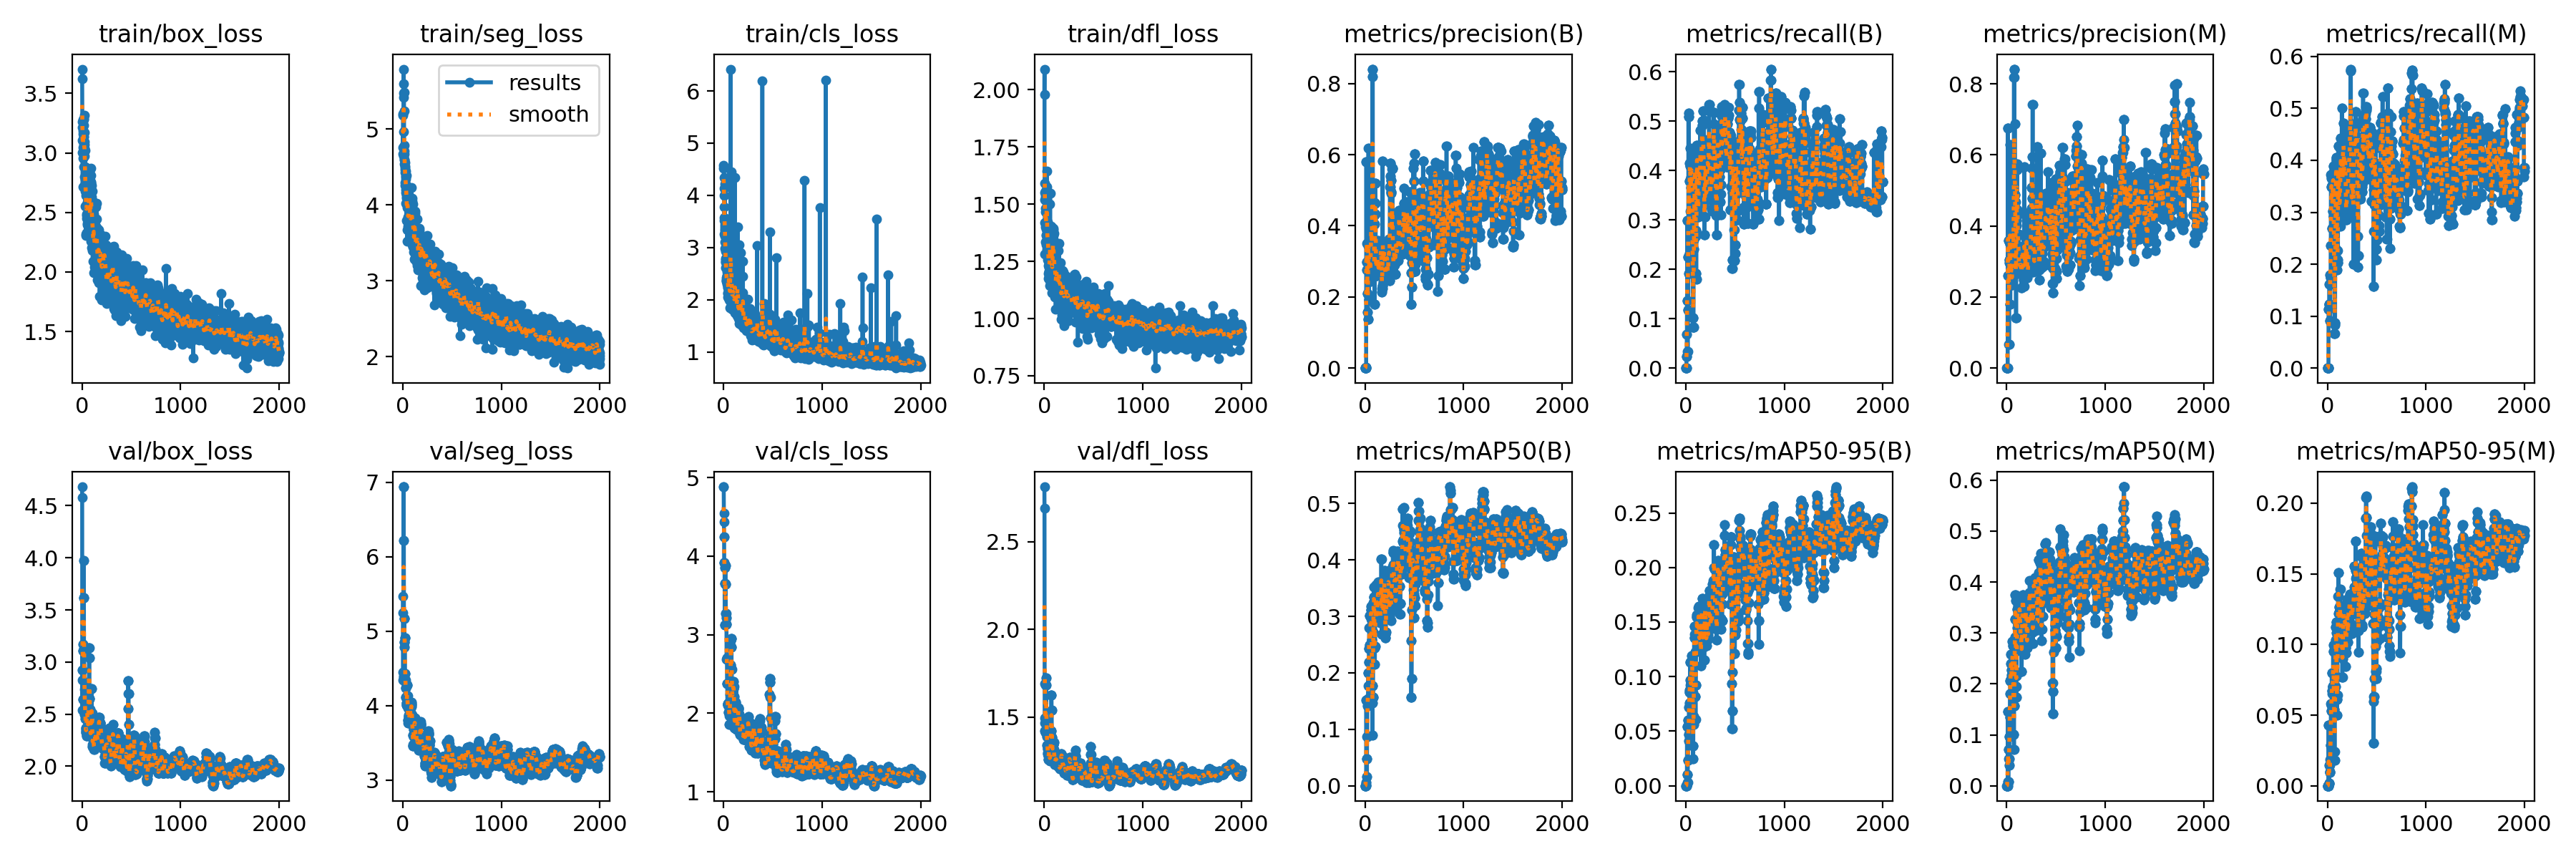

In [10]:
Image("/content/data_yolo/results/2000_epochs-/results.png")

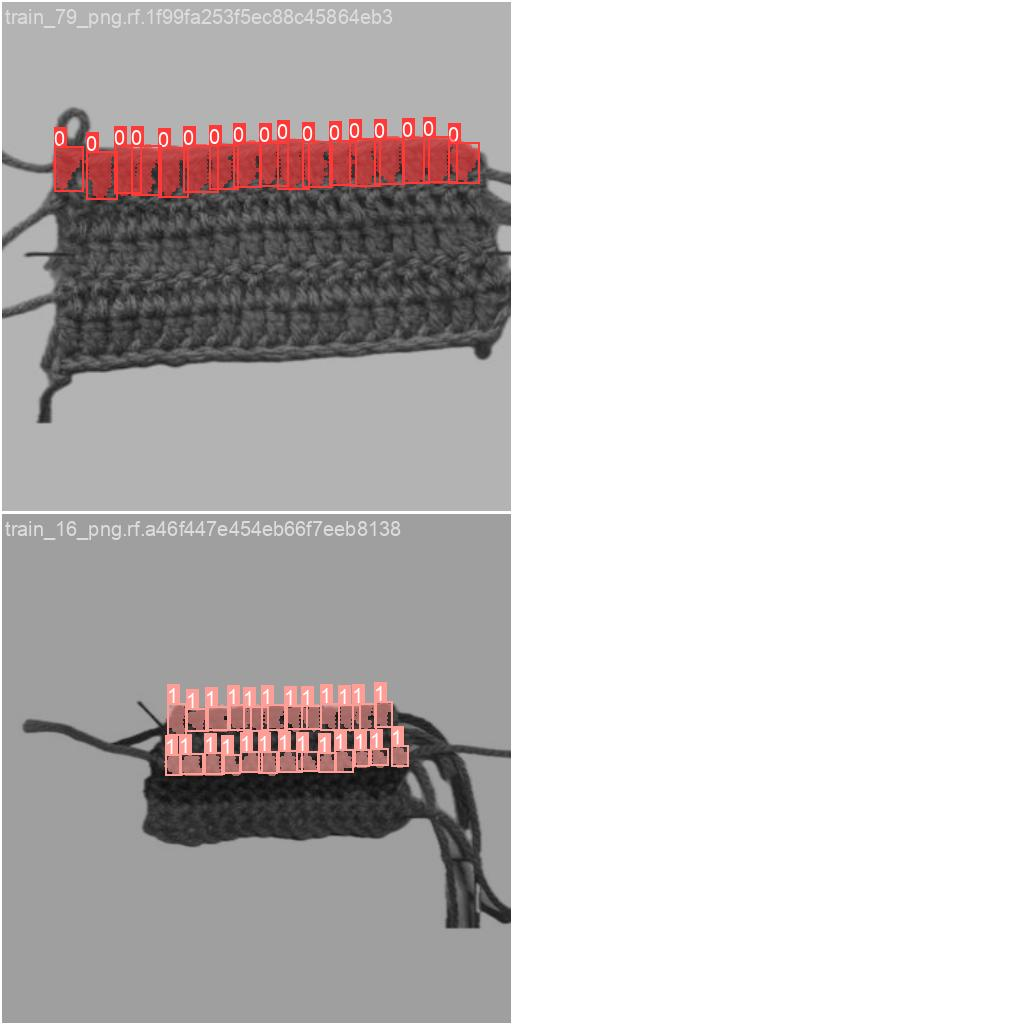

In [11]:
Image(filename='/content/data_yolo/results/2000_epochs-/train_batch23882.jpg', width=900)

**Run inference**

Selecting latest model

In [12]:
my_new_model = YOLO('/content/data_yolo/results/2000_epochs-/weights/last.pt')

Load an image and perform inference (segmentation).

In [24]:
import matplotlib.pyplot as plt
import cv2
new_image = '/content/data_yolo/test/test_1.png'
image = cv2.imread(new_image)

# Convert from BGR to RGB for displaying with matplotlib
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# # Display the image
# plt.imshow(image_rgb)
new_results = my_new_model.predict(new_image, conf=0.5)  #Adjust conf threshold



image 1/1 /content/data_yolo/test/test_1.png: 512x512 34 trs, 36.9ms
Speed: 1.5ms preprocess, 36.9ms inference, 26.1ms postprocess per image at shape (1, 3, 512, 512)


The results are stored in a variable 'new_results'. Since we only have one image for segmentation, we will only have one set of results.

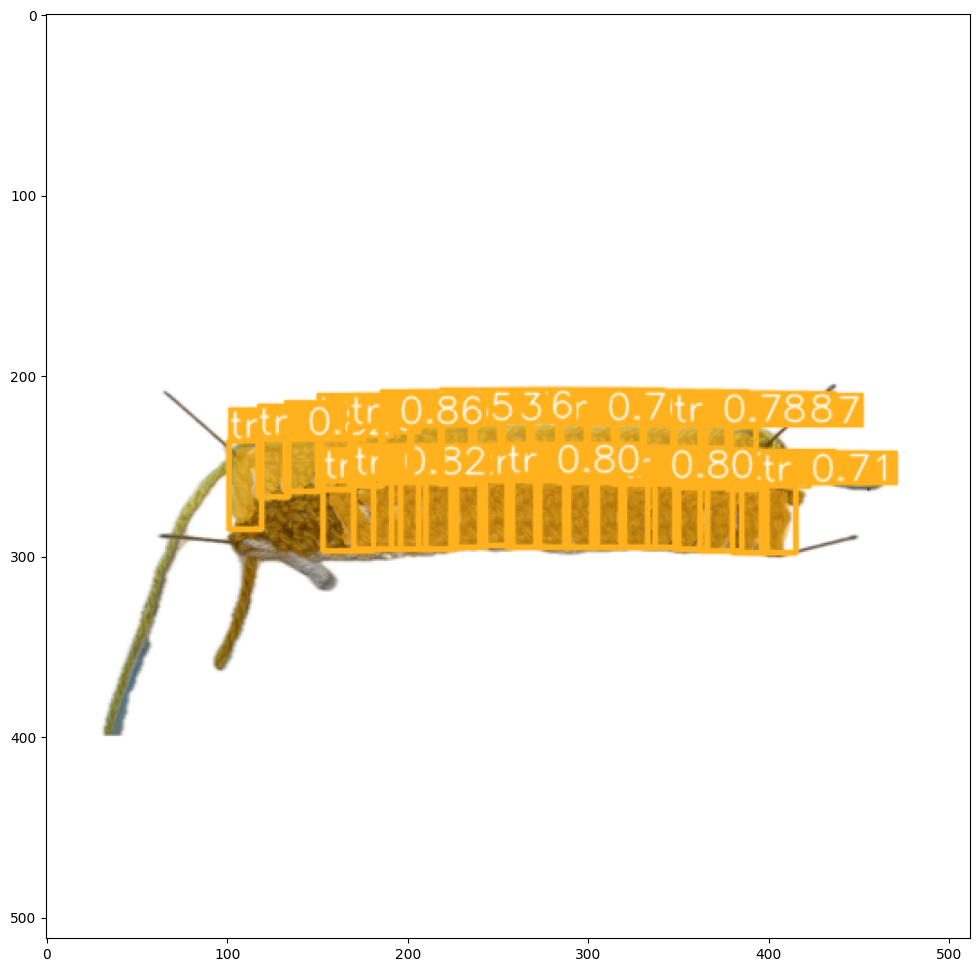

In [25]:
new_result_array = new_results[0].plot()
plt.figure(figsize=(12, 12))
image_rgb = cv2.cvtColor(new_result_array, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)

# plt.imshow(new_result_array)